In [1]:
#@title imports 
import os
import pickle
from typing import Set
# from jedi import settings
import matplotlib 
import numpy as np 
import matplotlib.pyplot as plt
from numpy.lib.function_base import append 
import scipy.io as spio
from scipy.io import loadmat, savemat
import importlib.util
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
from scipy.sparse import data 
# from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap
# from plotnine.data import mtcars
import pandas as pd 
import matplotlib as mpl 
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import SparsePCA
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
from sknetwork.clustering import Louvain,get_modularity
from sknetwork.data import karate_club


In [3]:
import sys 
sys.path.append('C:/Users/Nishant Joshi/Downloads/Old_code/repo/single_cell_analysis/scripts')

from UMAP import *
# from heatmap import heatmap, corrplot

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\distances.py:1086: NumbaDeprecationWarni

In [4]:
# features_ext = ['Vm_avg', 'dvdt_p', 'dvdt_n', 'avg_V', 'resistance', 'thr',
#                 'adaptation','isi','peak','peak_adaptation','ap_width', 'hyp_value',
#                 'fist_spike','up_down_ratio', 'isi_adaptation', 'thr_adp_ind', 'psth',
#                 'int_fr','fr', 'sub_thr','mi','spk_fr_adp','imp','cond','exp_name']

features_ext = ['AP_avg', 'dvdt_p','dvdt_n','avg_V','resistance','thr','adaptation','isi','peak',
                'peak_adaptation','ap_width', 'hyp_value','fist_spike','up_down_ratio','isi_adaptation',
                'thr_adp_ind','psth','int_fr','fr', 'sub_thr','mi','spk_fr_adp','imp','exp_name','cond' ]               
data_all_conds = pickle.load(open('G:/My Drive/Cluster Feature files/all_acsf_ephys_with_MI_new_res.p','rb'))
exc = data_all_conds['exc']
inh = data_all_conds['inh']
exc_df = pd.DataFrame(exc,columns = features_ext)
exc_df = exc_df.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
exc_df = pd.concat((exc_df.groupby('cond').get_group('aCSF'),
                    exc_df.groupby('cond').get_group('ACSF')))

inh_df_all = pd.DataFrame(inh,columns = features_ext)
inh_df = inh_df_all.replace([np.inf, -np.inf], np.nan)
inh_df = inh_df.dropna(axis=0)
inh_df = pd.concat((inh_df.groupby('cond').get_group('aCSF'),
                    inh_df.groupby('cond').get_group('ACSF')))


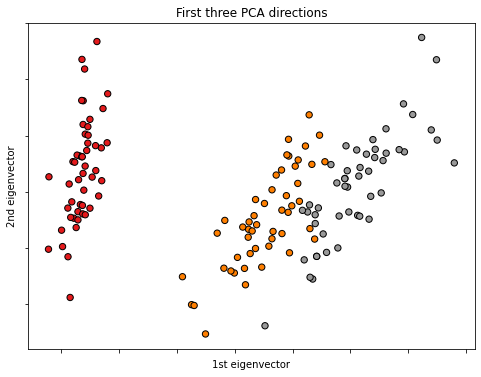

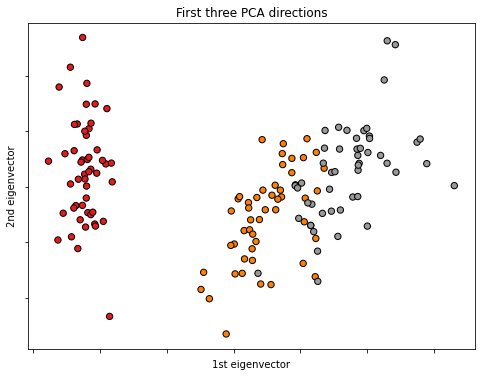

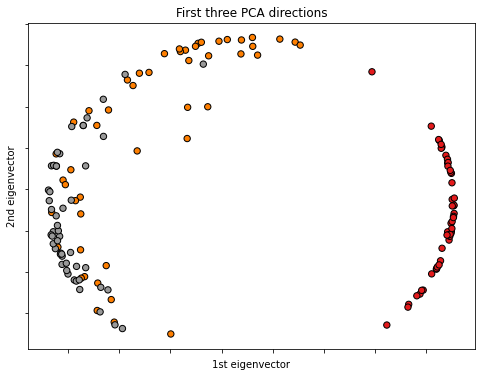

In [53]:

import matplotlib.pyplot as plt

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
# iris = datasets.load_iris()
# X = iris.data[:, :2]  # we only take the first two features.
# y = iris.target

# x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
# y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

# plt.figure(2, figsize=(8, 6))
# plt.clf()

# # Plot the training points
# plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
# plt.xlabel("Sepal length")
# plt.ylabel("Sepal width")

# plt.xlim(x_min, x_max)
# plt.ylim(y_min, y_max)
# plt.xticks(())
# plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
data = iris.data
data_std = scaler.fit_transform(data)
data_norm = normalize(data_std)

def plot_pca(data,dim):
    if dim ==3:
        fig = plt.figure(1, figsize=(8, 6))
        ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)
        X_reduced = PCA(n_components=dim).fit_transform(data)
        ax.scatter(
            X_reduced[:, 0],
            X_reduced[:, 1],
            X_reduced[:, 2],
            c=y,
            cmap=plt.cm.Set1,
            edgecolor="k",
            s=40,
        )
        ax.set_title("First three PCA directions")
        ax.set_xlabel("1st eigenvector")
        ax.xaxis.set_ticklabels([])
        ax.set_ylabel("2nd eigenvector")
        ax.yaxis.set_ticklabels([])
        ax.set_zlabel("3rd eigenvector")
        ax.zaxis.set_ticklabels([])

    else:
        fig = plt.figure(1, figsize=(8, 6))
        ax = fig.add_subplot(111,)
        X_reduced = PCA(n_components=dim).fit_transform(data)
        ax.scatter(
            X_reduced[:, 0],
            X_reduced[:, 1],
            c=y,
            cmap=plt.cm.Set1,
            edgecolor="k",
            s=40,
        )
        ax.set_title("First three PCA directions")
        ax.set_xlabel("1st eigenvector")
        ax.xaxis.set_ticklabels([])
        ax.set_ylabel("2nd eigenvector")
        ax.yaxis.set_ticklabels([])



    plt.show()

plot_pca(data,2)    
plt.show()
plot_pca(data_std,2) 
plt.show()
plot_pca(data_norm,2) 
plt.show()   


In [16]:
pca = PCA(n_components=len(features_ext[:-2]))
scaler = StandardScaler()
data_all = exc_df[features_ext[:-2]]
data_all = scaler.fit_transform(data_all)
# data_all = normalize(data_all)
pca.fit(data_all)
eigenvalues = pca.explained_variance_
sum(eigenvalues)**2/sum(eigenvalues**2)


6.847782515493552

In [26]:
np.sum(np.array([2,3,5]))**2/np.sum(np.array([2,3,5])**2)

2.6315789473684212

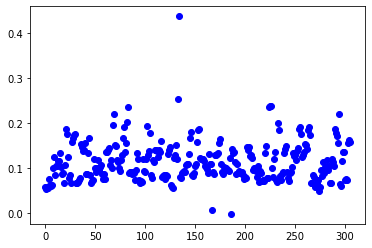

In [184]:
plt.scatter(np.arange(len(inh_df_all['resistance'])),inh_df_all['resistance'])

In [196]:
inh_df.to_csv('G:/My Drive/Cluster Feature files/feature_set_inh.csv')

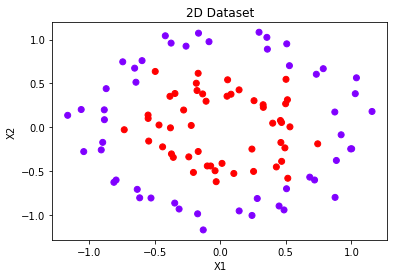

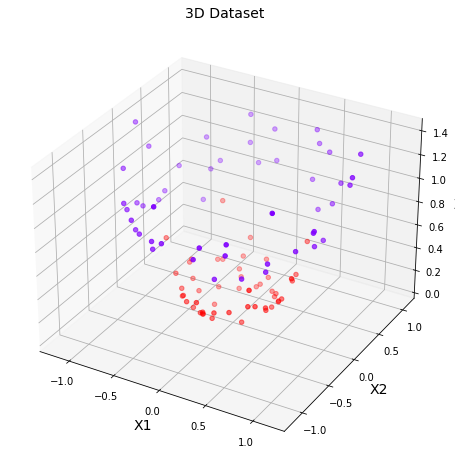

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_circles

# Generate a synthetic dataset with two interleaving circles
X, y = make_circles(n_samples=100, noise=0.1, factor=0.5, random_state=42)

# Plot the dataset in 2D
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow')
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("2D Dataset")
plt.show()

# Add a new feature (Z coordinate) to the dataset
Z = np.square(X[:, 0]) + np.square(X[:, 1])

# Plot the dataset in 3D
fig = plt.figure(figsize=[10,8])
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Z, c=y, cmap='rainbow')
ax.set_xlabel("X1",fontsize=14)
ax.set_ylabel("X2",fontsize=14)
ax.set_zlabel("Z",fontsize=14)
ax.set_title("3D Dataset",fontsize=14)
plt.show()


Important Function

In [6]:
import hdbscan
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

def plot_UMAP_clusters(data_inh,data_exc,neighbours,distance,condition_inh,condition_exc,k_exc,k_inh, random_state,c_list =['green','purple','cyan'],save=False):
    """plots UMAP for excitatory and inhibitory cells 

    Args:
        data_inh (ndarray): cell X feature matrix for inhibitory cells
        data_exc (ndarray): cell X feature matrix for excitatory cells
        c_exc (array): _description_
        c_inh (array): _description_
        neighbours (int): number of neares neighbours
        distance (float): minimum distance between points
    """
    data_exc_umap_scaler = StandardScaler()
    data_exc_umap = data_exc_umap_scaler.fit_transform(data_exc)
    data_exc_umap = normalize(data_exc_umap)
    data_inh_umap = data_exc_umap_scaler.fit_transform(data_inh)
    data_inh_umap = normalize(data_inh_umap)

    neighbours = neighbours
    dist = distance
    clusterable_embedding2d_exc = umap.UMAP(n_neighbors=neighbours,min_dist=dist,
        n_components=2,random_state=random_state,).fit_transform(data_exc_umap)
    #initialize kmeans parameters
    kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "random_state": 1,
    }

    #create list to hold SSE values for each k
    sse = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
        kmeans.fit(clusterable_embedding2d_exc)
        sse.append(kmeans.inertia_)

    #visualize results
    plt.plot(range(1, 11), sse)
    plt.xticks(range(1, 11))
    plt.xlabel("Number of Clusters exc")
    plt.ylabel("SSE")
    plt.show()

    fig = plt.figure(figsize=[8,8])
    ax12d = fig.add_subplot(1,1,1)

    kmeans_exc = KMeans(n_clusters=k_exc,random_state=random_state).fit(clusterable_embedding2d_exc)
    centroids_exc = kmeans_exc.cluster_centers_
    labels_exc = kmeans_exc.labels_.astype(float)

    df_2d_exc = {'UMAP1':clusterable_embedding2d_exc[:, 0],
             'UMAP2':clusterable_embedding2d_exc[:, 1],
             'condition':condition_exc,
             'class':labels_exc}

    ax12d.set_xticks([])
    ax12d.set_yticks([])
    sns.scatterplot(data=df_2d_exc,x='UMAP1',y='UMAP2',hue='class', palette=c_list,ax=ax12d)
    ax12d.set_title('UMAP clusters for excitatory neurons 2D')
    if save:
        plt.savefig('C:/Users/Nishant Joshi/Documents/DNM/exc_umap_cluster.png',dpi=200)
    else:
        plt.show()

    #--------------------INH
    clusterable_embedding3d_inh = umap.UMAP(n_neighbors=neighbours, min_dist=dist,
                                        n_components=3,random_state=random_state).fit_transform(data_inh_umap)

    clusterable_embedding2d_inh = umap.UMAP(n_neighbors=neighbours, min_dist=dist,
                                        n_components=2,random_state=random_state).fit_transform(data_inh_umap)

    #initialize kmeans parameters
    kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "random_state": 1,
    }

    #create list to hold SSE values for each k
    sse = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
        kmeans.fit(clusterable_embedding2d_inh)
        sse.append(kmeans.inertia_)

    #visualize results
    plt.plot(range(1, 11), sse)
    plt.xticks(range(1, 11))
    plt.xlabel("Number of Clusters inh")
    plt.ylabel("SSE")
    plt.show()

    fig = plt.figure(figsize=[8,8])
    # ax2 = fig.add_subplot(1,2,1,projection='3d')
    ax22d = fig.add_subplot(1,1,1)
    
    kmeans_inh = KMeans(n_clusters=k_inh,random_state=random_state).fit(clusterable_embedding2d_inh)
    centroids_inh = kmeans_inh.cluster_centers_
    labels_inh = kmeans_inh.labels_.astype(float)

    df_2d_inh = {'UMAP1':clusterable_embedding2d_inh[:, 0],
                'UMAP2':clusterable_embedding2d_inh[:, 1],
                'condition':condition_inh,
                'class':labels_inh}


    sns.scatterplot(data=df_2d_inh,x='UMAP1',y='UMAP2', hue='class',palette=c_list, ax=ax22d)
    ax22d.set_xticks([])
    ax22d.set_yticks([])
    ax22d.set_title('UMAP clusters for inhibitory neurons 2D')
    if save:
        plt.savefig('C:/Users/Nishant Joshi/Documents/DNM/inh_umap_cluster.png',dpi=200)
    else:
        plt.show()

    return labels_exc, labels_inh

def plot_UMAP(data_inh,data_exc,neighbours,distance,condition_inh,condition_exc,figsize=None,random_state=0,save=False):
    """plots UMAP for excitatory and inhibitory cells 

    Args:
        data_inh (ndarray): cell X feature matrix for inhibitory cells
        data_exc (ndarray): cell X feature matrix for excitatory cells
        c_exc (array): _description_
        c_inh (array): _description_
        neighbours (int): number of neares neighbours
        distance (float): minimum distance between points
    """
    data_exc_umap_scaler = StandardScaler()
    data_exc_umap = data_exc_umap_scaler.fit_transform(data_exc)
    data_exc_umap = normalize(data_exc_umap)
    data_inh_umap = data_exc_umap_scaler.fit_transform(data_inh)
    data_inh_umap = normalize(data_inh_umap)
    fig = plt.figure(figsize=figsize)
    ax12d = fig.add_subplot(1,2,1)
    neighbours = neighbours
    dist = distance
    clusterable_embedding2d = umap.UMAP(n_neighbors=neighbours,min_dist=dist,
        n_components=2,random_state=random_state,).fit_transform(data_exc_umap)
    df_2d = {'UMAP1':clusterable_embedding2d[:, 0],
             'UMAP2':clusterable_embedding2d[:, 1],
             'condition':condition_exc}
    sns.scatterplot(data=df_2d,x='UMAP1',y='UMAP2',hue='condition',  cmap='gist_rainbow',ax=ax12d)
    ax12d.set_xticks([])
    ax12d.set_yticks([])
    ax12d.set_title('UMAP excitatory')
    ax22d = fig.add_subplot(1,2,2)
    clusterable_embedding2d = umap.UMAP(n_neighbors=neighbours, min_dist=dist,
                                        n_components=2,random_state=random_state).fit_transform(data_inh_umap)
    df_2d = {'UMAP1':clusterable_embedding2d[:, 0],
             'UMAP2':clusterable_embedding2d[:, 1],
             'condition':condition_inh}
    sns.scatterplot(data=df_2d,x='UMAP1',y='UMAP2',hue='condition',  cmap='gist_rainbow',ax=ax22d)
    ax22d.set_title('UMAP inhibitory')
    ax22d.set_xticks([])
    ax22d.set_yticks([])
    if save:
        plt.savefig('C:/Users/Nishant Joshi/Documents/DNM/umap_20.png',dpi=200)
    else:
        plt.show()

def plot_UMAP_combined(data_exc,data_inh,neighbours,distance,random_state,figsize):

    data_scaler = StandardScaler()
    data_all = np.concatenate((data_exc,data_inh))
    data_all = data_scaler.fit_transform(data_all)
    data_all = normalize(data_all)
    fig = plt.figure(figsize=figsize,dpi=200)
    # ax1 = fig.add_subplot(1,2,1,projection='3d')
    ax12d = fig.add_subplot(1,1,1)
    neighbours = neighbours
    dist = distance
    labels = np.concatenate((np.repeat('exc',len(data_exc)),np.repeat('inh',len(data_inh))))
    clusterable_embedding2d = umap.UMAP(n_neighbors=neighbours,min_dist=dist,
        n_components=2,random_state=random_state,).fit_transform(data_all)
    df_2d = pd.DataFrame({'UMAP1':clusterable_embedding2d[:, 0],
             'UMAP2':clusterable_embedding2d[:, 1],
             'type':labels})
    sns.scatterplot(data=df_2d,x='UMAP1',y='UMAP2', hue='type', cmap='gist_rainbow',ax=ax12d,alpha=.5,markers=['x','.'])
    ax12d.set_title('UMAP excitatory and Inhibitory')
    
    plt.show()  

def plot_UMAP_all_conds(data,labels,neighbours,distance,random_state,figsize):

    data_scaler = StandardScaler()
    data = data_scaler.fit_transform(data)
    data = normalize(data)
    fig = plt.figure(figsize=figsize)
    ax12d = fig.add_subplot(1,1,1)
    neighbours = neighbours
    dist = distance
    labels = labels
    clusterable_embedding2d = umap.UMAP(n_neighbors=neighbours,min_dist=dist,
        n_components=2,random_state=random_state,).fit_transform(data)
    df_2d = pd.DataFrame({'UMAP1':clusterable_embedding2d[:, 0],
             'UMAP2':clusterable_embedding2d[:, 1],
             'type':labels})
    sns.scatterplot(data=df_2d,x='UMAP1',y='UMAP2', hue='type', cmap='gist_rainbow',ax=ax12d,alpha=.5,markers=['x','.'])
    ax12d.set_title('UMAP all conditions')
  
    plt.show()      

def plot_UMAP_clusters_hbd(data_inh,data_exc,neighbours,distance,min_samples,min_cluster_size,random_state):
    """plots UMAP for excitatory and inhibitory cells 

    Args:
        data_inh (ndarray): cell X feature matrix for inhibitory cells
        data_exc (ndarray): cell X feature matrix for excitatory cells
        c_exc (array): _description_
        c_inh (array): _description_
        neighbours (int): number of neares neighbours
        distance (float): minimum distance between points
    """
    data_exc_umap_scaler = StandardScaler()
    data_exc_umap = data_exc_umap_scaler.fit_transform(data_exc)
    data_exc_umap = normalize(data_exc_umap)
    data_inh_umap = data_exc_umap_scaler.fit_transform(data_inh)
    data_inh_umap = normalize(data_inh_umap)

    fig = plt.figure(figsize=[10,4])
    ax12d = fig.add_subplot(1,2,1)
    neighbours = neighbours
    dist = distance

    clusterable_embedding2d_exc = umap.UMAP(n_neighbors=neighbours,min_dist=dist,
        n_components=2,random_state=random_state,).fit_transform(data_exc_umap)



    labels_exc = hdbscan.HDBSCAN(
        min_samples=min_samples,
        min_cluster_size=min_cluster_size,
    ).fit_predict(data_exc_umap)


    df_2d_exc = {'UMAP1':clusterable_embedding2d_exc[:, 0],
             'UMAP2':clusterable_embedding2d_exc[:, 1],
             'labels':labels_exc}


    sns.scatterplot(data=df_2d_exc,x='UMAP1',y='UMAP2',hue='labels',  cmap='gist_rainbow',ax=ax12d)
    ax12d.set_title('UMAP clusters for excitatory neurons 2D')
    plt.show()

    fig = plt.figure(figsize=[10,4])
    ax22d = fig.add_subplot(1,2,2)
    
    clusterable_embedding2d_inh = umap.UMAP(n_neighbors=neighbours, min_dist=dist,
                                        n_components=2,random_state=random_state).fit_transform(data_inh_umap)

    labels_inh = hdbscan.HDBSCAN(
        min_samples=min_samples,
        min_cluster_size=min_cluster_size,
    ).fit_predict(data_inh_umap)

    df_2d_inh = {'UMAP1':clusterable_embedding2d_inh[:, 0],
                'UMAP2':clusterable_embedding2d_inh[:, 1],
                'labels':labels_inh}

    sns.scatterplot(data=df_2d_inh,x='UMAP1',y='UMAP2',hue='labels',  cmap='gist_rainbow',ax=ax22d)
    ax22d.set_title('UMAP clusters for inhibitory neurons 2D')

    plt.show()
    return labels_exc, labels_inh


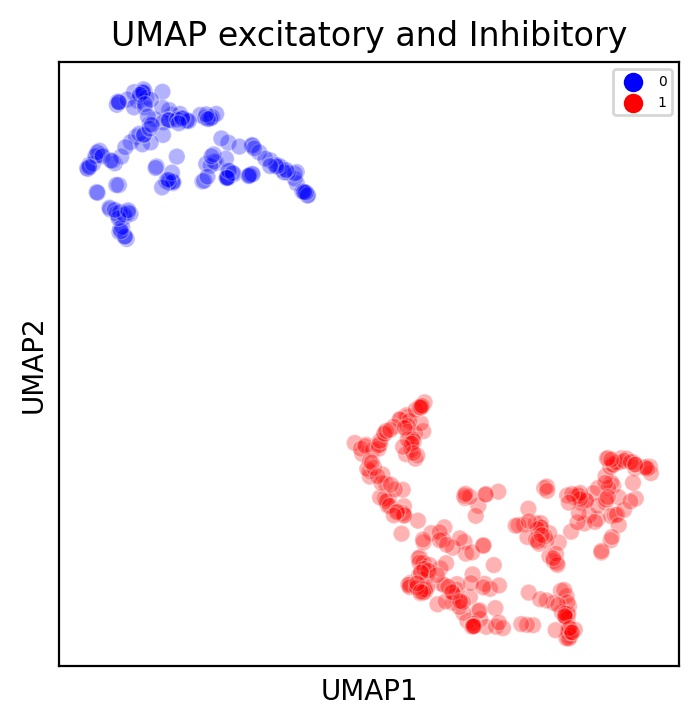

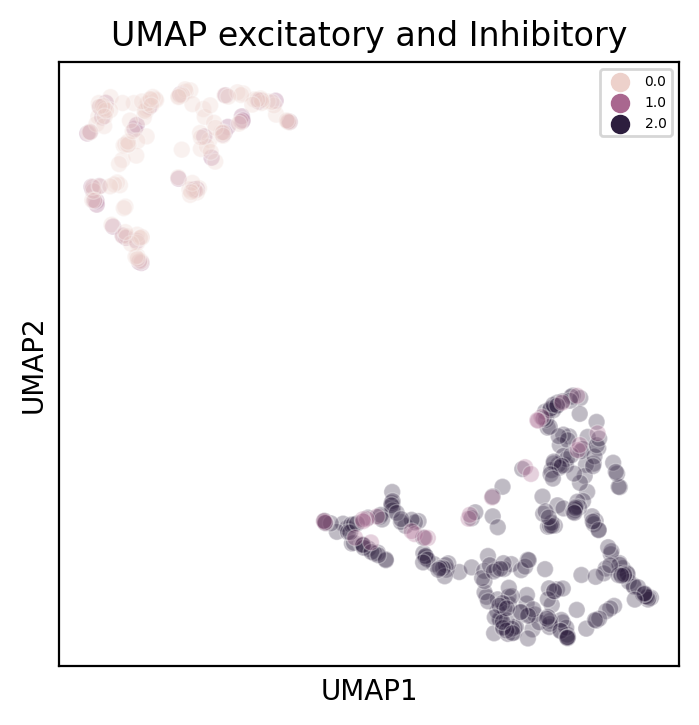

In [7]:
def plot_UMAP_combined_single(data_exc,data_inh,neighbours,distance,random_state,figsize,labels, exclude):

    data_scaler = StandardScaler()
    data_all = np.concatenate((data_exc,data_inh))
    data_all = data_scaler.fit_transform(data_all)
    data_all = normalize(data_all)
    fig = plt.figure(figsize=figsize,dpi=200)
    # ax1 = fig.add_subplot(1,2,1,projection='3d')
    ax12d = fig.add_subplot(1,1,1)
    neighbours = neighbours
    dist = distance
    # labels = np.concatenate((np.repeat('exc',len(data_exc)),np.repeat('inh',len(data_inh))))

    clusterable_embedding2d = umap.UMAP(n_neighbors=neighbours,min_dist=dist,
        n_components=2,random_state=random_state,).fit_transform(data_all)
    kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "random_state": 1,
    }

    sse = []
    kmeans = KMeans(n_clusters=2, **kmeans_kwargs)
    kmeans.fit(clusterable_embedding2d)
    if exclude:
        labels = kmeans.labels_ #+ np.concatenate((np.ones(len(data_exc)),np.zeros(len(data_inh))))
    else:
        labels = kmeans.labels_ + np.concatenate((np.ones(len(data_exc)),np.zeros(len(data_inh))))

    if len(labels)>1:
        labels = labels
    df_2d = pd.DataFrame({'UMAP1':clusterable_embedding2d[:, 0],
             'UMAP2':clusterable_embedding2d[:, 1],
             'type':labels})
    # sns.diverging_palette(220, 20, as_cmap=True)
    # sns.set_palette("Spectral")
    sns.set_palette(['blue','red'])
    # sns.set_palette(['orange'])
    sns.scatterplot(data=df_2d,x='UMAP1',y='UMAP2', hue='type' , ax=ax12d,sizes=25,alpha=0.3,)
    # ax12d.scatter(data=df_2d,x='UMAP1',y='UMAP2', hue='type',  cmap="spectral",alpha=0.5)
    ax12d.set_title('UMAP excitatory and Inhibitory')
    ax12d.legend(fontsize=5)
    ax12d.set_xticks([])
    ax12d.set_yticks([])
    # plt.savefig('C:/Users/Nishant Joshi/Documents/DNM/all_umap_cluster_without_labels.png',dpi=200)
    plt.show()  
    return labels
df_exc = exc_df#df_all_conds_exc 
df_inh = inh_df#df_all_conds_inh 
# for rstate in np.arange(10):
# for i in range(20):
labels_seperated = plot_UMAP_combined_single(df_exc[['AP_avg','ap_width','thr','isi','sub_thr','imp']],
                                             df_inh[['AP_avg','ap_width','thr','isi','sub_thr','imp']],
                    25,0.0,
                    42,
                    [4,4],
                    np.concatenate((np.repeat('exc',len(df_exc)+len(df_inh)),np.repeat('inh',len(df_exc)+len(df_inh)))),
                    # np.repeat('orange',len(df_exc))+np.repeat('orange',len(df_exc)),
                    True)
labels_wrong_classification = plot_UMAP_combined_single(df_exc[['AP_avg','ap_width','thr','isi','sub_thr','imp']],
                                                            df_inh[['AP_avg','ap_width','thr','isi','sub_thr','imp']],
                                                        20,0.0,
                                                        2,
                                                        [4,4],
                                                        np.concatenate((np.repeat('exc',len(df_exc)),np.repeat('inh',len(df_inh)))),
                                                        False)


In [161]:
combined_exc_inh = pd.concat([df_exc,df_inh])
combined_exc_inh['ei_labels_old'] = np.concatenate((np.repeat(1,len(df_exc)),np.repeat(0,len(df_inh))))
combined_exc_inh['ei_labels_new'] = labels_seperated
combined_exc_inh['ei_labels_misclassify'] = labels_wrong_classification

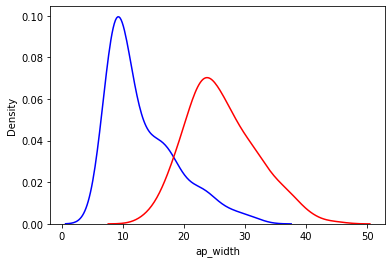

<Axes: xlabel='ap_width', ylabel='Density'>

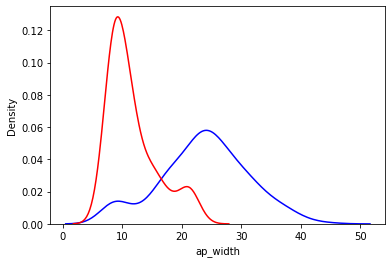

In [187]:
sns.kdeplot(data=combined_exc_inh[combined_exc_inh.ei_labels_new==0], x="ap_width")
sns.kdeplot(data=combined_exc_inh[combined_exc_inh.ei_labels_new==1], x="ap_width")
plt.show()
sns.kdeplot(data=df_exc, x="ap_width")
sns.kdeplot(data=df_inh, x="ap_width")

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.


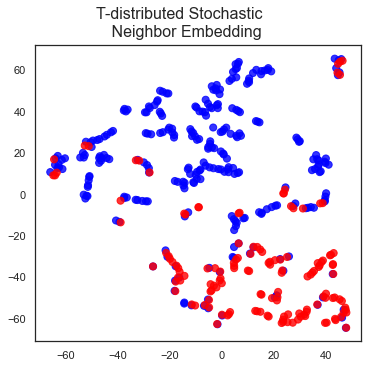

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.


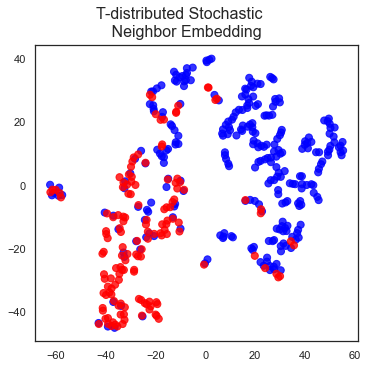

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.


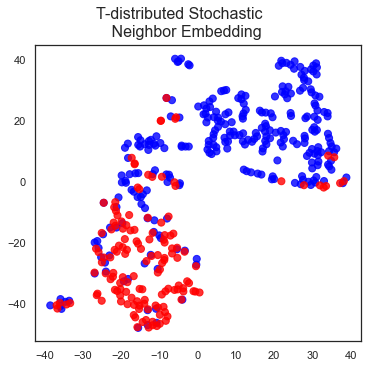

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.


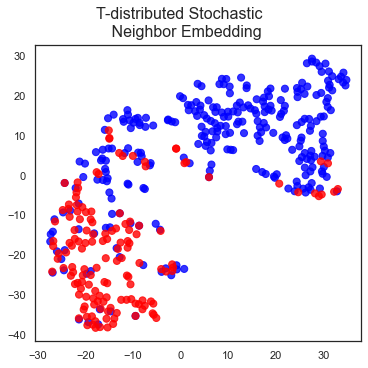

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.


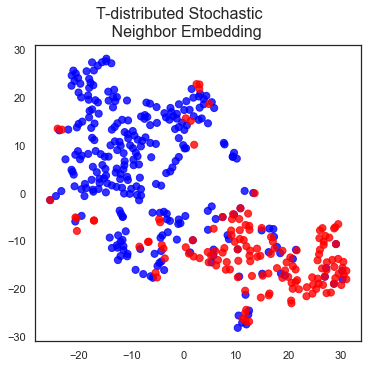

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.


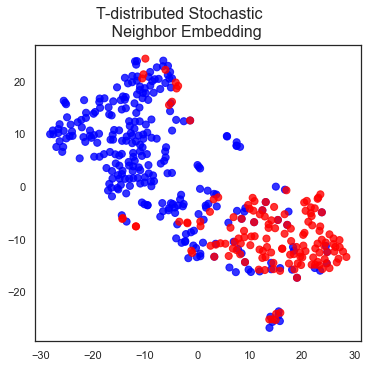

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.


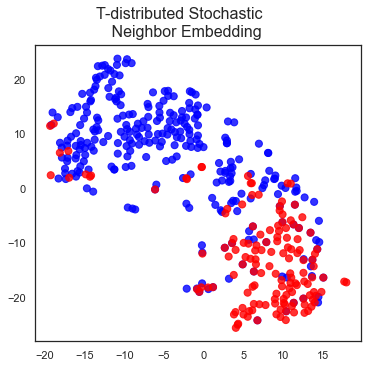

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.


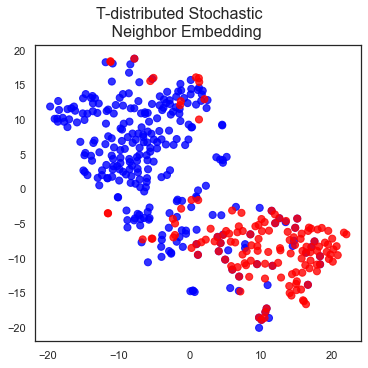

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.


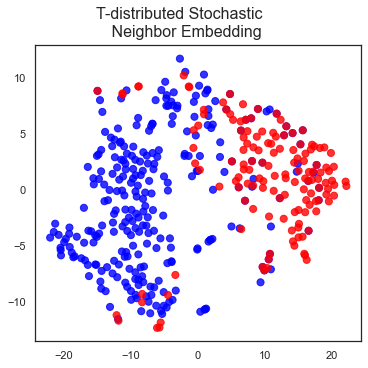

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.


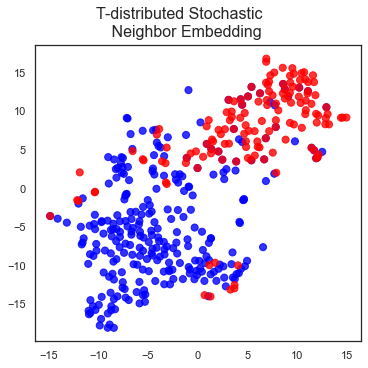

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.


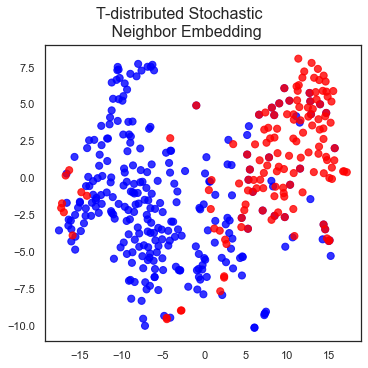

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.


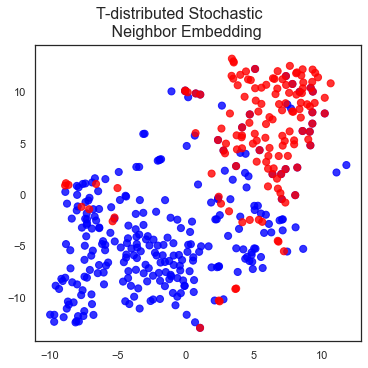

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.


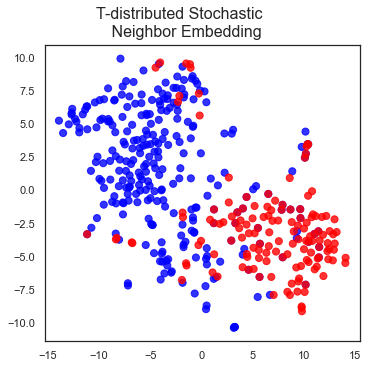

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.


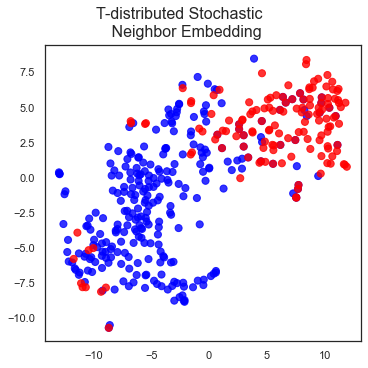

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.


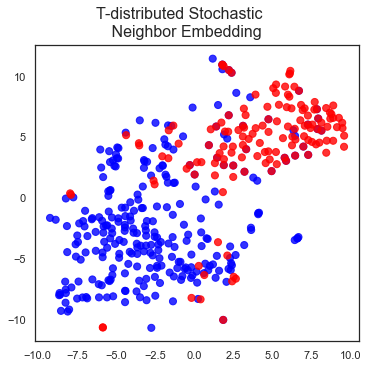

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.


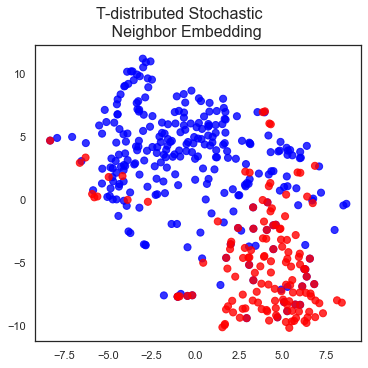

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.


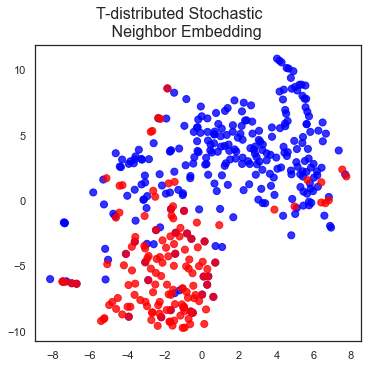

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.


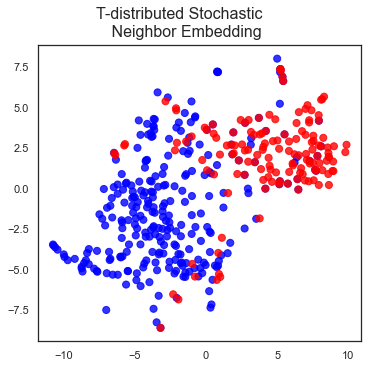

In [282]:
def plot_2d(points, points_color, title):
    fig, ax = plt.subplots(figsize=(5, 5), facecolor="white", constrained_layout=True)
    fig.suptitle(title, size=16)
    add_2d_scatter(ax, points, points_color)
    plt.show()
def add_2d_scatter(ax, points, points_color, title=None):
    x, y = points.T
    ax.scatter(x, y, c=points_color, s=50, alpha=0.8)
    ax.set_title(title)
    # ax.xaxis.set_major_formatter(ticker.NullFormatter())
    # ax.yaxis.set_major_formatter(ticker.NullFormatter())
data_scaler_tsne = StandardScaler()
df_all_ei = pd.concat([df_exc,df_inh])
data_all_tsne= data_scaler_tsne.fit_transform(df_all_ei[['Vm_avg', 'resistance', 'thr','isi', 'sub_thr', 'imp']])
data_all_tsne = normalize(data_all_tsne)
for perpex in np.arange(5,95,5):
    t_sne = manifold.TSNE(
        n_components=n_components,
        perplexity=perpex,
        init="random",
        n_iter=1000,
        random_state=10)

    S_t_sne = t_sne.fit_transform(data_all_tsne)
    colour = np.concatenate((np.repeat('blue',len(df_exc)),np.repeat('red',len(df_inh))))
    plot_2d(S_t_sne, colour, "T-distributed Stochastic  \n Neighbor Embedding")
    plt.show()


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.


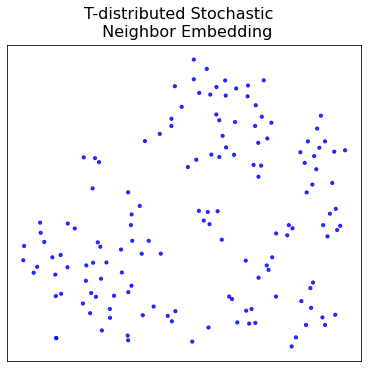

In [163]:
def plot_2d(points, points_color, title):
    fig, ax = plt.subplots(figsize=(5, 5), facecolor="white", constrained_layout=True)
    fig.suptitle(title, size=16)
    add_2d_scatter(ax, points, points_color)
    # plt.show()
def add_2d_scatter(ax, points, points_color, title=None):
    x, y = points.T
    ax.scatter(x, y, c=points_color, s=10, alpha=0.8)
    ax.set_title(title)
    ax.set_xticks([])
    ax.set_yticks([])
    # ax.xaxis.set_major_formatter(ticker.NullFormatter())
    # ax.yaxis.set_major_formatter(ticker.NullFormatter())
data_scaler_tsne_inh = StandardScaler()

data_inh_tsne_inh= data_scaler_tsne_inh.fit_transform(df_inh[df_inh.columns[:-3]])
data_inh_tsne_inh = normalize(data_inh_tsne_inh)
# for perpex in np.arange(5,95,5):
t_sne = manifold.TSNE(
    n_components=2,
    perplexity=20,
    init="random",
    n_iter=1000,
    random_state=10,
)

S_t_sne = t_sne.fit_transform(data_inh_tsne_inh)
colour = np.repeat('blue',len(data_inh_tsne_inh))
plot_2d(S_t_sne, colour, "T-distributed Stochastic  \n Neighbor Embedding")
# plt.savefig('C:/Users/Nishant Joshi/Documents/DNM/tsne_inh.png',dpi=200)
plt.show()


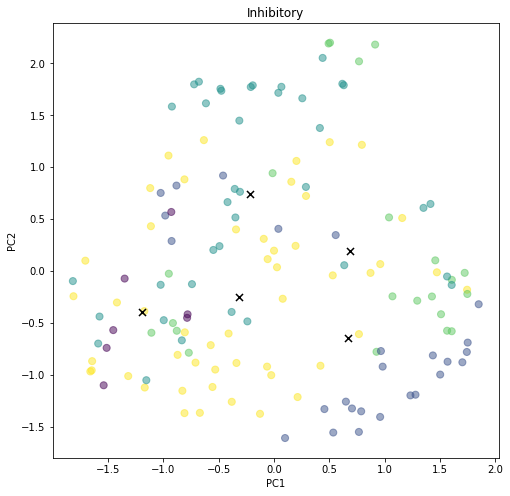

0.5699745627656255


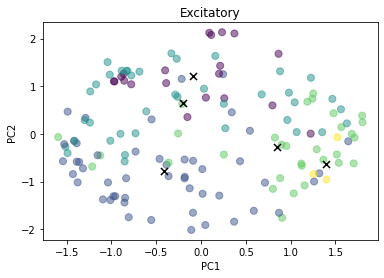

In [109]:

def plot_pca(data_inh,data_exc,plot_loadings=False,feature_sub=None ):
    """_summary_

    Args:
        data (list): _description_
    """
    features = ['Vm_avg','dvdt_p','dvdt_n','resistance','thr','adaptation',
    'isi','peak','peak_adaptation','ap_width','hyp_value','fist_spike','up_down_ratio',
    'isi_adaptation','thr_adp_ind','psth','int_fr','fr','sub_thr','spk_fr_adp','imp']
    if feature_sub !=None:
        features = np.array(features)[feature_sub]

    min_size = min(np.array(data_inh).shape[0],np.array(data_exc).shape[0])

    scalar_inh = StandardScaler()
    scalar_exc = StandardScaler()
    data_inh_pca = scalar_inh.fit_transform(remove_nans_and_infs(np.squeeze(data_inh)))
    data_inh_pca = normalize(data_inh_pca) 
    data_exc_pca = scalar_exc.fit_transform(remove_nans_and_infs(np.squeeze(data_exc)))
    data_exc_pca = normalize(data_exc_pca) 

    pca_x = PCA(whiten=True,random_state=40)


    # Project the data in 2D

    reduced_data_inh = pca_x.fit_transform(data_inh_pca[:min_size,:])
    exp_var_inh = pca_x.explained_variance_ratio_
    loadings = pca_x.components_.T * np.sqrt(pca_x.explained_variance_)

    n_components = 3

    kmeans = KMeans(n_clusters=5).fit(reduced_data_inh)
    centroids_inh = kmeans.cluster_centers_
    label = kmeans.labels_.astype(float)


    if plot_loadings:
        fig, ax = plt.subplots(1,3,figsize=[24,8])

        ax[0].scatter(reduced_data_inh[:,0], reduced_data_inh[:,1], c=label, s=50, alpha=0.5,marker = 'o')
        ax[0].scatter(centroids_inh[:, 0], centroids_inh[:, 1],c='black', s=50,marker = 'x')
        ax[0].set_xlabel('PC1')
        ax[0].set_ylabel('PC2')
        ax[0].set_title('Inhibitory')        
        for i, feature in enumerate(features):
            ax[1].plot([0,loadings[i, 0]],[0,loadings[i, 1]])
            ax[1].annotate(feature, xy = [loadings[i, 0], loadings[i, 1]])
        ax[2].scatter(np.arange(len(exp_var_inh)),exp_var_inh)
    else:
        fig, ax = plt.subplots(1,1,figsize=[8,8])

        ax.scatter(reduced_data_inh[:,0], reduced_data_inh[:,1], c=label, s=50, alpha=0.5,marker = 'o')
        ax.scatter(centroids_inh[:, 0], centroids_inh[:, 1],c='black', s=50,marker = 'x')
        ax.set_xlabel('PC1')
        ax.set_ylabel('PC2')
        ax.set_title('Inhibitory')        
    plt.savefig('C:/Users/Nishant Joshi/Documents/DNM/PCA_inh.png',dpi=200)

    plt.show()

   

    pca_x_exc = PCA(whiten=True,random_state=40)
    # Project the data in 2D
    reduced_data_exc = pca_x_exc.fit_transform(data_exc_pca[:min_size,:])
    exp_var_exc = pca_x_exc.explained_variance_ratio_
    print(sum(exp_var_exc[:3]))
    loadings = pca_x_exc.components_.T * np.sqrt(pca_x_exc.explained_variance_)
    n_components = 2

    kmeans = KMeans(n_clusters=5).fit(reduced_data_exc)
    centroids_exc = kmeans.cluster_centers_
    label = kmeans.labels_.astype(float)


    if plot_loadings:
        fig, ax = plt.subplots(1,3,figsize=[24,8])
        ax[0].Projection ='3d'                   
        ax[0].scatter(reduced_data_exc[:,0], reduced_data_exc[:,1], c=label, s=50, alpha=0.5,marker = 'o')
        ax[0].scatter(centroids_exc[:, 0], centroids_exc[:, 1],c='black', s=50,marker = 'x')
        ax[0].set_xlabel('PC1')
        ax[0].set_ylabel('PC2')
        ax[0].set_title('Excitatory')

        for i, feature in enumerate(features):
            ax[1].plot([0,loadings[i, 0]],[0,loadings[i, 1]])
            ax[1].annotate(feature, xy = [loadings[i, 0], loadings[i, 1]])
        ax[2].scatter(np.arange(len(exp_var_exc)),exp_var_exc)

    else:
        plt.Projection ='3d'                   
        plt.scatter(reduced_data_exc[:,0], reduced_data_exc[:,1], c=label, s=50, alpha=0.5,marker = 'o')
        plt.scatter(centroids_exc[:, 0], centroids_exc[:, 1],c='black', s=50,marker = 'x')
        plt.xlabel('PC1')
        plt.ylabel('PC2')
        plt.title('Excitatory')
        
    plt.show()
plot_pca(df_exc[df_exc.columns[:-3]].to_numpy(),df_inh[df_inh.columns[:-3]].to_numpy())


In [195]:
labels = plot_UMAP_combined_single(df_exc[df_exc.cluster_ei_labels==2.0][['Vm_avg', 'resistance', 'thr','fr', 'isi', 'sub_thr', 'imp']],
                       df_inh[df_inh.cluster_ei_labels==0.0][['Vm_avg', 'resistance', 'thr', 'fr','isi', 'sub_thr', 'imp']],
                    15,0.0,1,[3,3],np.concatenate((np.repeat('exc',len(df_exc[df_exc.cluster_ei_labels==2.0])),np.repeat('inh',len(df_inh[df_inh.cluster_ei_labels==0.0])))),True)

AttributeError: 'DataFrame' object has no attribute 'cluster_ei_labels'

In [ ]:
from random import sample

cluster_data_temp_inh.iloc[np.random.randint(0,len(df_inh),10),:]#np.random.randint(0,len(cluster_data_temp_inh),10),:

In [71]:
df_inh = df_inh.reset_index(drop=True)
df_exc = df_exc.reset_index(drop=True)
cluster_data_temp_inh=df_inh[df_inh.cluster_ei_lables==0.0][['Vm_avg', 'resistance', 'thr', 'isi', 'sub_thr','imp']].iloc[np.random.randint(0,len(df_inh),int(0.3*len(df_inh))),:]
cluster_data_temp_exc=df_exc[df_exc.cluster_ei_lables==2.0][['Vm_avg', 'resistance', 'thr', 'isi', 'sub_thr','imp']].iloc[np.random.randint(0,len(df_exc),int(0.3*len(df_exc))),:]
cluster_data_temp_exc
plot_UMAP(cluster_data_temp_inh,
          cluster_data_temp_exc,
            20,
            0.0,
            np.repeat(['acsf'],len(cluster_data_temp_inh)),np.repeat(['acsf'],len(cluster_data_temp_inh)),
            figsize=[12,6],
            random_state=42,
            save=True)

AttributeError: 'DataFrame' object has no attribute 'cluster_ei_lables'

5


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:608: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:651: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


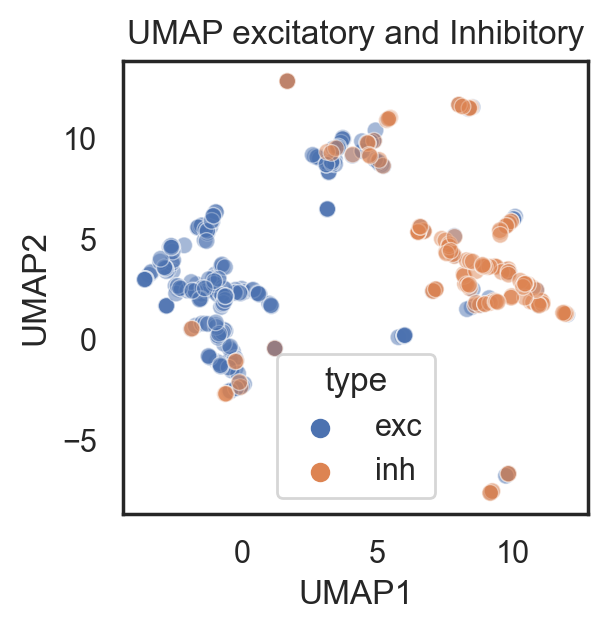

10


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:608: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:651: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


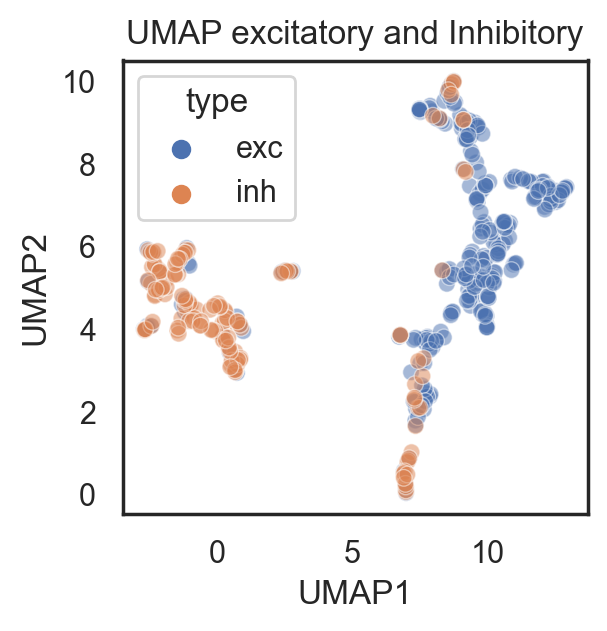

15


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:608: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:651: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


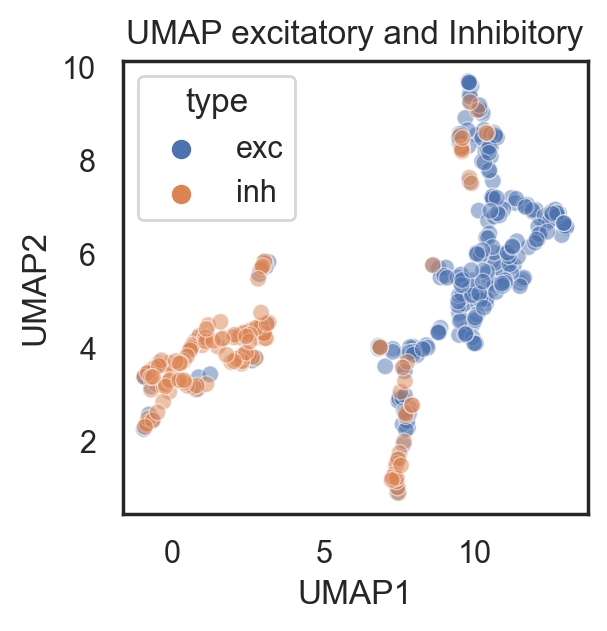

20


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:608: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:651: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


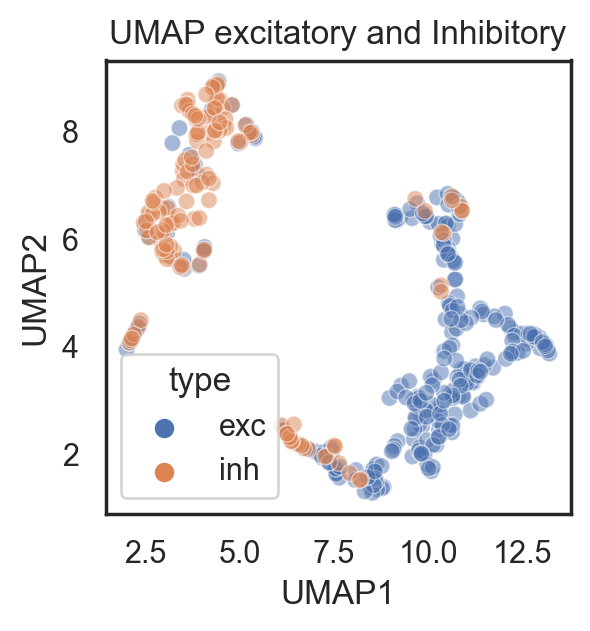

25


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:608: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:651: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


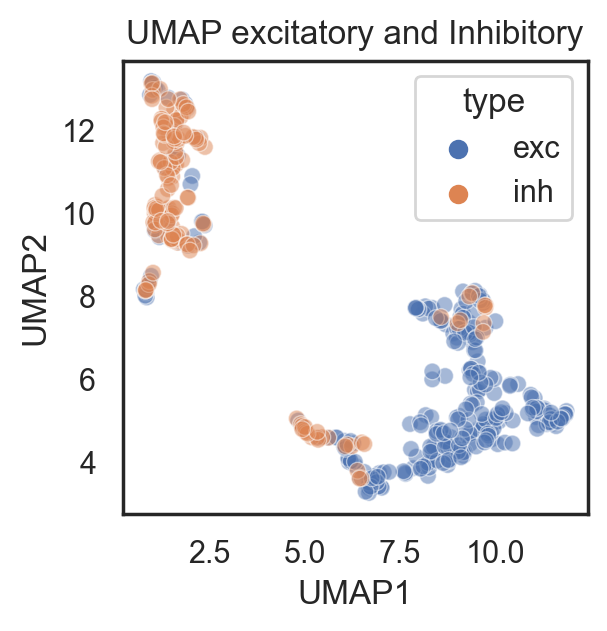

30


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:608: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:651: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


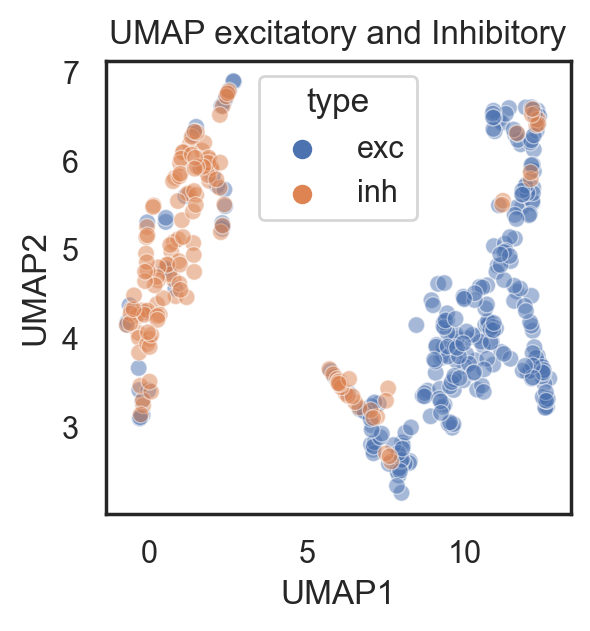

35


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:608: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:651: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


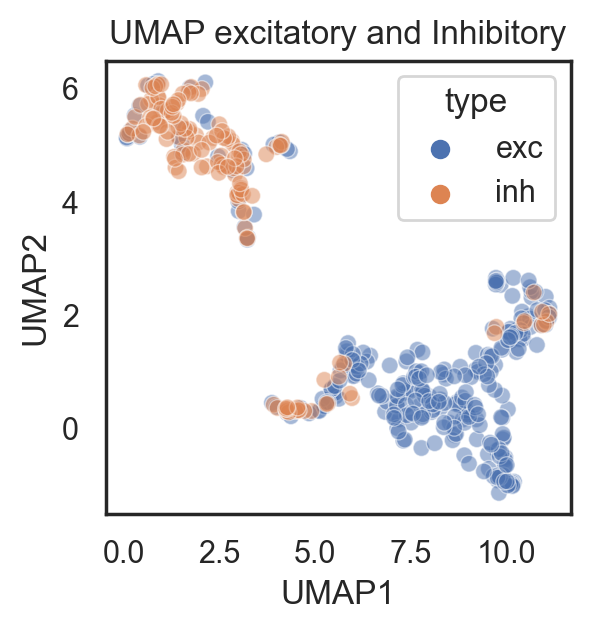

40


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:608: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:651: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


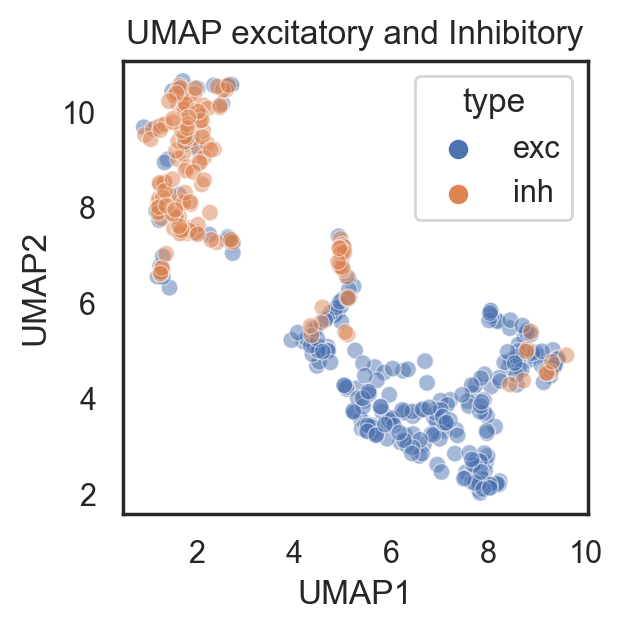

45


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:608: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:651: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


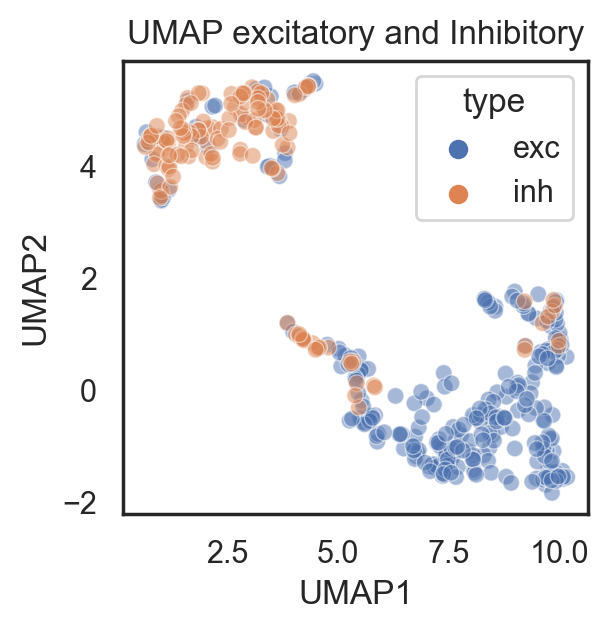

In [56]:
df_exc = exc_df#df_all_conds_exc 
df_inh = inh_df#df_all_conds_inh 

df_exc['labels'] = np.repeat('exc',len(df_exc))
df_inh['labels'] = np.repeat('inh',len(df_inh))
df_comb = pd.concat((df_exc,df_inh))

for i in range(5,50,5):
    print(i)
    plot_UMAP_combined(df_exc[['Vm_avg', 'resistance', 'thr','fr', 'isi', 'sub_thr', 'imp']],
                       df_inh[['Vm_avg', 'resistance', 'thr','fr', 'isi', 'sub_thr', 'imp']],
                       i,0.0,1,[3,3])

In [252]:
sns.pairplot(df_comb[['Vm_avg', 'resistance', 'thr','fr', 'isi', 'sub_thr', 'imp']],hue='labels')

NameError: name 'df_comb' is not defined

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

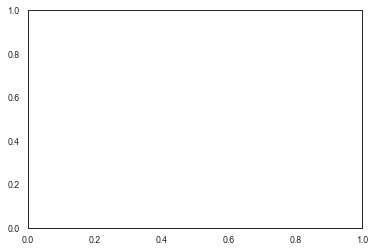

In [160]:
plt.scatter(x=np.arange(len(df_exc)),y=df_exc['thr'],data=df_exc)
plt.scatter(np.arange(len(df_inh['thr'])),df_inh['thr'])
plt.ylabel('Thresholds')
plt.title('excitatory v inhibitory')
plt.show()
plt.scatter(np.arange(len(df_exc['Vm_avg'])),df_exc['Vm_avg'])
plt.scatter(np.arange(len(df_inh['Vm_avg'])),df_inh['Vm_avg'])
plt.ylabel('Vm_avg')
plt.title('excitatory v inhibitory')

plt.show()
plt.scatter(df_exc['Vm_avg'],df_exc['thr'])
plt.scatter(df_inh['Vm_avg'],df_inh['thr'])
plt.xlabel('Vm_avg')
plt.ylabel('thresholds')
plt.title('excitatory v inhibitory')
plt.show()


5 0.0


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:608: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:651: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:608: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:651: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


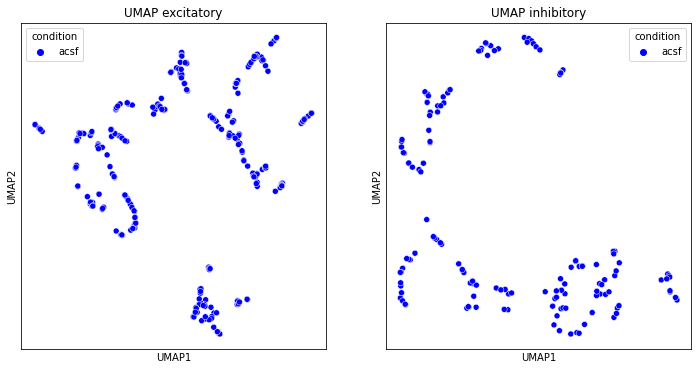

10 0.0


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:608: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:651: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:608: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:651: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


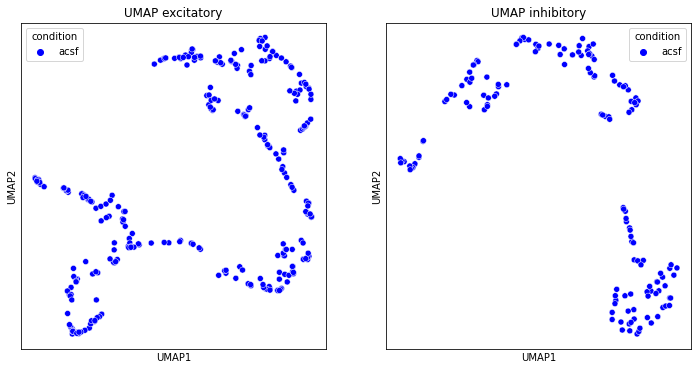

15 0.0


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:608: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:651: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:608: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:651: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


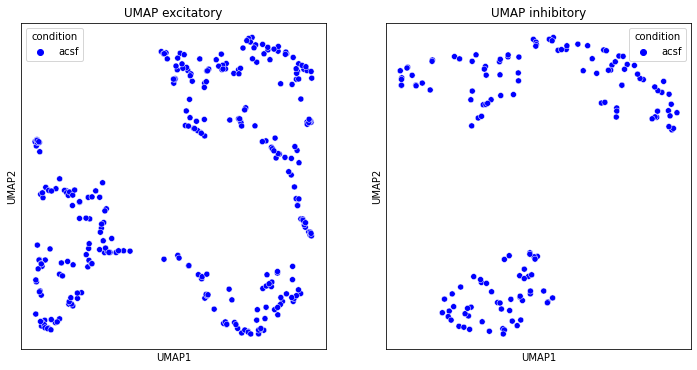

20 0.0


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:608: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:651: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:608: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:651: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


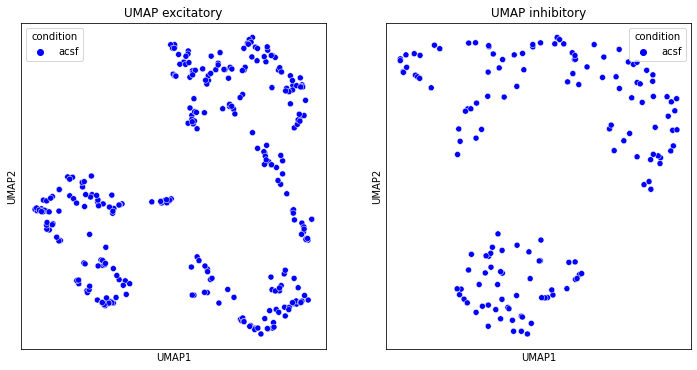

25 0.0


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:608: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:651: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:608: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:651: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


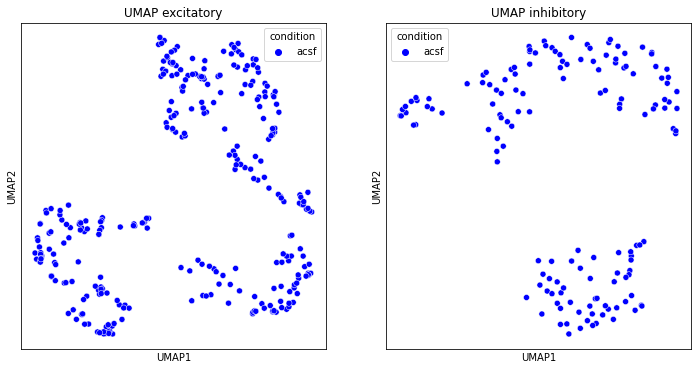

In [192]:
#@title create UMAP embeddings
feat = ['Vm_avg', 'resistance', 'thr', 'isi', 'sub_thr', 'imp']

df_exc = exc_df #pd.DataFrame(data_exc,columns=features)
df_inh = inh_df #pd.DataFrame(data_inh,columns=features)

'ei_lables_old'
'ei_lables_new'
'ei_lables_misclassify'
# neighbours  = np.arange(5,30,5)
neighbours  = np.arange(5,30,5)

# distances = np.arange(0.05,0.5,0.05)
distances = [0.0]
data_inh = combined_exc_inh[combined_exc_inh.ei_labels_old==0.0][['AP_avg','resistance','thr', 'isi', 'sub_thr','imp']]
# data_inh['resistance'] = np.abs(data_inh['resistance'])
data_exc = combined_exc_inh[combined_exc_inh.ei_labels_old==1.0][['AP_avg','resistance','thr', 'isi', 'sub_thr','imp']]

for n in neighbours:
    for dist in distances:
        print(n, dist)
        # plot_UMAP(df_inh[['Vm_avg', 'resistance', 'thr', 'isi', 'sub_thr','imp']],
        #           df_exc[['Vm_avg', 'resistance', 'thr', 'isi', 'sub_thr','imp']],
        #           n,
        #           dist,
        #           np.repeat(['acsf'],len(df_inh)),np.repeat(['acsf'],len(df_exc)),
        #           figsize=[12,6],
        #           random_state=42)
        plot_UMAP(data_inh,
                  data_exc,
                  n,
                  dist,
                  np.repeat(['acsf'],len(data_inh)),np.repeat(['acsf'],len(data_exc)),
                  figsize=[12,6],
                  random_state=42)                  

                #   'blue','blue',n,dist,labels_inh,labels_exc,figsize=[8,4],random_state=65)


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:608: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:651: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:608: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:651: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


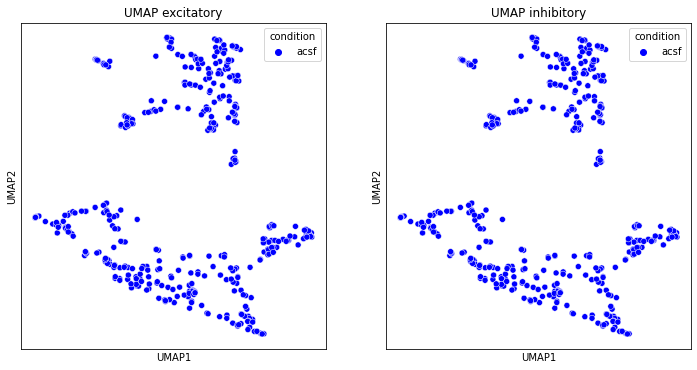

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:608: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:651: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:608: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:651: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


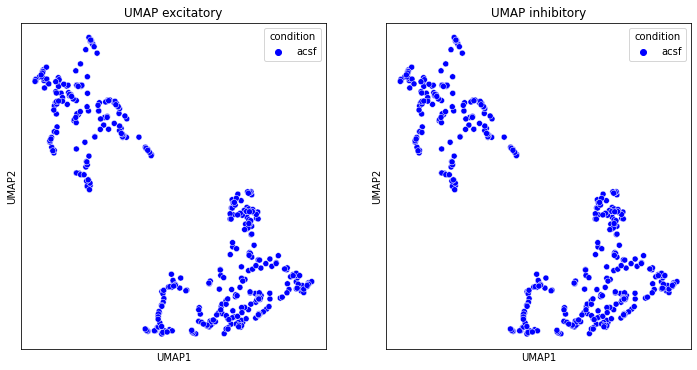

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:608: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:651: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:608: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:651: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


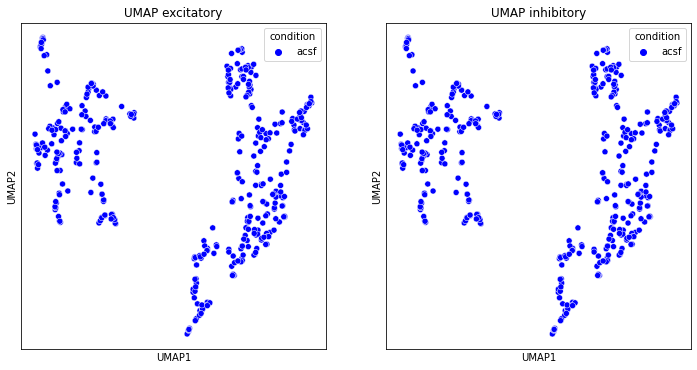

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:608: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:651: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:608: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:651: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


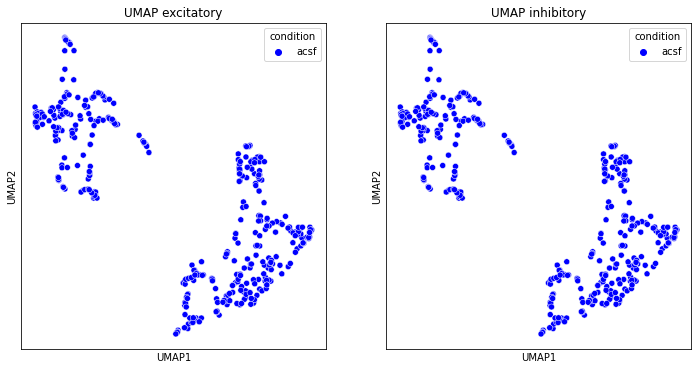

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:608: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:651: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:608: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:651: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


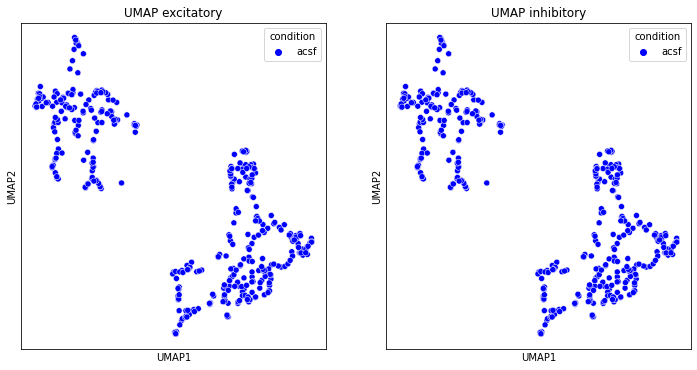

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:608: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:651: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:608: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:651: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


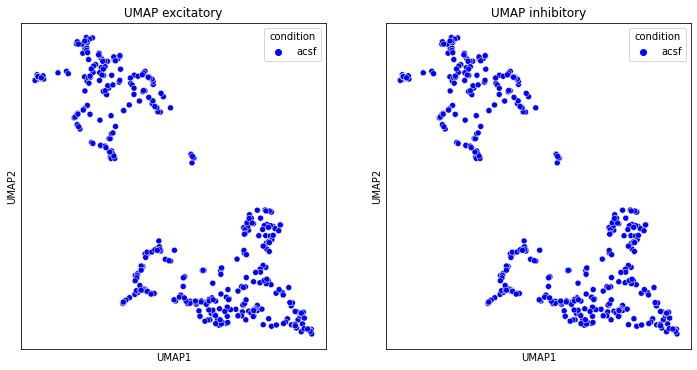

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:608: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:651: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:608: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:651: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


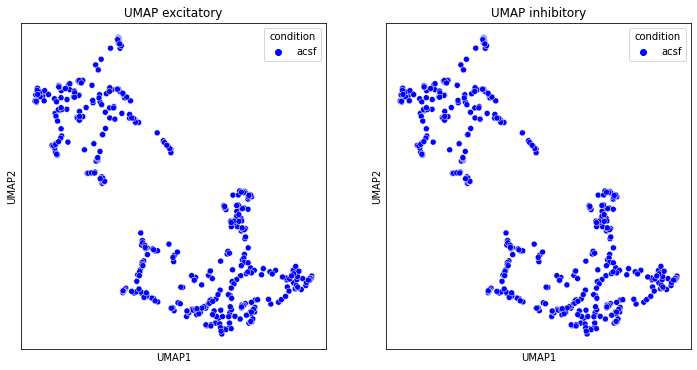

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:608: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:651: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:608: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:651: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


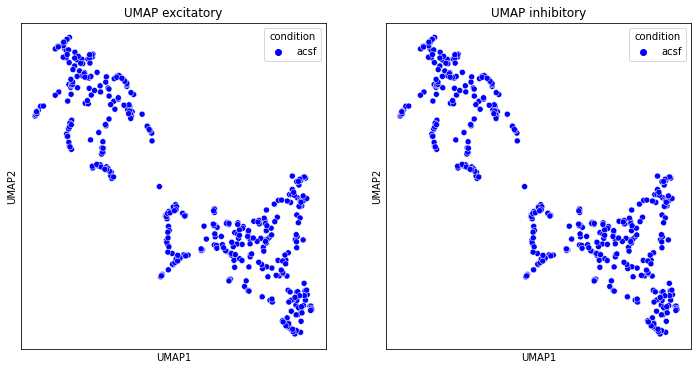

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:608: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:651: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:608: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:651: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


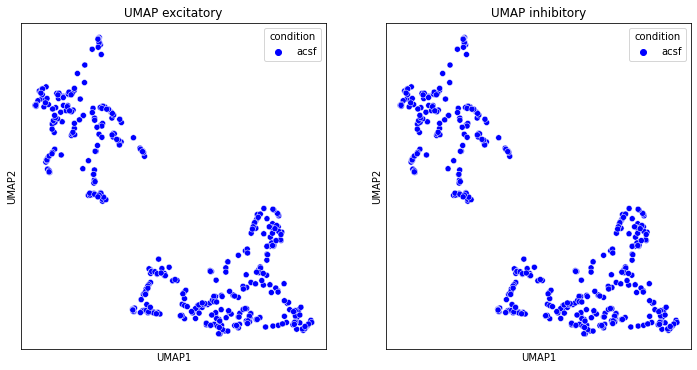

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:608: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:651: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:608: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:651: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


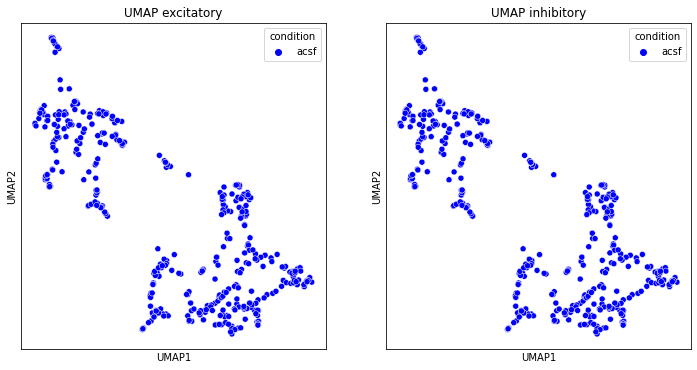

In [72]:
# for i in range(10):
#     plot_UMAP(combined_exc_inh[combined_exc_inh.ei_labels==0][['AP_avg',  'resistance','fr','thr', 'isi', 'sub_thr','imp']],
#                 combined_exc_inh[combined_exc_inh.ei_labels==1][['AP_avg','resistance','fr', 'thr', 'isi', 'sub_thr','imp']],
#                 n,
#                 dist,
#                 np.repeat(['acsf'],len(combined_exc_inh[combined_exc_inh.ei_labels==0])),np.repeat(['acsf'],len(combined_exc_inh[combined_exc_inh.ei_labels==1])),
#                 figsize=[12,6],
#                 random_state=i)   
# for i in range(10):

# df_exc_NC = exc_df[['AP_avg','resistance', 'thr','isi', 'sub_thr','imp']] # df_all_conds_exc[['Vm_avg', 'resistance', 'thr', 'isi', 'sub_thr','thr']] #pd.DataFrame(data_exc,columns=features)
# df_inh_NC = inh_df[['AP_avg','resistance', 'thr','isi', 'sub_thr','imp']]
for i in range(10):
    inh = combined_exc_inh[['AP_avg','resistance', 'thr','isi', 'sub_thr','imp']]#[combined_exc_inh.ei_lables_new==0.0]
    exc = combined_exc_inh[['AP_avg','resistance', 'thr','isi', 'sub_thr','imp']]#[combined_exc_inh.ei_lables_new==1.0]
    plot_UMAP(inh,
                exc,
                20,
                0.0,
                np.repeat(['acsf'],len(inh)),np.repeat(['acsf'],len(exc)),
                figsize=[12,6],
                random_state=i)                   

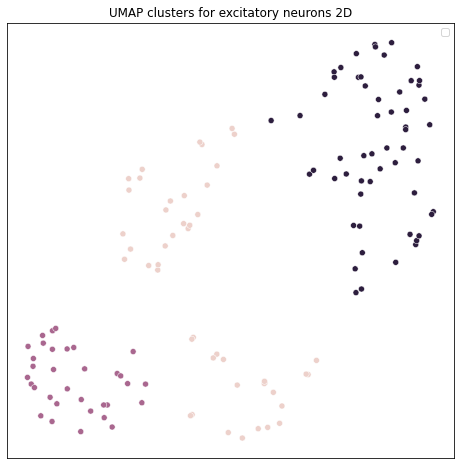

In [171]:
#@title clustering the UMAP embeddings

df_exc_NC = exc_df[['AP_avg','resistance', 'thr','isi', 'sub_thr','imp']] # df_all_conds_exc[['Vm_avg', 'resistance', 'thr', 'isi', 'sub_thr','thr']] #pd.DataFrame(data_exc,columns=features)
df_inh_NC = inh_df[['AP_avg','resistance', 'thr','isi', 'sub_thr','imp']]       #df_all_conds_inh[['Vm_avg', 'resistance', 'thr', 'isi', 'sub_thr','thr']] #pd.DataFrame(data_inh,columns=features)
ind_feat = [0,3,4,6,18,20]

def plot_UMAP_clusters(data_inh,data_exc,neighbours,distance,condition_inh,condition_exc,k_exc,k_inh, random_state,c_list =['green','purple','cyan'],save=False):
    """plots UMAP for excitatory and inhibitory cells 

    Args:
        data_inh (ndarray): cell X feature matrix for inhibitory cells
        data_exc (ndarray): cell X feature matrix for excitatory cells
        c_exc (array): _description_
        c_inh (array): _description_
        neighbours (int): number of neares neighbours
        distance (float): minimum distance between points
    """
    data_exc_umap_scaler = StandardScaler()
    data_exc_umap = data_exc_umap_scaler.fit_transform(data_exc)
    data_exc_umap = normalize(data_exc_umap)
    data_inh_umap = data_exc_umap_scaler.fit_transform(data_inh)
    data_inh_umap = normalize(data_inh_umap)

    neighbours = neighbours
    dist = distance
    clusterable_embedding2d_exc = umap.UMAP(n_neighbors=neighbours,min_dist=dist,
        n_components=2,random_state=random_state,).fit_transform(data_exc_umap)
    #initialize kmeans parameters
    kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "random_state": 1,
    }

    # #create list to hold SSE values for each k
    # sse = []
    # for k in range(1, 11):
    #     kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    #     kmeans.fit(clusterable_embedding2d_exc)
    #     sse.append(kmeans.inertia_)

    # #visualize results
    # plt.plot(range(1, 11), sse)
    # plt.xticks(range(1, 11))
    # plt.xlabel("Number of Clusters exc")
    # plt.ylabel("SSE")
    # plt.show()

    fig = plt.figure(figsize=[8,8])
    ax12d = fig.add_subplot(1,1,1)

    kmeans_exc = KMeans(n_clusters=k_exc,random_state=random_state).fit(clusterable_embedding2d_exc)
    centroids_exc = kmeans_exc.cluster_centers_
    labels_exc = kmeans_exc.labels_.astype(float)

    df_2d_exc = {'UMAP1':clusterable_embedding2d_exc[:, 0],
             'UMAP2':clusterable_embedding2d_exc[:, 1],
             'condition':condition_exc,
             'class':labels_exc}

    ax12d.set_xticks([])
    ax12d.set_yticks([])
    sns.scatterplot(data=df_2d_exc,x='UMAP1',y='UMAP2',hue='class',palette=['grey','grey'],ax=ax12d)
    ax12d.set_title('UMAP clusters for excitatory neurons 2D')
    ax12d.legend([])
    if save:
        plt.savefig('C:/Users/Nishant Joshi/Documents/DNM/exc_umap_cluster.png',dpi=200)
    else:
        plt.show()

    #--------------------INH
    clusterable_embedding3d_inh = umap.UMAP(n_neighbors=neighbours, min_dist=dist,
                                        n_components=3,random_state=random_state).fit_transform(data_inh_umap)

    clusterable_embedding2d_inh = umap.UMAP(n_neighbors=neighbours, min_dist=dist,
                                        n_components=2,random_state=random_state).fit_transform(data_inh_umap)

    #initialize kmeans parameters
    kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "random_state": 1,
    }

    #create list to hold SSE values for each k
    # sse = []
    # for k in range(1, 11):
    #     kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    #     kmeans.fit(clusterable_embedding2d_inh)
    #     sse.append(kmeans.inertia_)

    # #visualize results
    # plt.plot(range(1, 11), sse)
    # plt.xticks(range(1, 11))
    # plt.xlabel("Number of Clusters inh")
    # plt.ylabel("SSE")
    # plt.show()

    fig = plt.figure(figsize=[8,8])
    # ax2 = fig.add_subplot(1,2,1,projection='3d')
    ax22d = fig.add_subplot(1,1,1)
    
    kmeans_inh = KMeans(n_clusters=k_inh,random_state=random_state).fit(clusterable_embedding2d_inh)
    centroids_inh = kmeans_inh.cluster_centers_
    labels_inh = kmeans_inh.labels_.astype(float)

    df_2d_inh = {'UMAP1':clusterable_embedding2d_inh[:, 0],
                'UMAP2':clusterable_embedding2d_inh[:, 1],
                'condition':condition_inh,
                'class':labels_inh}


    sns.scatterplot(data=df_2d_inh,x='UMAP1',y='UMAP2', hue='class',palette=c_list, ax=ax22d)
    ax22d.set_xticks([])
    ax22d.set_yticks([])
    ax22d.set_title('UMAP clusters for inhibitory neurons 2D')
    if save:
        plt.savefig('C:/Users/Nishant Joshi/Documents/DNM/inh_umap_cluster.png',dpi=200)
    else:
        plt.show()

    return labels_exc, labels_inh

def plot_UMAP_clusters_single(data_inh, neighbours,distance,labels,k_inh, random_state,c_list =['green','purple','cyan'],use_kmeans=False,save=False):
    """plots UMAP for excitatory and inhibitory cells 

    Args:
        data_inh (ndarray): cell X feature matrix for inhibitory cells
        data_exc (ndarray): cell X feature matrix for excitatory cells
        c_exc (array): _description_
        c_inh (array): _description_
        neighbours (int): number of neares neighbours
        distance (float): minimum distance between points
    """
    data_umap_scaler = StandardScaler()
    data_umap = data_umap_scaler.fit_transform(data_inh)
    data_umap = normalize(data_umap)
 
    neighbours = neighbours
    dist = distance
    clusterable_embedding2d_exc = umap.UMAP(n_neighbors=neighbours,min_dist=dist,
        n_components=2,random_state=random_state,).fit_transform(data_umap)
    #initialize kmeans parameters
    kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "random_state": 1,
    }


    fig = plt.figure(figsize=[8,8])
    ax12d = fig.add_subplot(1,1,1)
    if use_kmeans:
        kmeans_exc = KMeans(n_clusters=k_inh,random_state=random_state).fit(clusterable_embedding2d_exc)
        centroids_exc = kmeans_exc.cluster_centers_
        labels_exc = kmeans_exc.labels_.astype(float)
    else:
        labels_exc = labels
    df_2d_exc = {'UMAP1':clusterable_embedding2d_exc[:, 0],
             'UMAP2':clusterable_embedding2d_exc[:, 1],
             'class':labels_exc}

    ax12d.set_xticks([])
    ax12d.set_yticks([])
    # sns.scatterplot(data=df_2d_exc,x='UMAP1',y='UMAP2',hue='class',palette=c_list,ax=ax12d)
    sns.scatterplot(data=df_2d_exc,x='UMAP1',y='UMAP2',hue='class',ax=ax12d)

    ax12d.set_title('UMAP clusters for excitatory neurons 2D')
    ax12d.legend([])
    if save:
        plt.savefig('C:/Users/Nishant Joshi/Documents/DNM/exc_umap_cluster.png',dpi=200)
    
    plt.show()

    

    return labels_exc

data_inh_ = combined_exc_inh[combined_exc_inh.ei_labels_old==0.0]
data_inh = data_inh_[data_inh_['ei_labels_misclassify']==0.0][['AP_avg','ap_width','resistance','thr','isi', 'sub_thr', 'imp']]
data_exc = combined_exc_inh[combined_exc_inh.ei_labels_old==1.0][['AP_avg', 'ap_width','resistance','thr','isi', 'sub_thr', 'imp']]
# for neighbours in range(5,50):
# labels_exc, labels_inh = plot_UMAP_clusters(data_inh,
#                                     data_exc,
#                                     20,
#                                     0.0,
#                                     condition_inh=np.repeat(['acsf'],len(data_inh)),
#                                     condition_exc=np.repeat(['acsf'],len(data_exc)),
#                                     k_inh=3,
#                                     k_exc=2,
#                                     random_state=0,c_list = ['blue','crimson','teal'],save=False)
# for i in range(5,50,5):
# for i in range(10):
labels_inh = plot_UMAP_clusters_single(data_inh,
                        20,
                        0.0,
                        labels=data_inh_[data_inh_.ei_labels_misclassify==0.0]['ei_labels_old'],
                        k_inh=3,
                        use_kmeans=True,
                        random_state=42,
                        c_list = ['blue','crimson','teal'],
                        save=False)


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:608: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:651: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:608: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:651: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


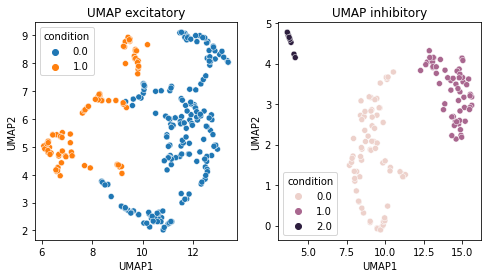

In [23]:
#@title effect of noise
fac = 0.1
data_exc = exc_df #data_acsf_exc_all_conds
data_inh = inh_df #data_acsf_inh_all_conds

# df_exc_NC = pd.DataFrame(data_exc,columns=features)
# df_inh_NC = pd.DataFrame(data_inh,columns=features)

# data_exc_w_noise =data_exc +fac*np.random.randn(data_exc.shape[0],data_exc.shape[1])
# data_inh_w_noise =data_inh +fac*np.random.randn(data_inh.shape[0],data_inh.shape[1])

df_exc_NC = exc_df #pd.DataFrame(data_exc,columns=features)
df_inh_NC = inh_df #pd.DataFrame(data_inh,columns=features)

df_exc_NC_w_noise = exc_df # pd.DataFrame(data_exc_w_noise,columns=features)
df_inh_NC_w_noise = inh_df # pd.DataFrame(data_inh_w_noise,columns=features)


# plot_UMAP(df_inh_NC,
#             df_exc_NC,
#             15,
#             0.0,
#             labels_inh,
#             labels_exc,
#             figsize=[8,4],
#             random_state=42)


plot_UMAP(df_inh_NC_w_noise[['Vm_avg', 'resistance', 'thr','isi', 'sub_thr','imp']],
          df_exc_NC_w_noise[['Vm_avg', 'resistance', 'thr','isi', 'sub_thr','imp']],
            15,
            0.0,
            labels_inh,
            labels_exc,
            figsize=[8,4],
            random_state=42)

In [22]:
#@title effect of seed
df_exc_NC = pd.DataFrame(data_exc,columns=features)
df_inh_NC = pd.DataFrame(data_inh,columns=features)


plot_UMAP(df_inh_NC[['Vm_avg', 'resistance', 'thr','isi', 'sub_thr','imp']],
            df_exc_NC[['Vm_avg', 'resistance', 'thr','isi', 'sub_thr','imp']],
            15,0.0,labels_inh,labels_exc,figsize=[8,4],random_state=42)

plot_UMAP(df_inh_NC[['Vm_avg', 'resistance', 'thr','isi', 'sub_thr','imp']],
            df_exc_NC[['Vm_avg', 'resistance', 'thr','isi', 'sub_thr','imp']]
            ,15,0.0,labels_inh,labels_exc,figsize=[8,4],random_state=300)


NameError: name 'data_exc' is not defined

In [151]:
for i in range(len(ind_feat)):
    inds = np.ones_like(ind_feat,dtype=bool)
    inds[i] = False
    plot_UMAP(df_inh_NC[df_inh_NC.columns[ind_feat][inds]],
            df_exc_NC[df_exc_NC.columns[ind_feat][inds]],
            'blue','blue',15,0.0,labels_inh,labels_exc,figsize=[8,4],random_state=200)
    

IndexError: index 6 is out of bounds for axis 0 with size 6

##Run this

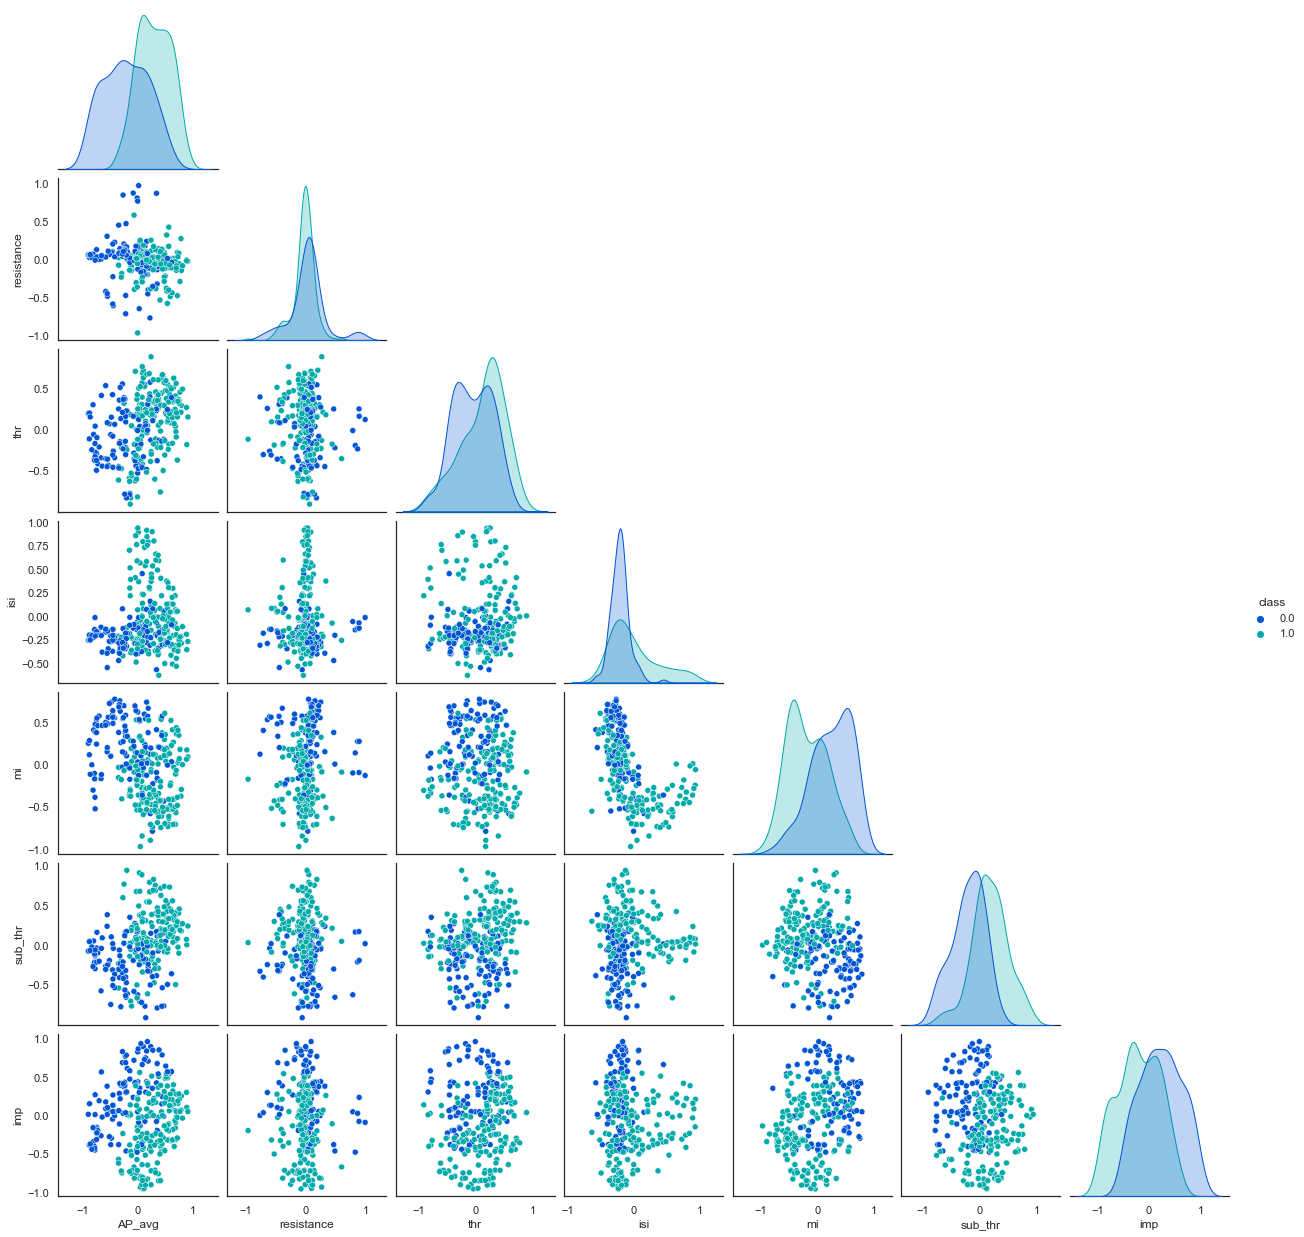

In [149]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# transform data
feat = ['AP_avg', 'resistance', 'thr','mi', 'isi', 'sub_thr','imp']
df_exc = exc_df[['AP_avg', 'resistance', 'thr', 'isi','mi', 'sub_thr','imp','exp_name']].reset_index(drop=True)
df = scaler.fit_transform(df_exc[feat])
df = normalize(df)
df_exc[feat] = df
df_exc['class'] = labels_exc

sns.pairplot(df_exc,
            hue='class',
            diag_kws = {'common_norm':False,
                        'common_grid':True,},
                        palette='winter',corner=True)

plt.show()

In [178]:
# df_inh[[['resistance'],['exp_name']]]
df_inh[['resistance','exp_name']]

resistance                 exp_name
0     -0.224211  NC_170623_aCSF_D1ago_E4
1     -0.395767  NC_170626_aCSF_D1ago_E1
2     -0.187684  NC_170626_aCSF_D1ago_E2
3      0.003602  NC_170626_aCSF_D1ago_E4
4     -0.155117     NC_170627_DopD2D1_E1
..          ...                      ...
130    0.464975           xuan_9-5-19_E1
131   -0.459726           xuan_9-5-19_E3
132   -0.004898           xuan_9-9-19_E1
133   -0.463492           xuan_9-9-19_E3
134    0.650472           xuan_9-9-19_E4

[135 rows x 2 columns]

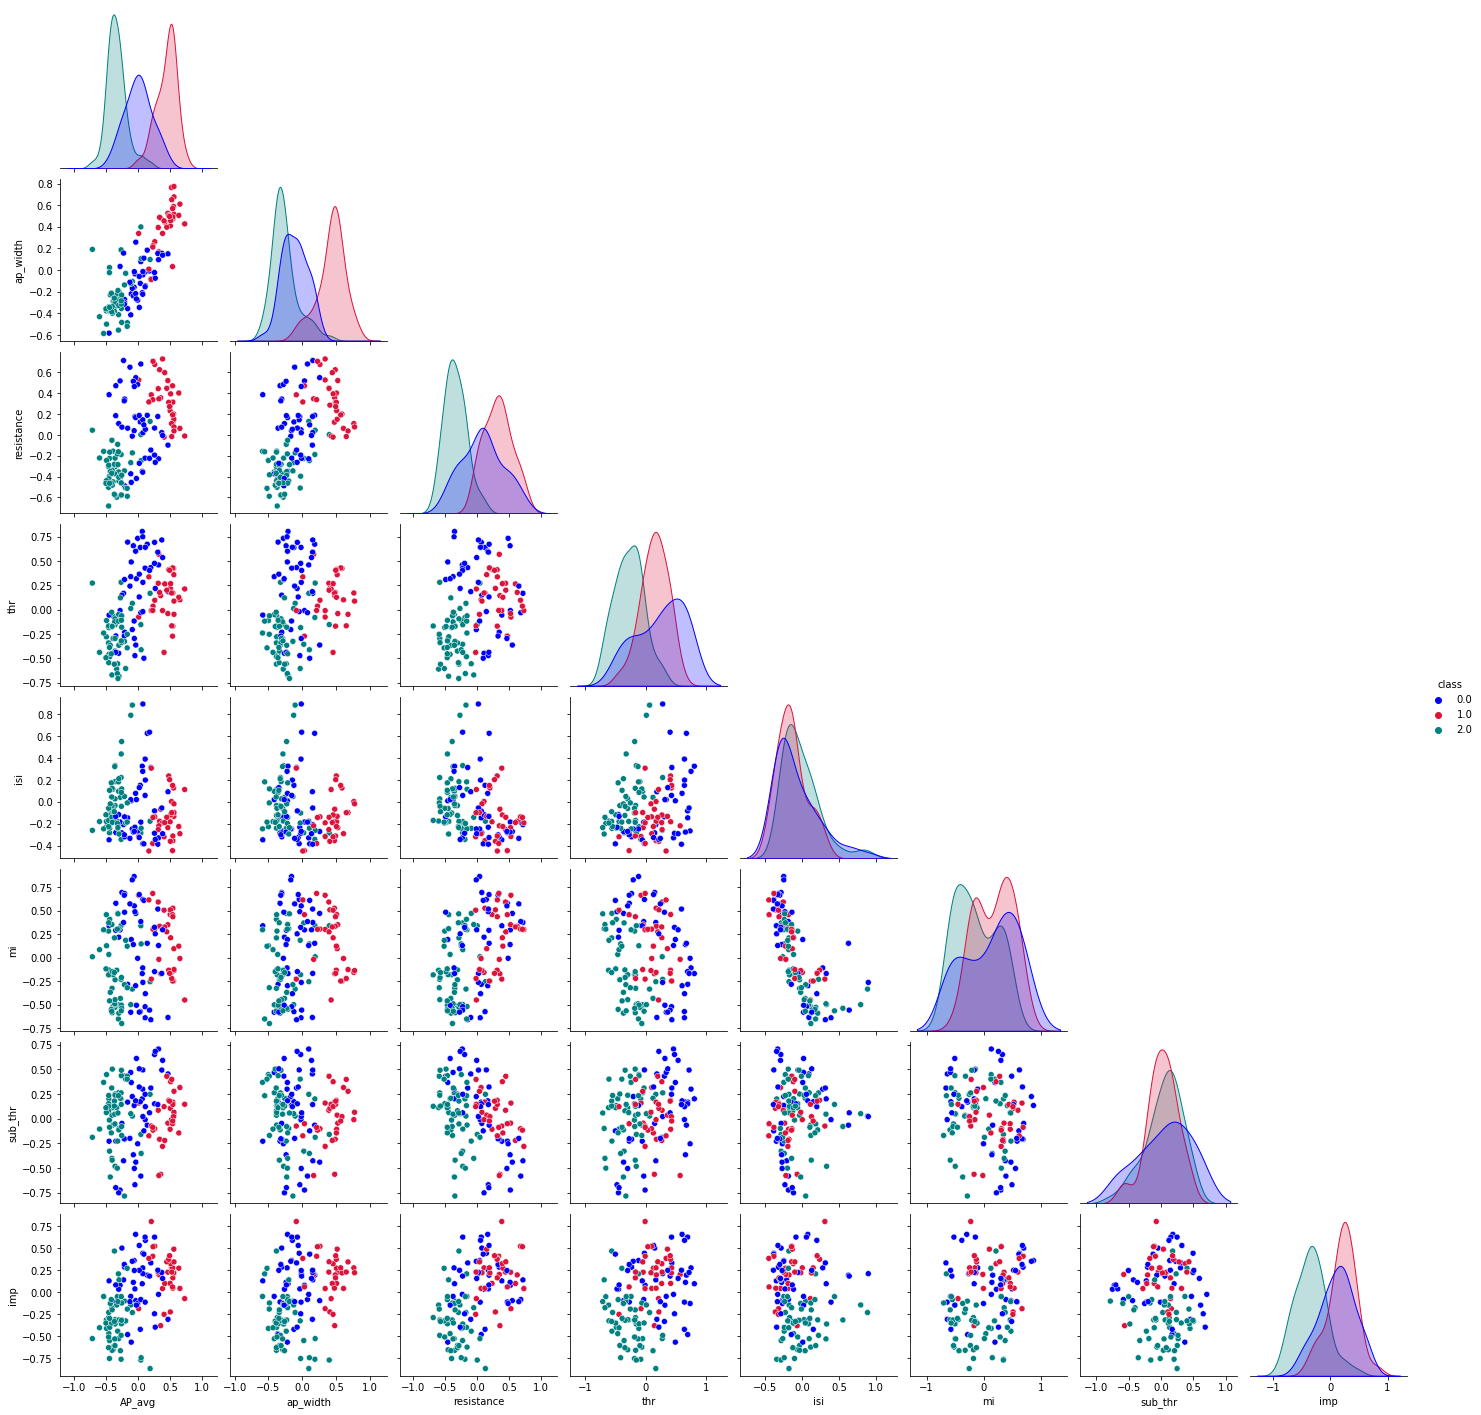

In [173]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# transform data
# mpl.rcParams["axes.labelsize"] = 20

feat = ['AP_avg', 'ap_width','resistance', 'thr','mi', 'isi', 'sub_thr','imp']
df_inh = combined_exc_inh[combined_exc_inh['ei_labels_old']==0.0]
df_inh = df_inh[df_inh.ei_labels_misclassify==0.0][['AP_avg', 'ap_width','resistance', 'thr', 'isi','mi', 'sub_thr','imp','exp_name']].reset_index(drop=True)
df = scaler.fit_transform(df_inh[feat])
df = normalize(df)
df_inh[feat] = df
df_inh['class'] = labels_inh

plot = sns.pairplot(df_inh,
            hue='class',
            corner=True,
            diag_kws = {'common_norm':False,
                        'common_grid':True,},
                        palette=['blue','crimson','teal']
            )
# plot = plot.map_upper(sns.scatterplot).add_legend(title='Class', fontsize= '12')
# plt.savefig('C:/Users/Nishant Joshi/Documents/DNM/pairplot_inh.png',dpi=200)
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'squeeze'

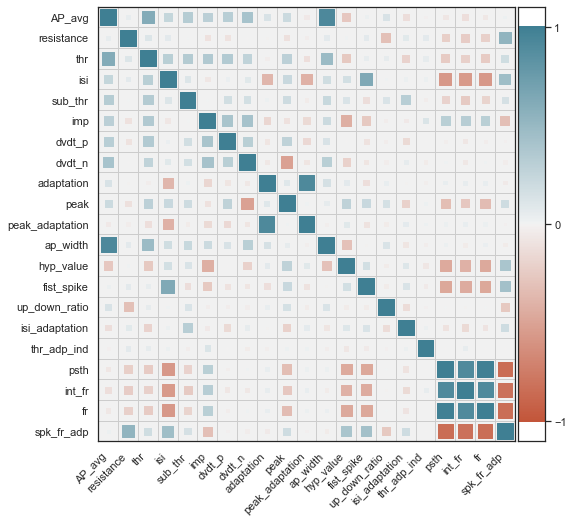

In [167]:
from heatmap import heatmap, corrplot
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
corrplot(data = inh_df[['AP_avg','resistance', 'thr', 'isi', 'sub_thr','imp', 'dvdt_p',
                        'dvdt_n','adaptation', 'peak', 'peak_adaptation',
                        'ap_width', 'hyp_value', 'fist_spike', 'up_down_ratio', 
                        'isi_adaptation', 'thr_adp_ind', 'psth', 'int_fr', 'fr', 
                        'spk_fr_adp']].corr(),size_scale=250)
plt.savefig('C:/Users/Nishant Joshi/Documents/DNM/corrplot_inh.png',dpi=200)
plt.show()
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
corrplot(data = exc_df[['AP_avg','resistance', 'thr', 'isi', 'sub_thr','imp', 'dvdt_p',
                        'dvdt_n','adaptation', 'peak', 'peak_adaptation',
                        'ap_width', 'hyp_value', 'fist_spike', 'up_down_ratio', 
                        'isi_adaptation', 'thr_adp_ind', 'psth', 'int_fr', 'fr', 
                        'spk_fr_adp']].corr(),size_scale=250)
plt.savefig('C:/Users/Nishant Joshi/Documents/DNM/corrplot_exc.png',dpi=200)
# plt.show()

-0.016053926802939947 0 -0.003461879558791012


<ipython-input-186-aa722e2c841b>:28: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


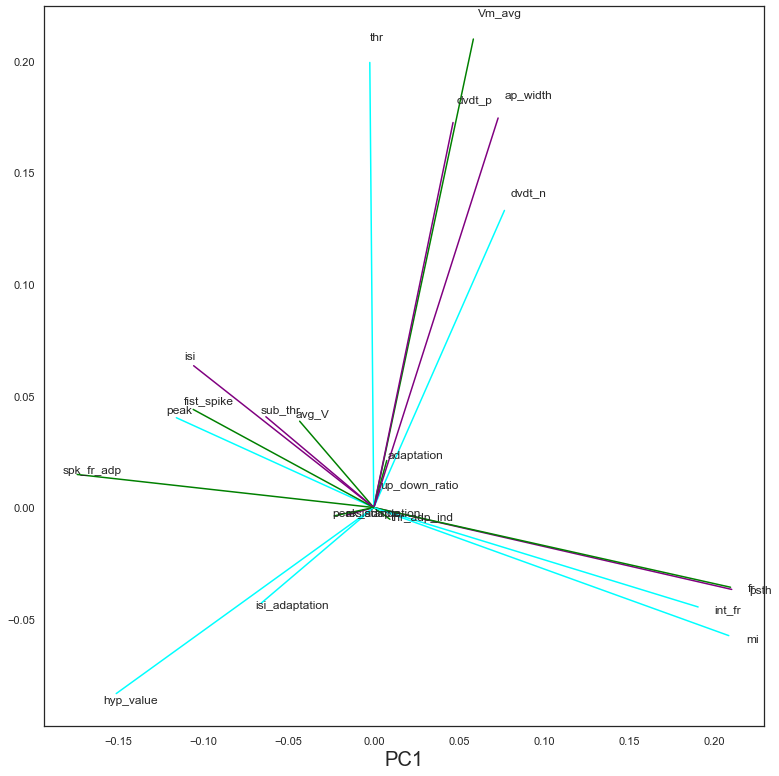

In [186]:

# features_ = ['Vm_avg','resistance', 'thr', 'isi', 'sub_thr','imp']
scalar = StandardScaler()
data = inh_df[inh_df.columns[:-3]] #[['Vm_avg','resistance', 'thr', 'isi', 'sub_thr','imp']].to_numpy()
data = scalar.fit_transform(data)
data = normalize(data) 
features  = inh_df.columns[:-3]
pca_x = PCA(whiten=True,random_state=40)
# Project the data in 2D
reduced_data = pca_x.fit_transform(data)
exp_var = pca_x.explained_variance_ratio_
loadings = pca_x.components_.T * np.sqrt(pca_x.explained_variance_)
n_components = 2


# fig = plt.figure(figsize=[10,10])

fig  =  plt.figure(frameon=True,figsize=[10,10])
axloadings = fig.add_axes([0, 0, 1, 1])
# axloadings.axis('off')
for i, feature in enumerate(features):
    # if (abs(loadings[i, 0])+abs(loadings[i, 1]))>0.5:
    if feature == 'resistance':
        print(loadings[i, 0],0,loadings[i, 1])
    axloadings.plot([0,loadings[i, 0]],[0,loadings[i, 1]])
    axloadings.annotate(feature, xy = [loadings[i, 0], loadings[i, 1]],xytext=[loadings[i, 0]+0.05*loadings[i, 0], loadings[i, 1]+0.05*loadings[i, 1]])
axloadings.patch.set_visible(False)
axloadings.set_xlabel('PC1')
plt.tight_layout()
plt.show()


In [151]:
from statannotations.Annotator import Annotator

In [152]:
from itertools import combinations

In [153]:
def modify_cond_list(cond):
    if cond in ['aCSF','ACSF']:
        return  cond.lower()
    elif cond.lower() in ['d1','d1ago']:
        return 'd1ago'
    elif cond.lower() in ['dop','dopamine','dopa']:
        return 'dopamine'
    
    elif cond.lower() in ['m1-ag', 'm1-ago', 'm1-ago+ant', 'm1-ant', 'm1-ant+ago']:
        return 'm1'
# array(['ACSF', 'AgoAnta', 'Cirazoline', 'D1', 'D1ago', 'D2', 'DOPA',
#        'DOPAMINE', 'Dop', 'M1-ag', 'M1-ago', 'M1-ago+ant', 'M1-ant',
#        'M1-ant+ago', 'aCSF', 'aCSF_BIC', 'sag'], dtype=object)    
    else:
        return cond.lower()    
    
def plot_significance_new(data,var,hue,ax,palette='mako',test ='Mann-Whitney'):


    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)

    sns.boxplot(data=data,
                x=hue,
                y=var,
                # whis=[0, 100], 
                width=.6, palette=palette,ax=ax)
                # boxprops={"facecolor": (.2, .6, .8, .5)},
                # medianprops={"color": "red"},ax=ax)                            
    sns.stripplot(x=hue, y=var , data=data,
                size=3, color=".4", linewidth=0,ax=ax)
    ax.set_xlabel('class',fontdict={'fontsize':20})
    ax.set_ylabel(var,fontdict={'fontsize':20})


    pairs = np.unique(data[hue])
    pairs = [i for i in combinations(pairs,2)]


    annotator = Annotator(ax,pairs, data=data, x=hue,palette=palette, y=var)
    annotator.configure(test=test, text_format='star', loc='inside')
    annotator.apply_and_annotate()  
    


In [7]:

def return_acsf_and_drug_counts(data):
    acsf_data = data[data.cond=='acsf']
    conds = np.unique(data.cond)[2:]
    for cond_i in conds:
        data_exps = data[data.cond==cond_i]['exp_name']
        acsf_cond_i = len(acsf_data[acsf_data.exp_name.isin(data_exps)])
        print(cond_i+' : '+str(len(data_exps))+', acsf : '+str(acsf_cond_i))
print('exc')
return_acsf_and_drug_counts(inh_df_all)    
print('inh')
return_acsf_and_drug_counts(exc_df_all)    


exc
Cirazoline : 21, acsf : 0
D1 : 10, acsf : 0
D1ago : 18, acsf : 0
D2 : 19, acsf : 0
DOPAMINE : 9, acsf : 0
Dop : 11, acsf : 0
M1-ag : 2, acsf : 0
M1-ago : 18, acsf : 0
M1-ago+ant : 3, acsf : 0
M1-ant : 11, acsf : 0
M1-ant+ago : 4, acsf : 0
aCSF : 70, acsf : 0
sag : 9, acsf : 0
inh
Cirazoline : 19, acsf : 0
D1 : 6, acsf : 0
D1ago : 49, acsf : 0
D2 : 44, acsf : 0
DOPA : 1, acsf : 0
DOPAMINE : 11, acsf : 0
Dop : 7, acsf : 0
M1-ag : 2, acsf : 0
M1-ago : 20, acsf : 0
M1-ago+ant : 1, acsf : 0
M1-ant : 12, acsf : 0
M1-ant+ago : 5, acsf : 0
aCSF : 138, acsf : 0
aCSF_BIC : 35, acsf : 0
sag : 13, acsf : 0


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:608: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:651: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


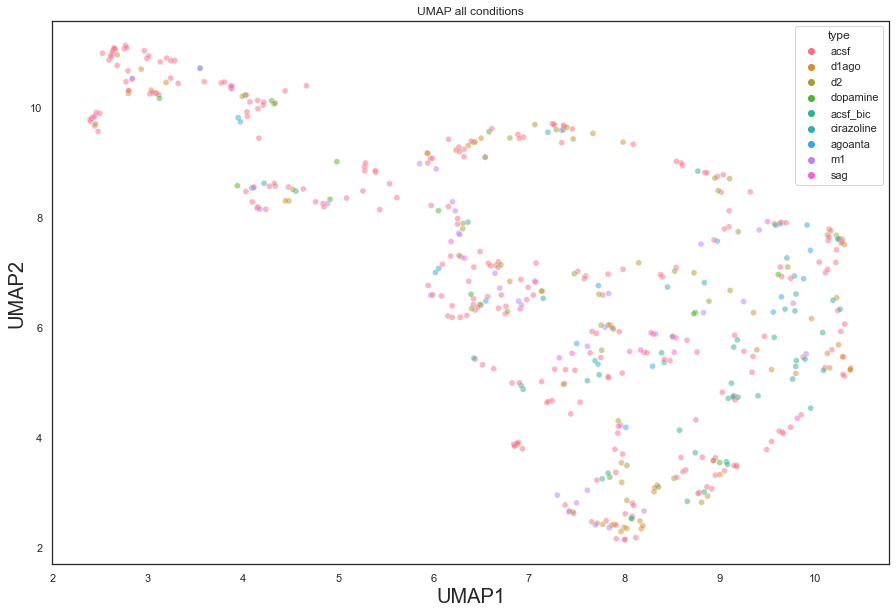

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:608: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:651: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


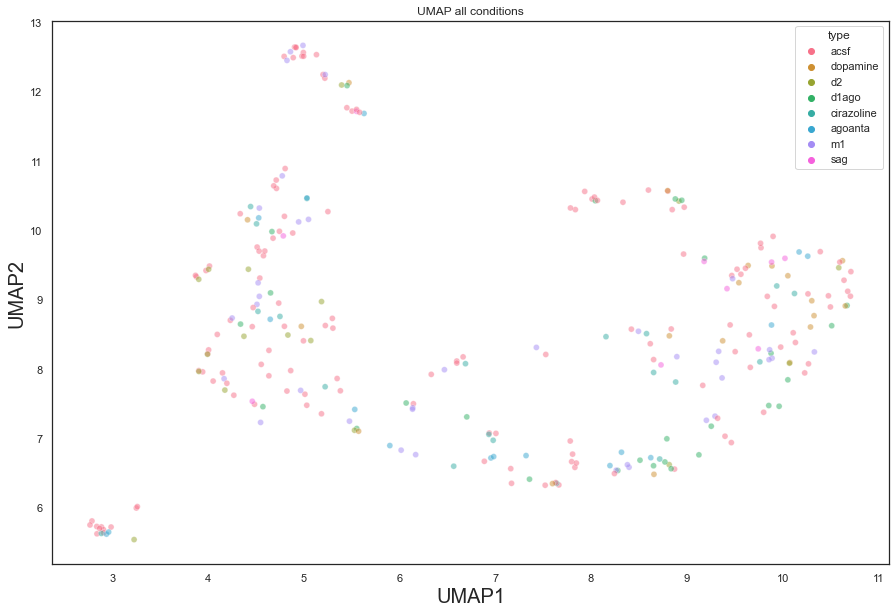

In [154]:
exc = data_all_conds['exc']
inh = data_all_conds['inh']
exc_df_all = pd.DataFrame(exc,columns = features_ext)
exc_df_all = exc_df_all.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
exc_df_all = exc_df_all.reset_index(drop=False)
exc_df_all.cond = exc_df_all.cond.apply(modify_cond_list)
inh_df_all = pd.DataFrame(inh,columns = features_ext)
inh_df_all = inh_df_all.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
inh_df_all = inh_df_all.reset_index(drop=False)
inh_df_all.cond = inh_df_all.cond.apply(modify_cond_list)
plot_UMAP_all_conds(exc_df_all[['AP_avg', 'resistance', 'thr', 'isi', 'sub_thr','imp']],labels=exc_df_all['cond'],neighbours=20,distance=0.0,random_state=0,figsize=[15,10])
plot_UMAP_all_conds(inh_df_all[['AP_avg', 'resistance', 'thr', 'isi', 'sub_thr','imp']],labels=inh_df_all['cond'],neighbours=20,distance=0.0,random_state=0,figsize=[15,10])


In [155]:
exc_df_all_ = exc_df_all[exc_df_all.columns[1:]]
inh_df_all_ = inh_df_all[inh_df_all.columns[1:]]


In [156]:
def return_class_based_df(df_acsf,df_all):
    all_dfs = []
    for i in np.unique(df_acsf['class']):
        exp_class_0 = np.unique(df_acsf[df_acsf['class']==i]['exp_name'])
        df_ = df_all[df_all.exp_name.isin(exp_class_0)]
        df_['class'] = i
        all_dfs.append(df_)
    all_dfs_ = pd.concat(all_dfs)
    return all_dfs_,np.unique(all_dfs_.cond)

df_exc_for_sig,conds_exc = return_class_based_df(df_exc, exc_df_all_)
df_inh_for_sig,conds_inh = return_class_based_df(df_inh, inh_df_all_)

<ipython-input-156-a48ebfeff971>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-156-a48ebfeff971>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-156-a48ebfeff971>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-156-a48ebfeff

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:608: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:651: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:608: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:651: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


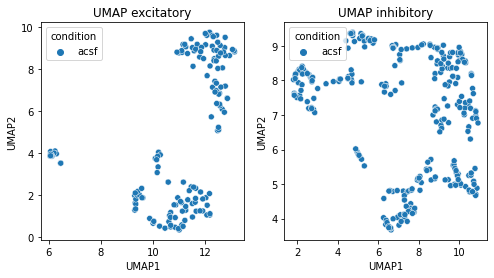

In [27]:
plot_UMAP(df_exc_for_sig[df_exc_for_sig.cond=='acsf'][['Vm_avg', 'resistance', 'thr', 'isi', 'sub_thr','imp']],
            df_inh_for_sig[df_inh_for_sig.cond=='acsf'][['Vm_avg', 'resistance', 'thr', 'isi', 'sub_thr','imp']],
            20,
            0.0,
            np.repeat(['acsf'],len(df_exc_for_sig[df_exc_for_sig.cond=='acsf'])),np.repeat(['acsf'],len(df_inh_for_sig[df_inh_for_sig.cond=='acsf'])),
            figsize=[8,4],
            random_state=42)

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:608: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\relational.py:651: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


Text(0.5, 1.0, 'UMAP inhibitory')

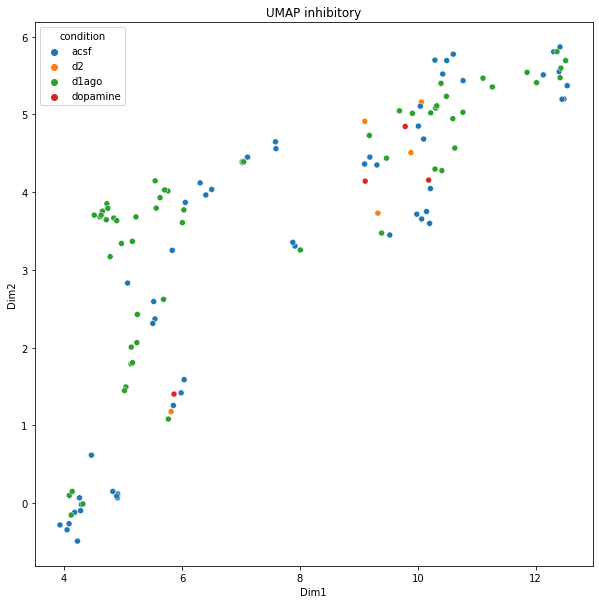

In [44]:
fig = plt.figure(figsize=[10,10])
exps = df_exc_for_sig[df_exc_for_sig.cond=='d1ago']['exp_name']

ax22d = fig.add_subplot(1,1,1)
data_exc_umap_scaler = StandardScaler()
data_exc_umap = data_exc_umap_scaler.fit_transform(df_exc_for_sig[df_exc_for_sig.exp_name.isin(exps)][['Vm_avg', 'resistance', 'thr', 'isi', 'sub_thr','imp']])
data_exc_umap = normalize(data_exc_umap)
clusterable_embedding2d = umap.UMAP(n_neighbors=20, min_dist=0.0,
                                    n_components=2,random_state=20).fit_transform(data_exc_umap)
df_2d = {'Dim1':clusterable_embedding2d[:, 0],
            'Dim2':clusterable_embedding2d[:, 1],
            'condition':df_exc_for_sig[df_exc_for_sig.exp_name.isin(exps)]['cond']}

sns.scatterplot(data=df_2d,x='Dim1',y='Dim2',hue='condition',  cmap='gist_rainbow',ax=ax22d)
ax22d.set_title('UMAP inhibitory')

In [466]:
df_exc_for_sig.to_csv('G:/My Drive/Cluster Feature files/all_data_wcond_exc.csv')
df_inh_for_sig.to_csv('G:/My Drive/Cluster Feature files/all_data_wcond_inh.csv')

In [469]:
sns.pairplot(df_inh_for_sig[df_inh_for_sig.cond=='m1'])

KeyboardInterrupt: 

In [162]:
np.unique(df_inh_for_sig.cond)

array(['acsf', 'agoanta', 'cirazoline', 'd1ago', 'd2', 'dopamine', 'm1',
       'sag'], dtype=object)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.0 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:1.874e-18 U_stat=3.470e+02
1.0 vs. 2.0: Mann-Whitney-Wilcoxon test two-sided, P_val:1.549e-03 U_stat=7.260e+02
0.0 vs. 2.0: Mann-Whitney-Wilcoxon test two-sided, P_val:8.188e-05 U_stat=1.070e+02
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.0 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:4.375e-01 U_stat=2.276e+03
1.0 vs. 2.0: Mann-Whitney-Wilcoxon test two-sided, P_val:3.409e-07 U_stat=8.870e+02
0.0 vs. 2.0: Mann-Whitney-Wilcoxon test two-sided, P_val:1.526e-06 U_stat=7.220e+02
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.0

<ipython-input-164-38cc14d8e745>:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.0 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:8.136e-02 U_stat=1.000e+01
1.0 vs. 2.0: Mann-Whitney-Wilcoxon test two-sided, P_val:8.973e-01 U_stat=9.000e+00
0.0 vs. 2.0: Mann-Whitney-Wilcoxon test two-sided, P_val:1.258e-01 U_stat=4.000e+00
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.0 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:1.615e-01 U_stat=3.650e+01
1.0 vs. 2.0: Mann-Whitney-Wilcoxon test two-sided, P_val:8.676e-01 U_stat=6.000e+00
0.0 vs. 2.0: Mann-Whitney-Wilcoxon test two-sided, P_val:3.914e-01 U_stat=1.200e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.0

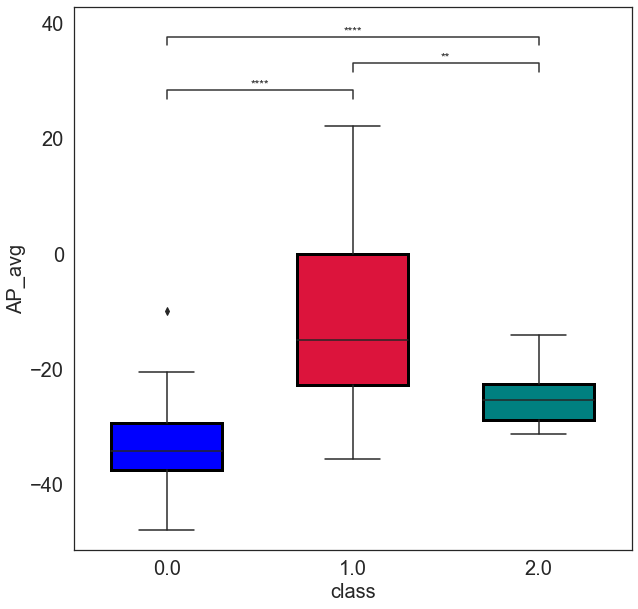

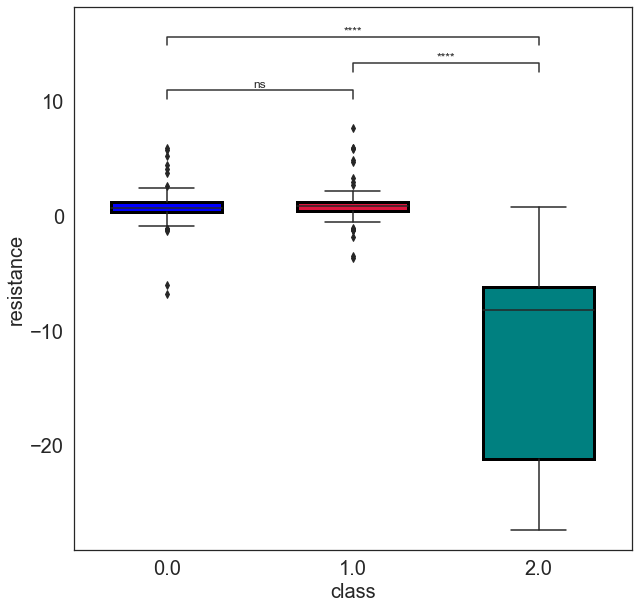

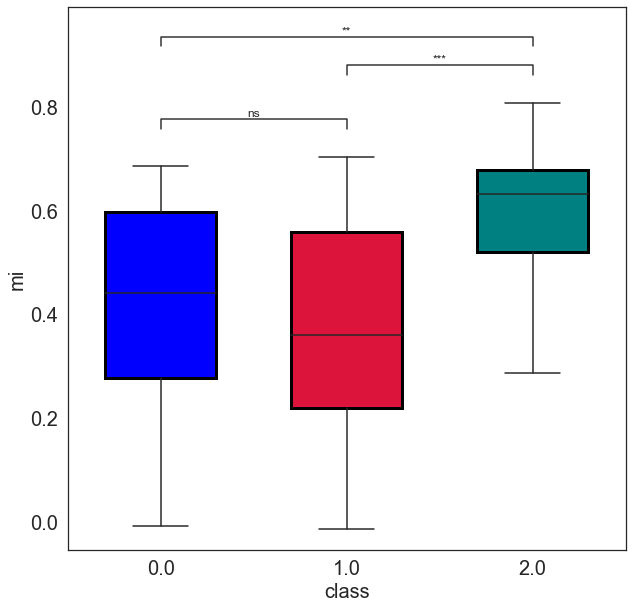

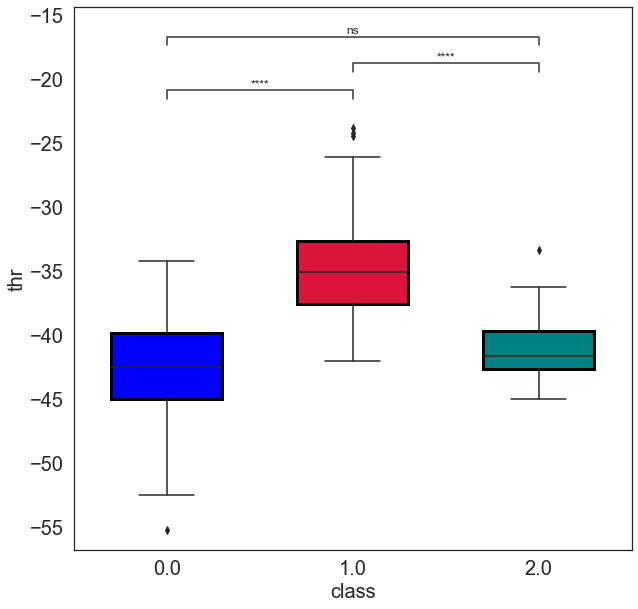

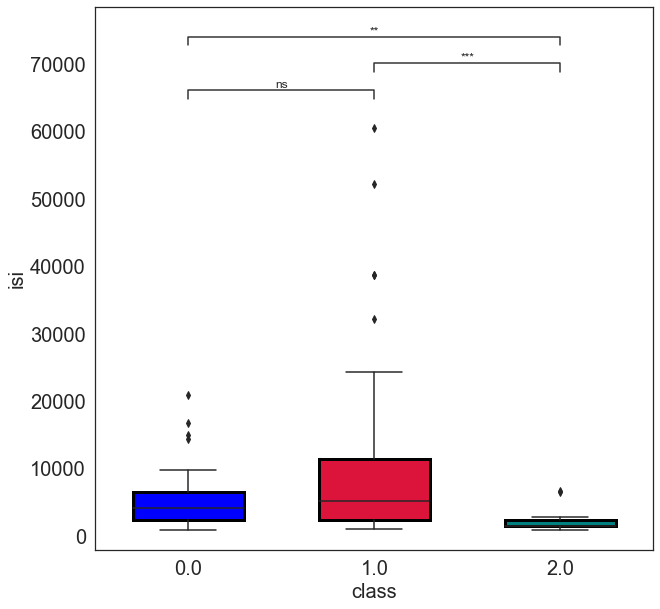

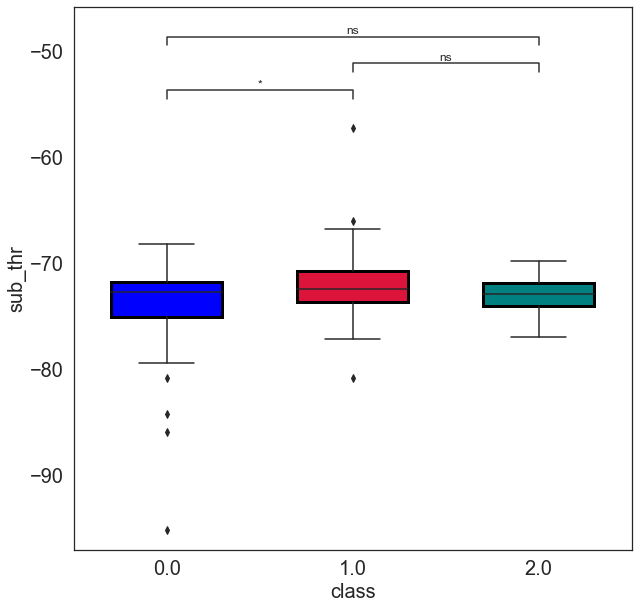

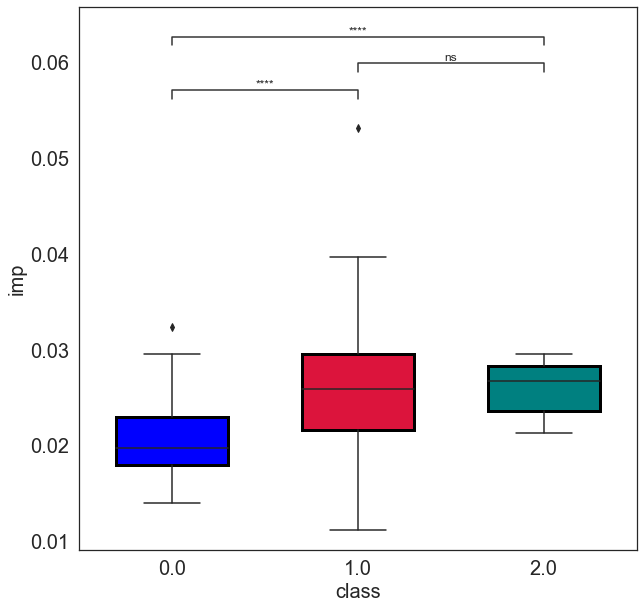

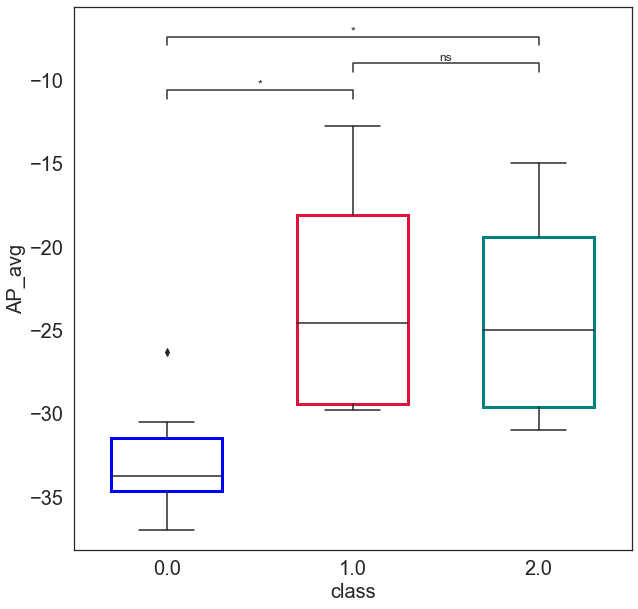

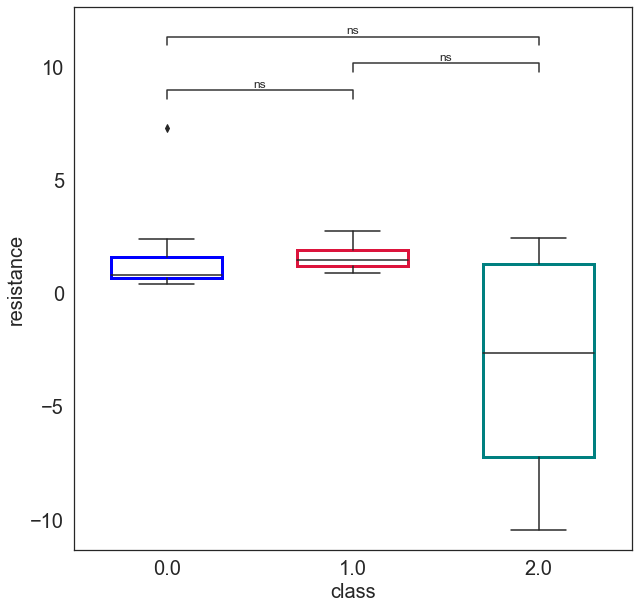

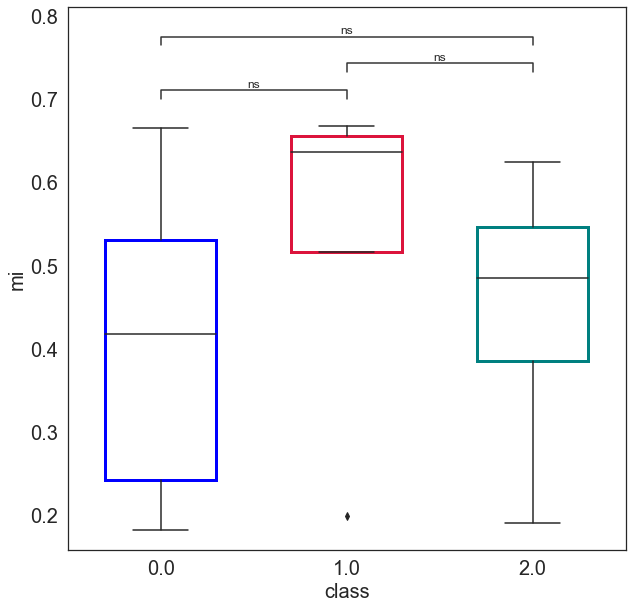

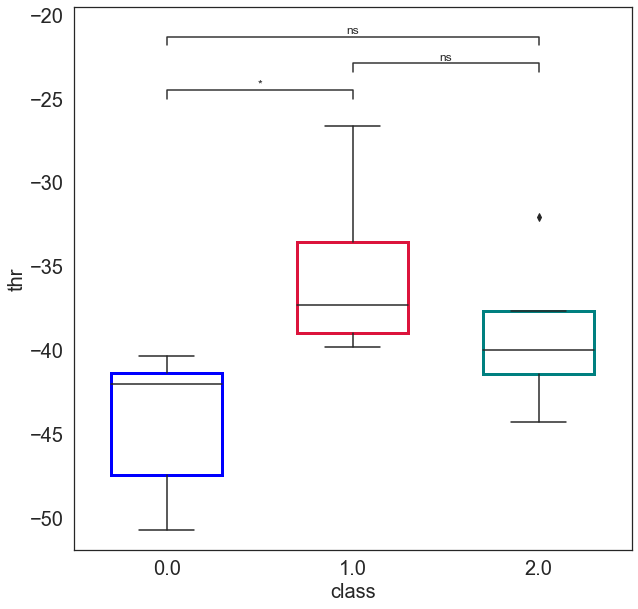

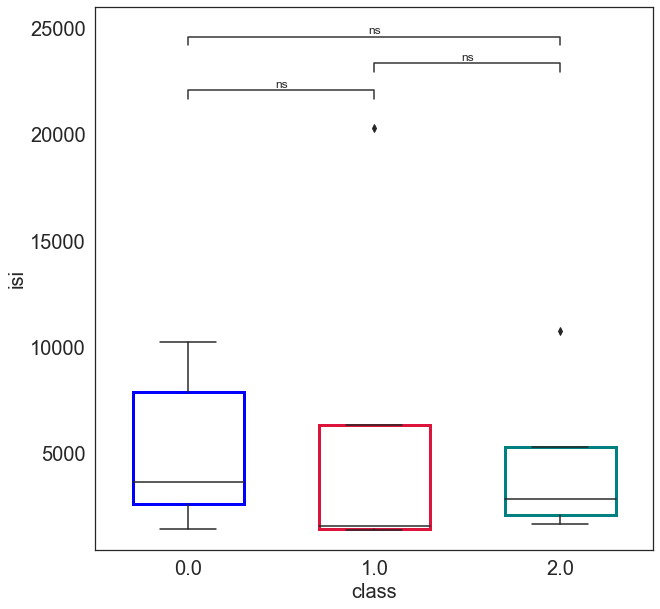

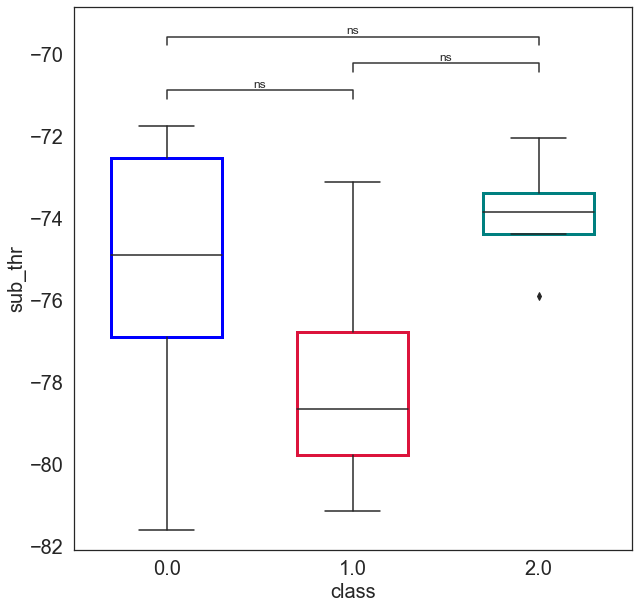

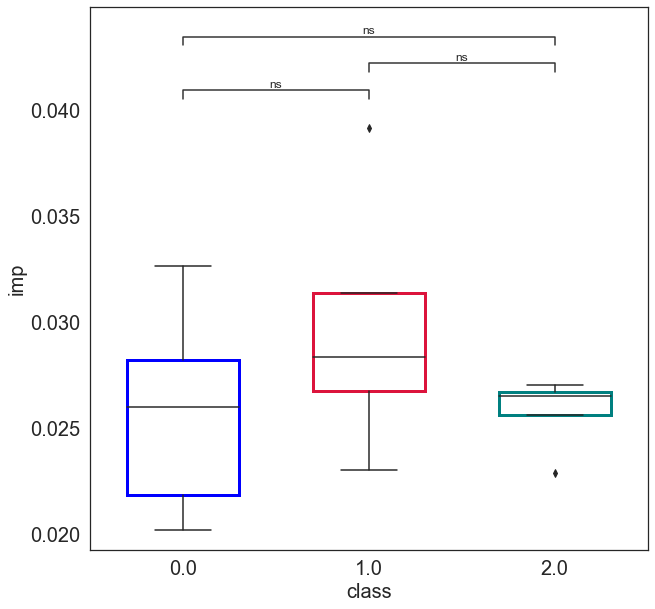

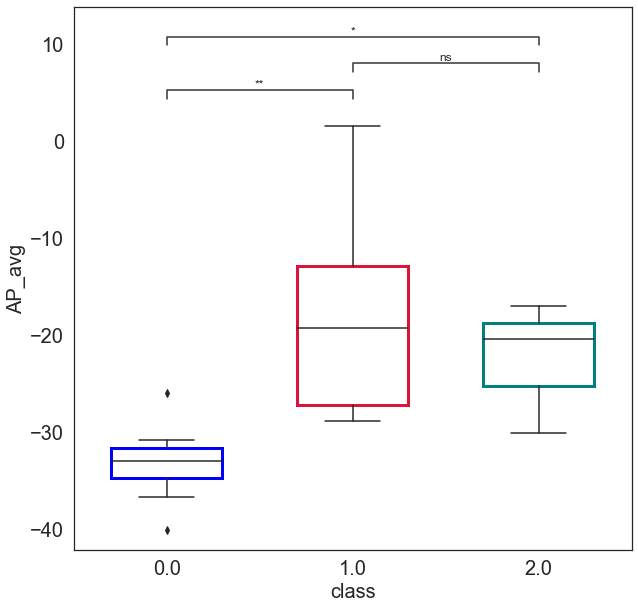

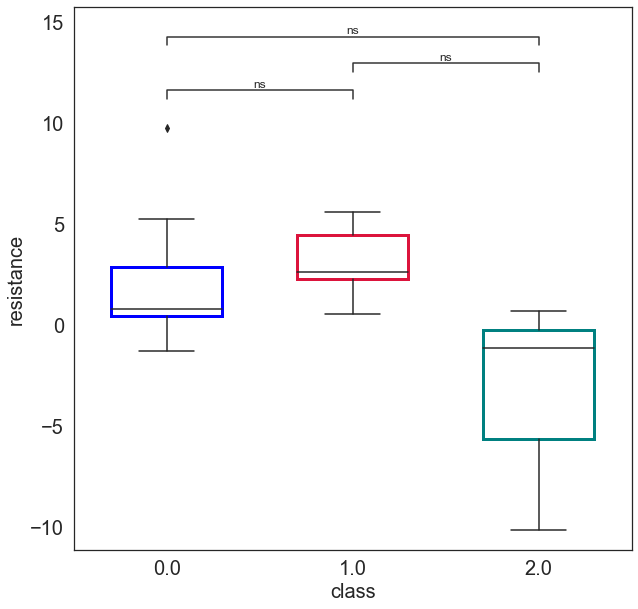

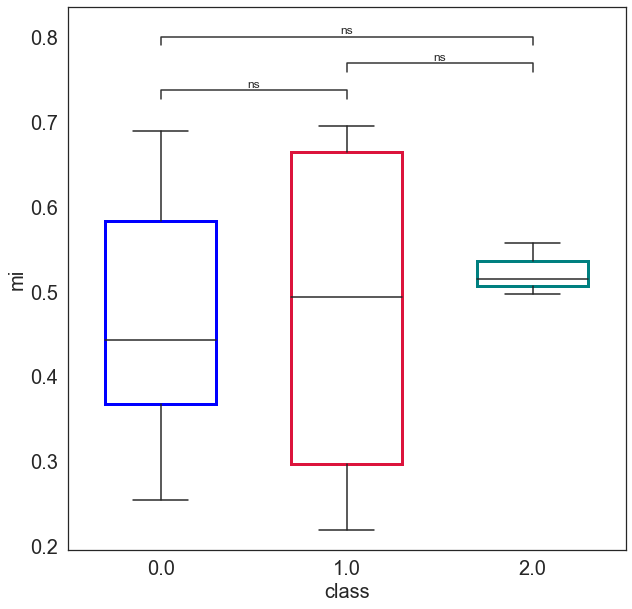

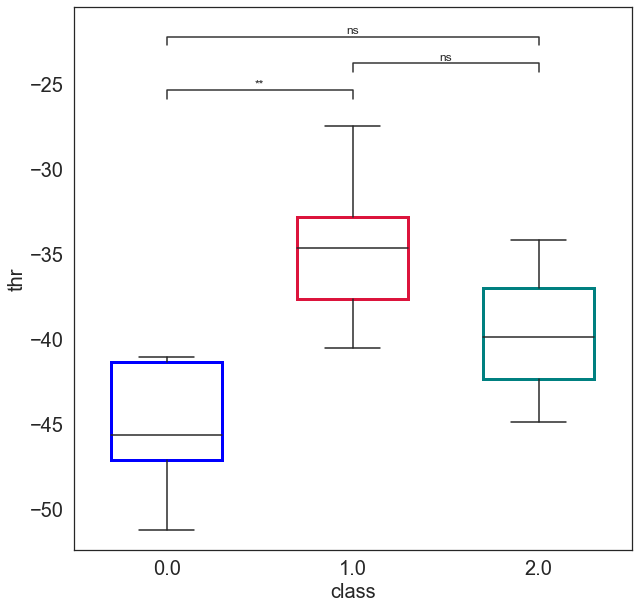

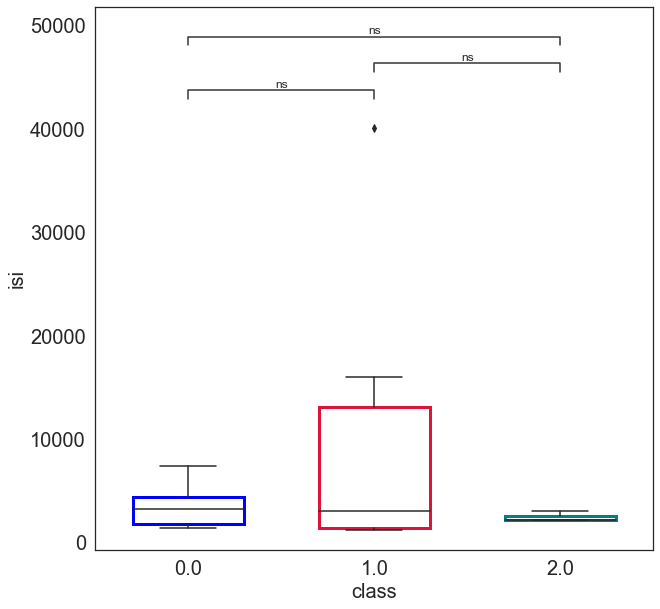

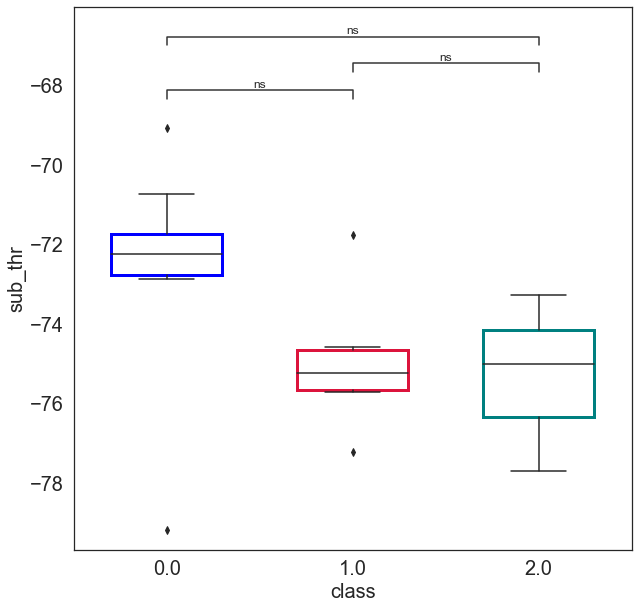

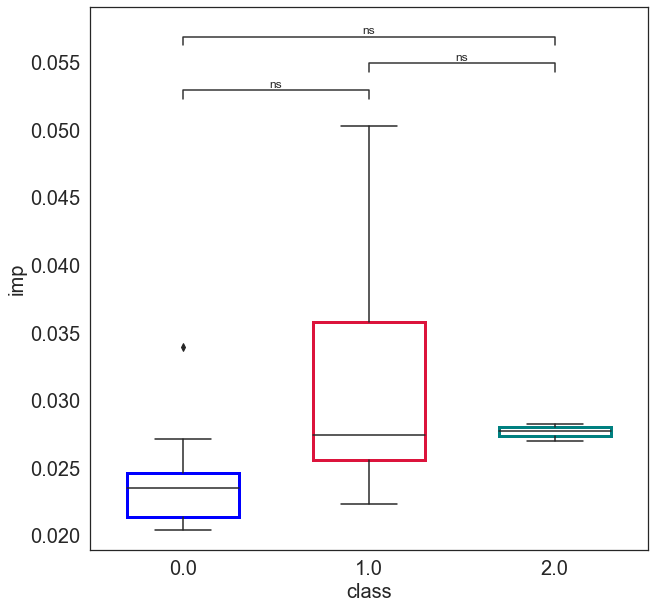

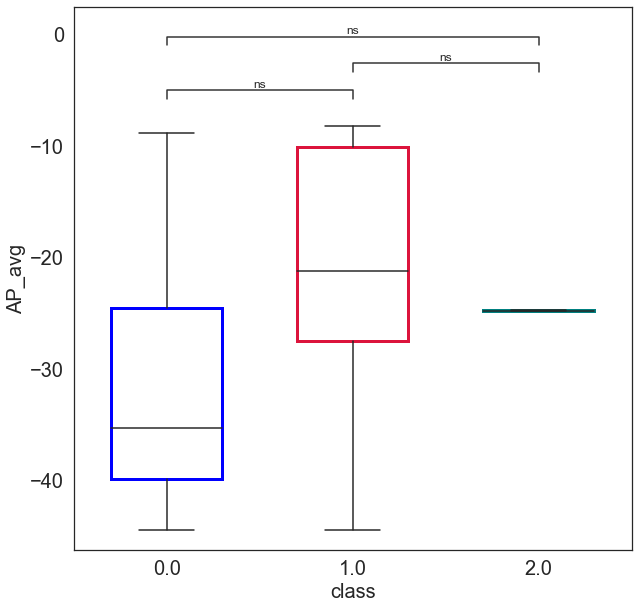

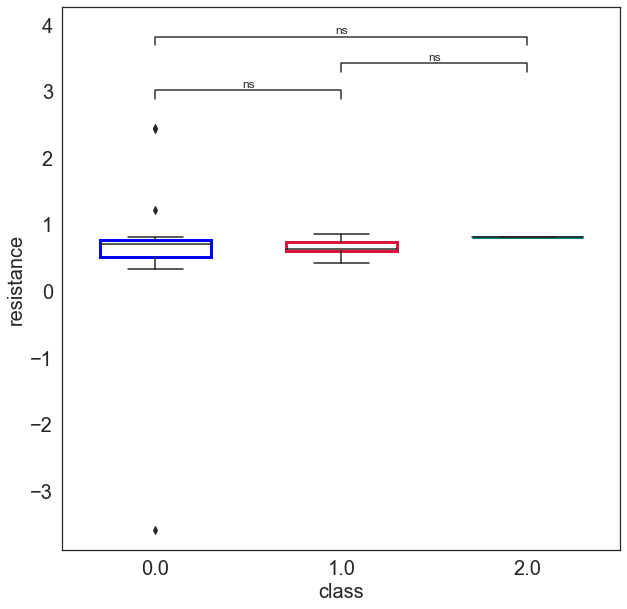

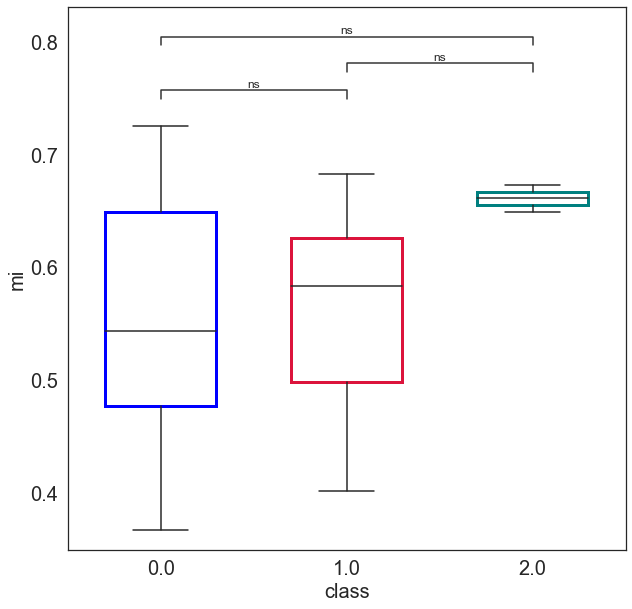

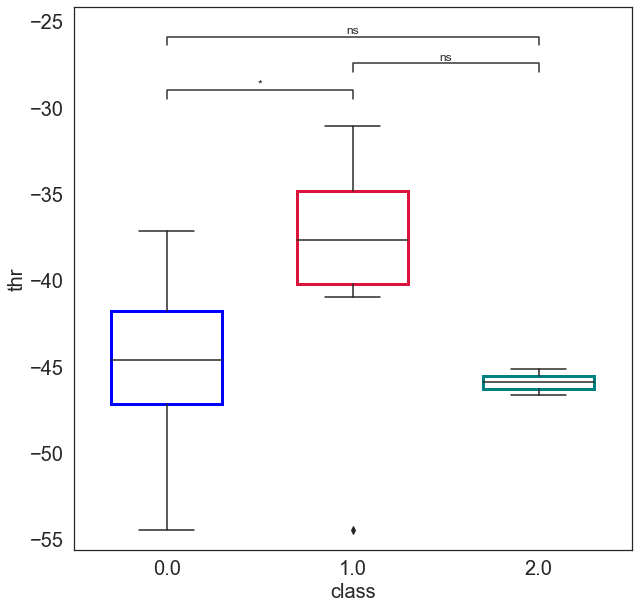

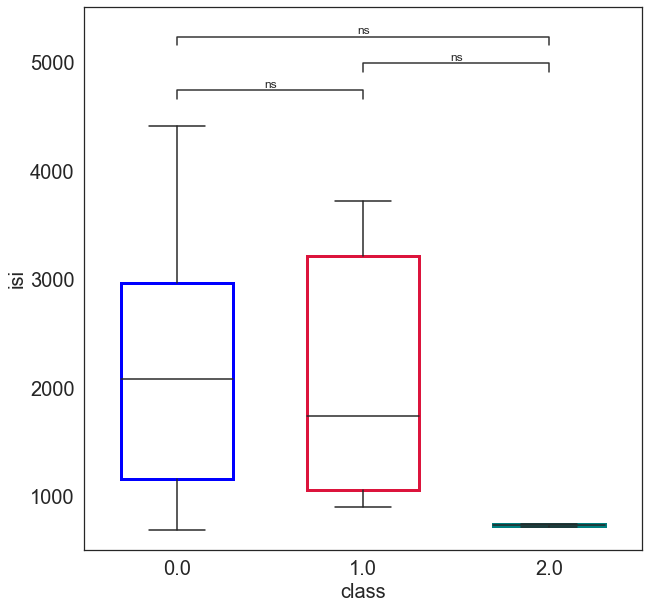

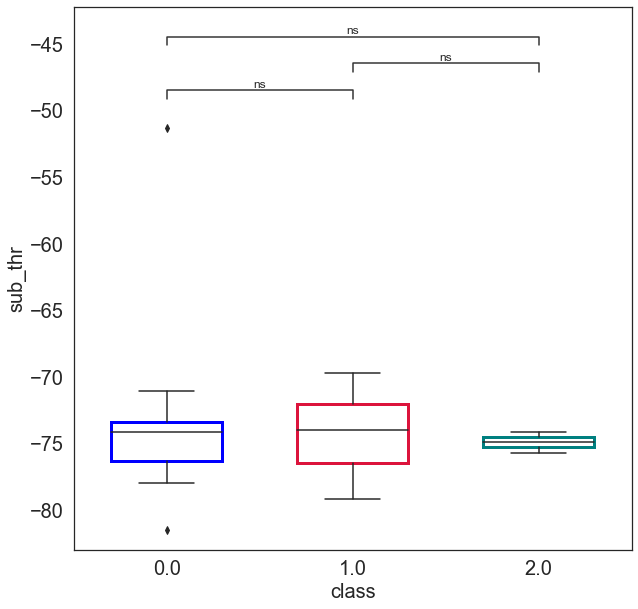

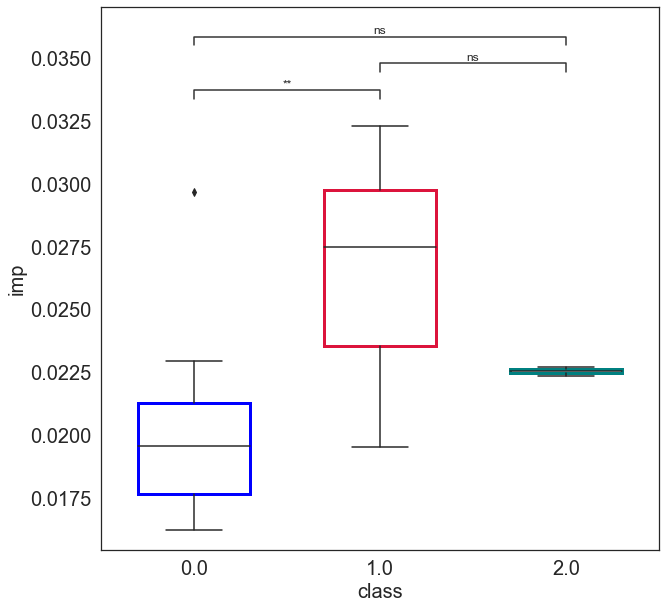

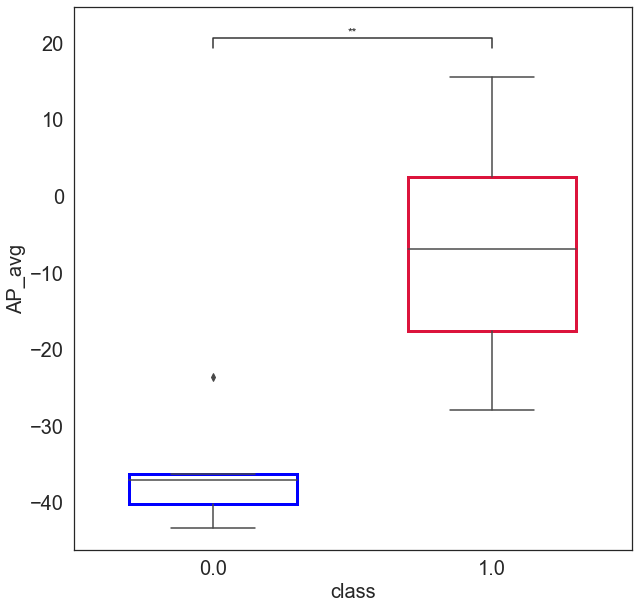

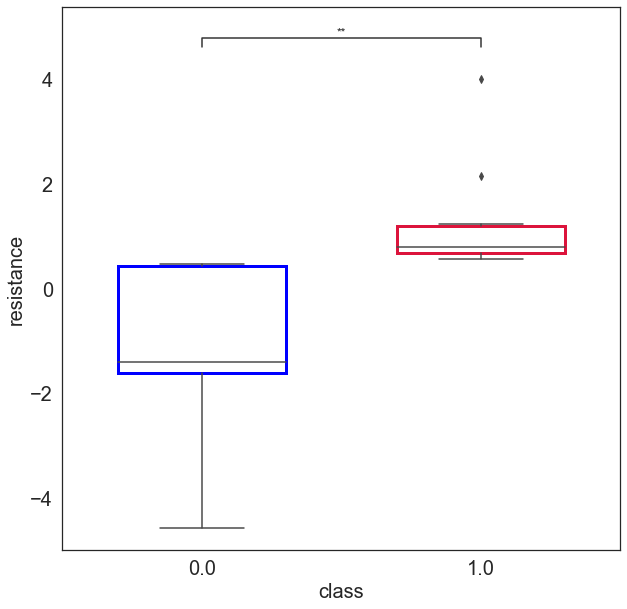

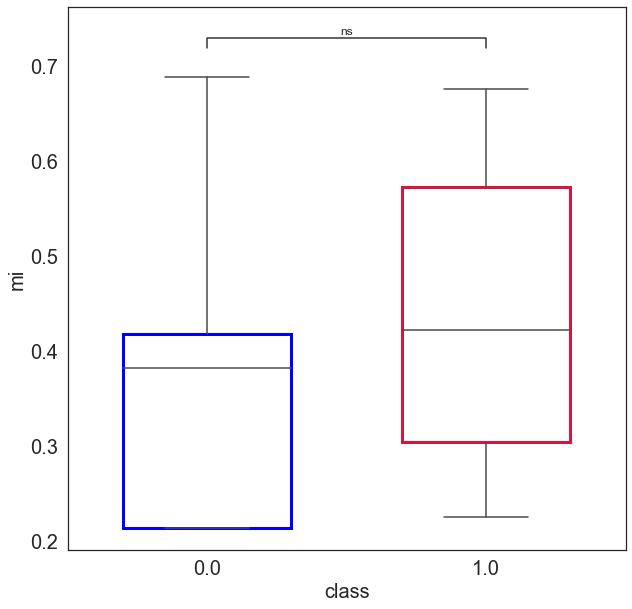

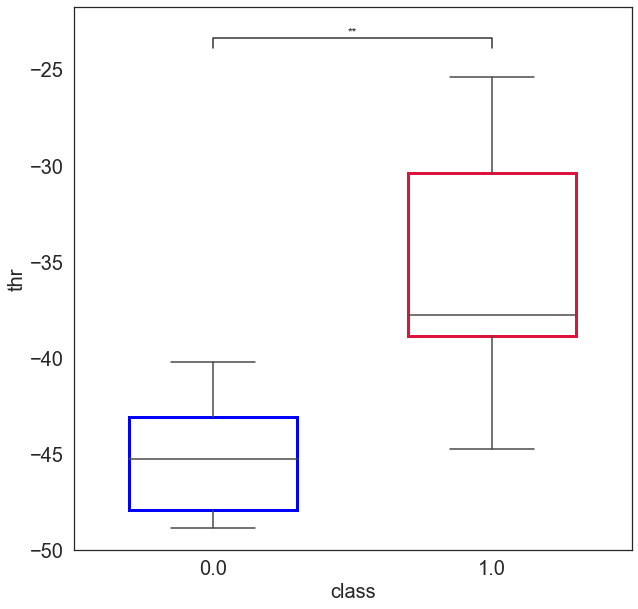

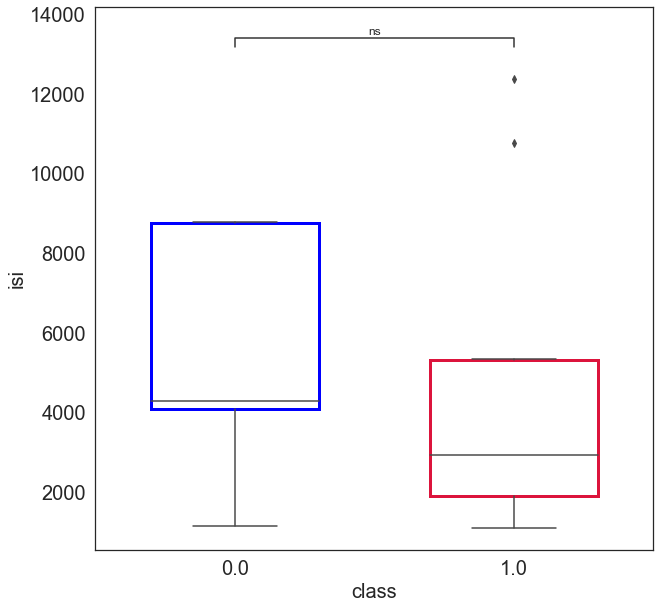

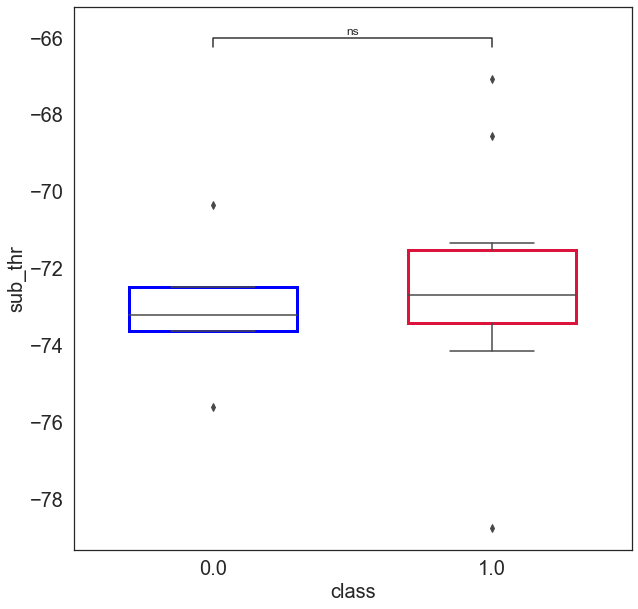

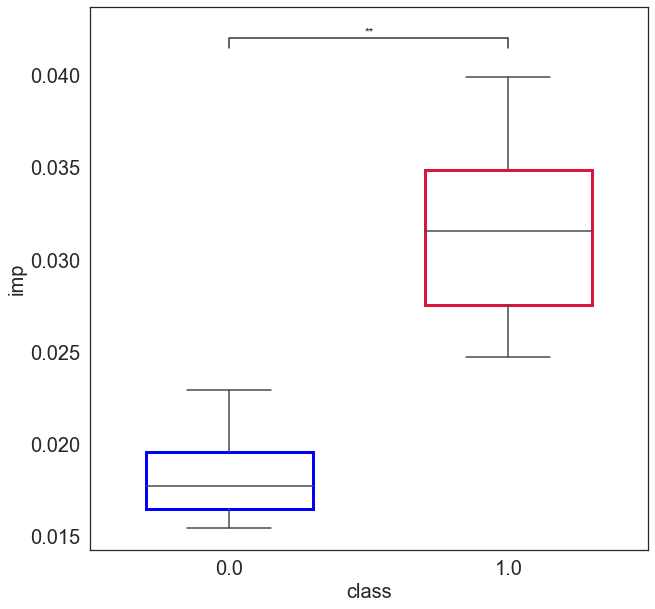

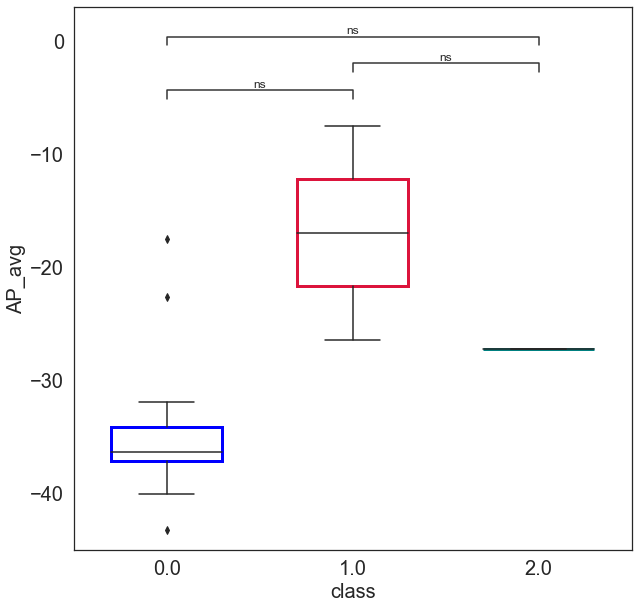

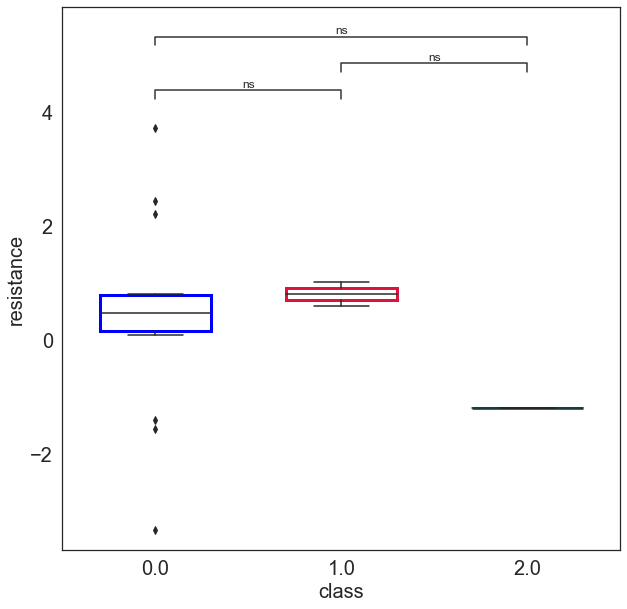

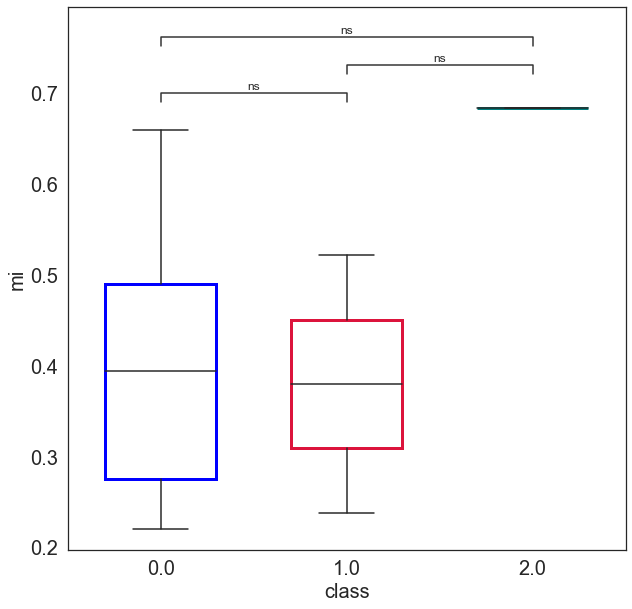

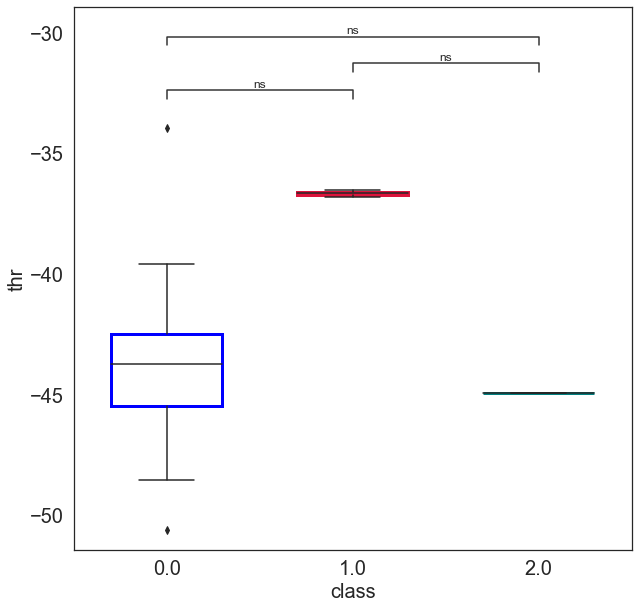

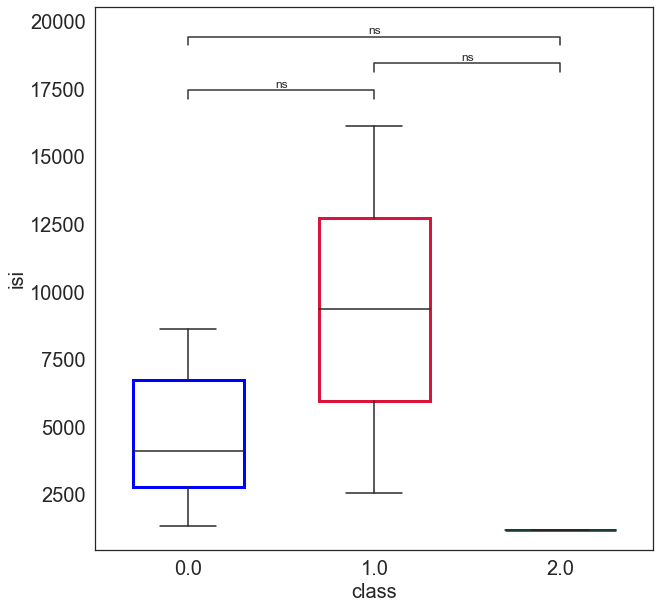

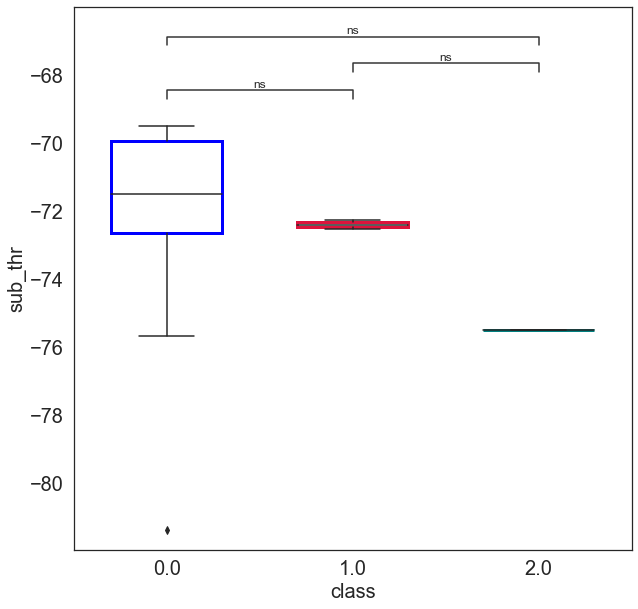

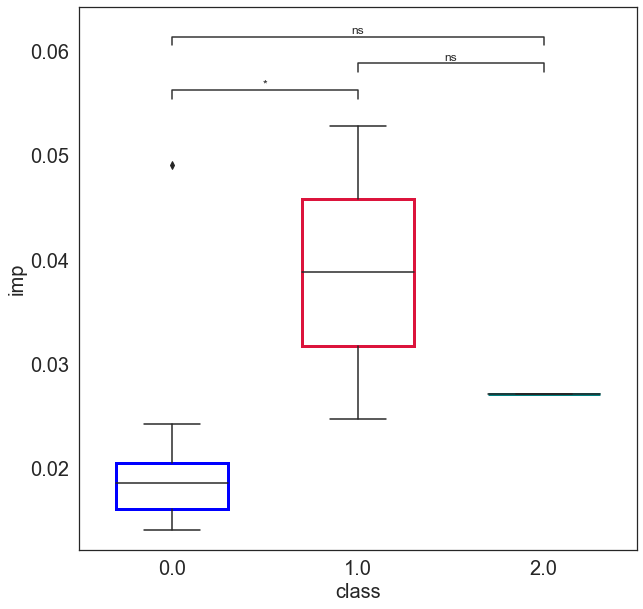

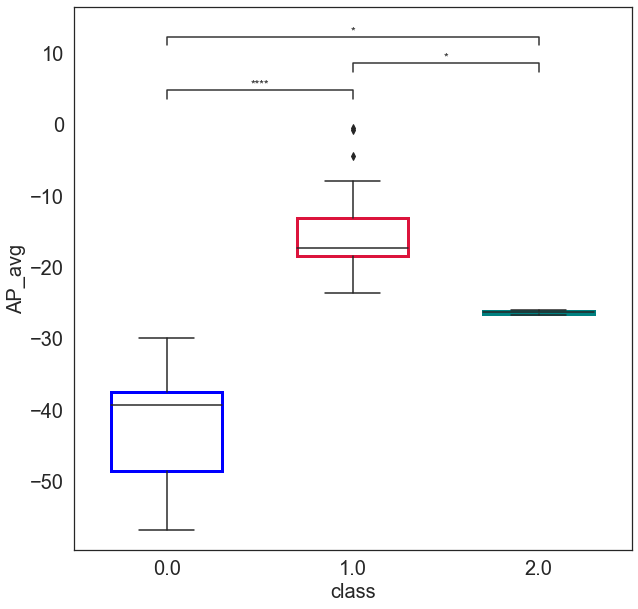

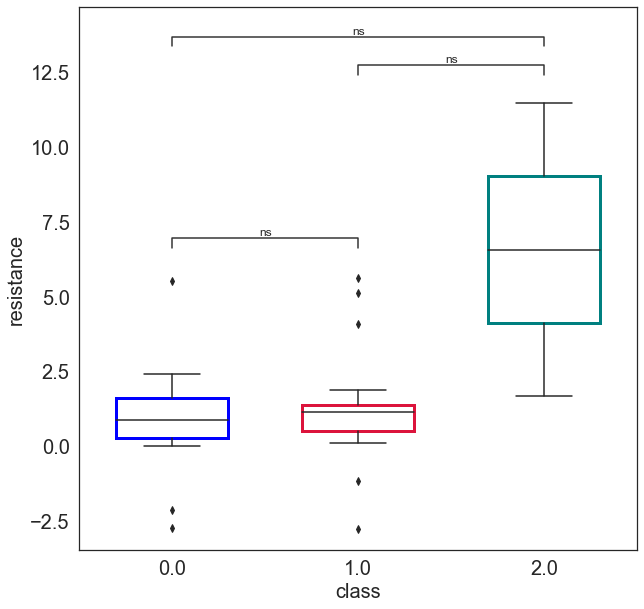

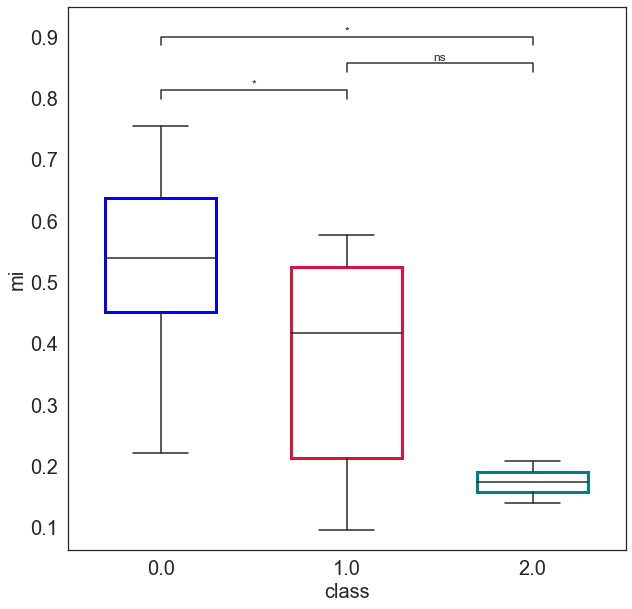

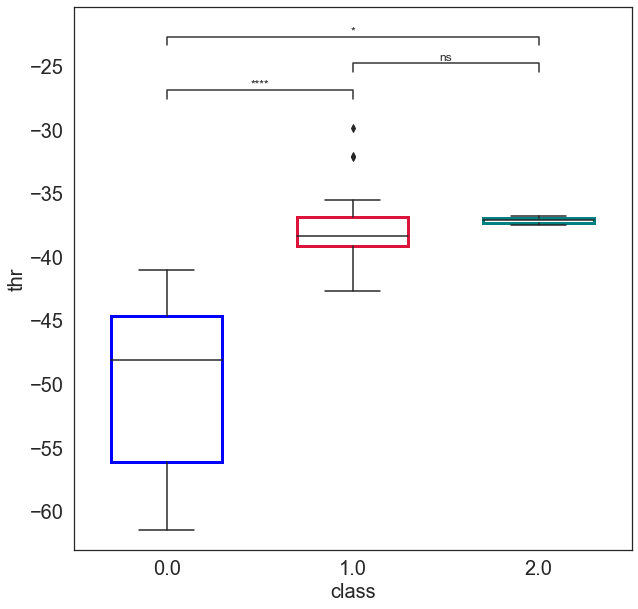

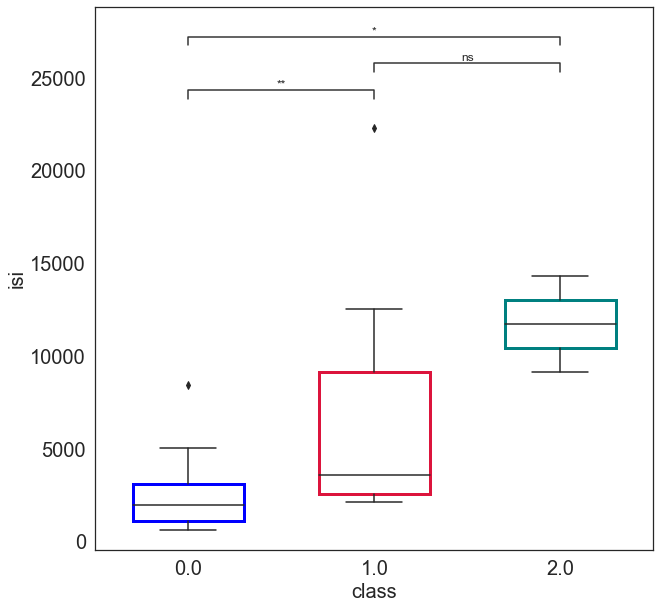

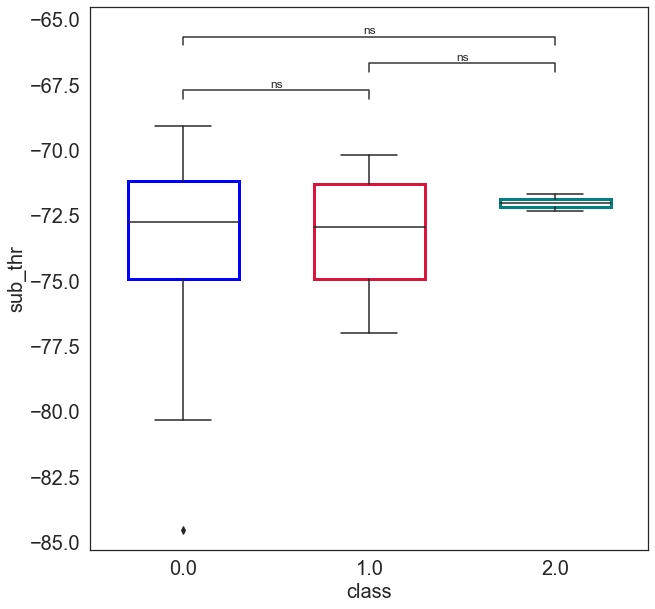

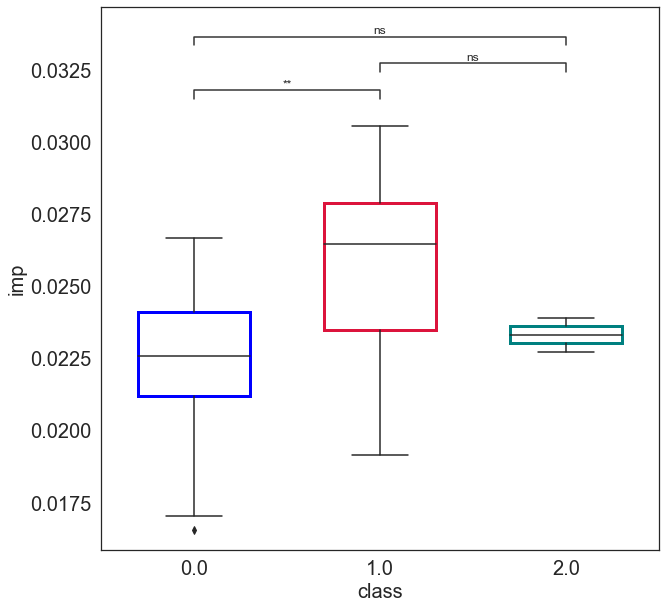

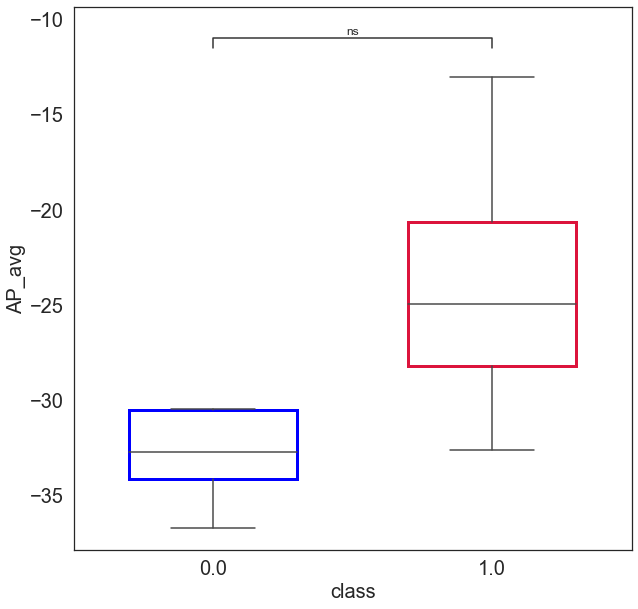

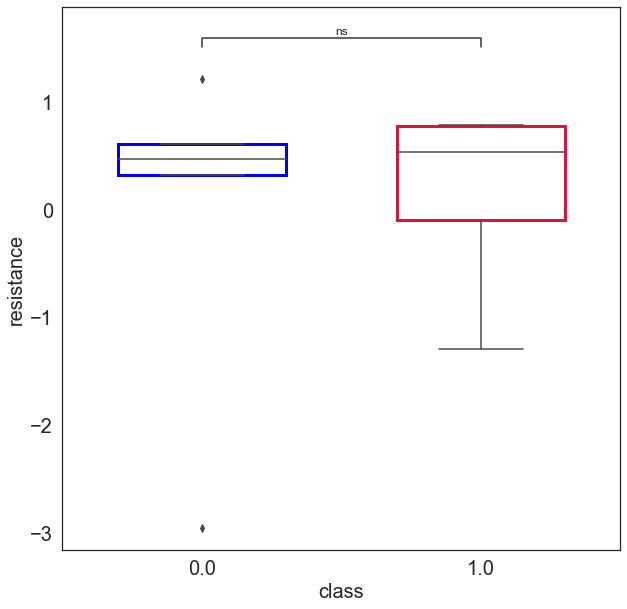

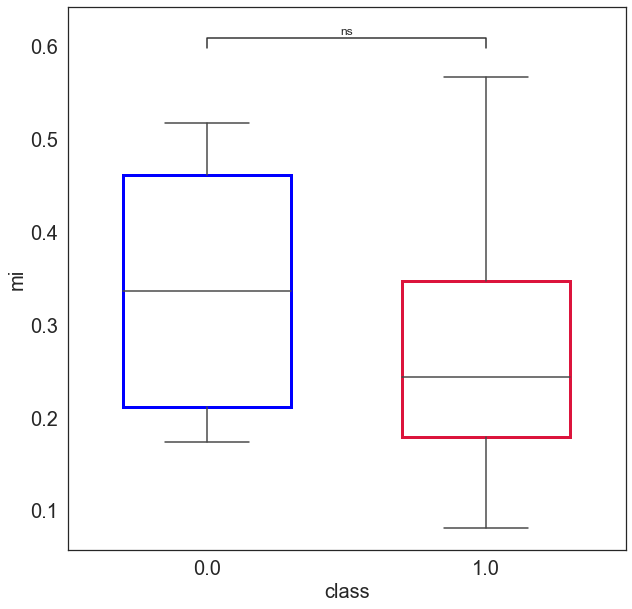

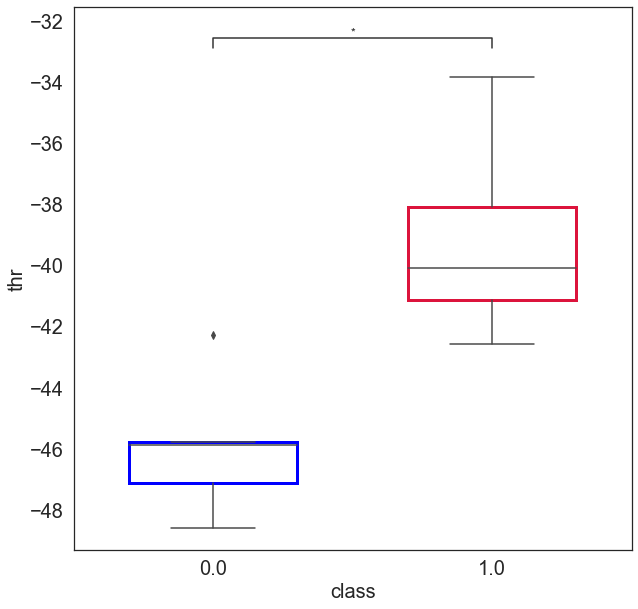

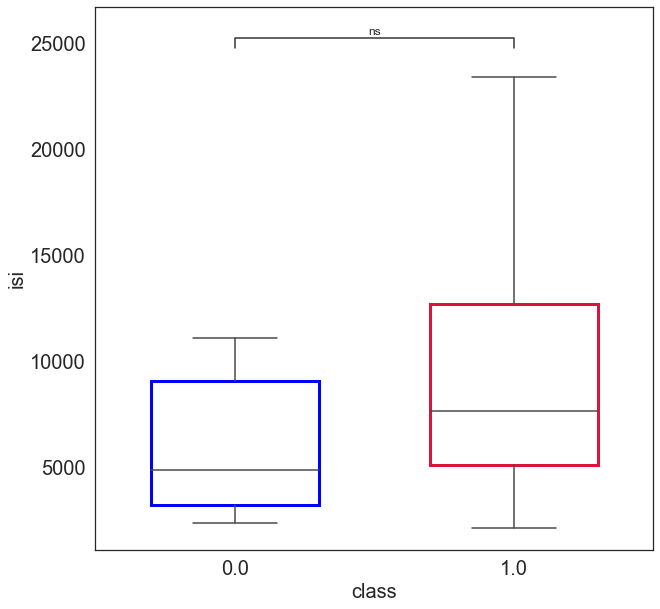

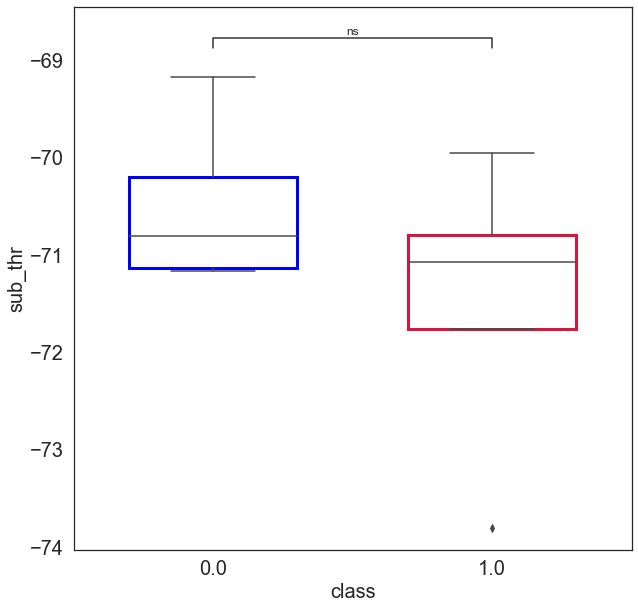

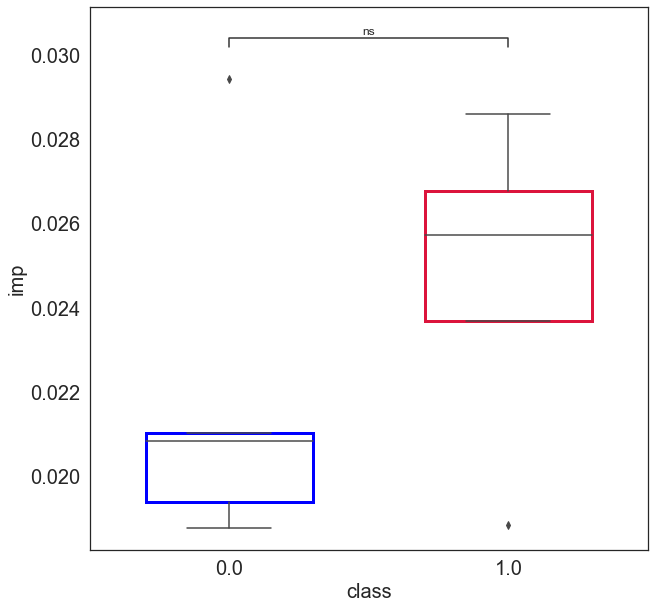

In [164]:
def plot_significance_new(data,var,hue,ax,palette='mako',drug=False,test ='Mann-Whitney'):


    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)

    boxes = sns.boxplot(data=data,
                x=hue,
                y=var,
                width=.6, 
                palette=palette,
                ax=ax)
                          
    # sns.stripplot(x=hue, y=var , data=data,
    #             size=3, color=".4", linewidth=0,ax=ax)
    ax.set_xlabel('class',fontdict={'fontsize':20})
    ax.set_ylabel(var,fontdict={'fontsize':20})

    for box,col in zip(boxes.patches,['blue','crimson','teal']):
        mybox1 = box

        # Change the appearance of that box
        if drug:
            mybox1.set_facecolor('white')
            mybox1.set_edgecolor(col)
        else:
            mybox1.set_facecolor(col)
            mybox1.set_edgecolor('black')

        mybox1.set_linewidth(3)

    pairs = np.unique(data[hue])
    pairs = [i for i in combinations(pairs,2)]


    annotator = Annotator(ax,pairs, data=data, x=hue,palette=palette, y=var)
    annotator.configure(test=test, text_format='star', loc='inside')
    annotator.apply_and_annotate()  
for cond in np.unique(df_inh_for_sig.cond):
    for val in ['AP_avg', 'resistance','mi', 'thr', 'isi', 'sub_thr','imp']:

        fig,ax = plt.subplots(1,1,figsize=[10,10])
        if cond == 'acsf':
            drug = False
        else:
            drug = True
        plot_significance_new(data = df_inh_for_sig[df_inh_for_sig.cond==cond],
        var = val,
        hue = 'class',
        ax = ax,
        drug = drug,
        palette = ['blue','crimson','teal'])
        plt.savefig('C:/Users/Nishant Joshi/Documents/DNM/'+val+'_'+cond+'_dist.png',dpi=200)


In [39]:
test_type = 'Mann-Whitney'
for cond_ in cond_exc[1:]:
        fig,ax = plt.subplots(2,4,figsize= [20,8])
        for i, var  in enumerate(['Vm_avg', 'resistance','mi', 'thr', 'isi', 'sub_thr','imp']):
                cond = cond_
                data_temp = df_exc_for_sig[df_exc_for_sig.cond.isin(['acsf',cond])]
                if i>=4:

                        sns.boxplot(data=data_temp,
                                        x='class',
                                        y= var,
                                        hue ='cond',ax=ax[1,i-4],palette='PuBuGn')
                                        # boxprops={"facecolor": (.2, .6, .8, .5)},
                                        # medianprops={"color": "red"})                         

                        pairs = np.unique(data_temp['class'])
                        pairs = [((0.0,"acsf"),(0.0,cond)),
                                ((1.0, "acsf" ),(1.0,cond))]


                        annotator = Annotator(ax[1,i-4],pairs, data=data_temp, x='class', y=var,hue='cond')
                        annotator.configure(test=test_type, text_format='star', loc='inside')
                        annotator.apply_and_annotate()  
                if i<4:

                        sns.boxplot(data=data_temp,
                                        x='class',
                                        y= var,
                                        hue ='cond',ax=ax[0,i],palette='PuBuGn')
                                        # boxprops={"facecolor": (.2, .6, .8, .5)},
                                        # medianprops={"color": "red"})                            

                        pairs = np.unique(data_temp['class'])
                        pairs = [((0.0,"acsf"),(0.0,cond)),
                                ((1.0, "acsf" ),(1.0,cond))]


                        annotator = Annotator(ax[0,i],pairs, data=data_temp, x='class', y=var,hue='cond')
                        annotator.configure(test=test_type, text_format='star', loc='inside')
                        annotator.apply_and_annotate()                          
        plt.show()

NameError: name 'cond_exc' is not defined

In [40]:
test_type = 'Mann-Whitney'
for cond_ in cond_inh[1:]:
        fig,ax = plt.subplots(2,4,figsize= [20,8])
        for i, var  in enumerate(['Vm_avg', 'resistance','mi', 'thr', 'isi', 'sub_thr','imp']):
                cond = cond_
                data_temp = df_inh_for_sig[df_inh_for_sig.cond.isin(['acsf',cond])]
                if i>=4:

                        sns.boxplot(data=data_temp,
                                        x='class',
                                        y= var,
                                        hue ='cond',ax=ax[1,i-4],palette='PuBuGn')
                                        # boxprops={"facecolor": (.2, .6, .8, .5)},
                                        # medianprops={"color": "red"})                         

                        pairs = np.unique(data_temp['class'])
                        pairs = [((0.0,"acsf"),(0.0,cond)),
                                ((1.0, "acsf" ),(1.0,cond)),
                                ((2.0, "acsf" ),(2.0,cond))]


                        annotator = Annotator(ax[1,i-4],pairs, data=data_temp, x='class', y=var,hue='cond')
                        annotator.configure(test=test_type, text_format='star', loc='inside')
                        annotator.apply_and_annotate()  
                if i<4:

                        sns.boxplot(data=data_temp,
                                        x='class',
                                        y= var,
                                        hue ='cond',ax=ax[0,i],palette='PuBuGn')
                                        # boxprops={"facecolor": (.2, .6, .8, .5)},
                                        # medianprops={"color": "red"})                            

                        pairs = np.unique(data_temp['class'])
                        pairs = [((0.0,"acsf"),(0.0,cond)),
                                ((1.0, "acsf" ),(1.0,cond)),
                                ((2.0, "acsf" ),(2.0,cond))]

                        annotator = Annotator(ax[0,i],pairs, data=data_temp, x='class', y=var,hue='cond')
                        annotator.configure(test=test_type, text_format='star', loc='inside')
                        annotator.apply_and_annotate()                          
        plt.show()

NameError: name 'cond_inh' is not defined

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\paxplot\core.py:842: Warning: The function you have called (set_figheight) is not officially supported by Paxplot, but it may still work. Report issues to https://github.com/kravitsjacob/paxplot/issues
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\paxplot\core.py:842: Warning: The function you have called (set_figwidth) is not officially supported by Paxplot, but it may still work. Report issues to https://github.com/kravitsjacob/paxplot/issues


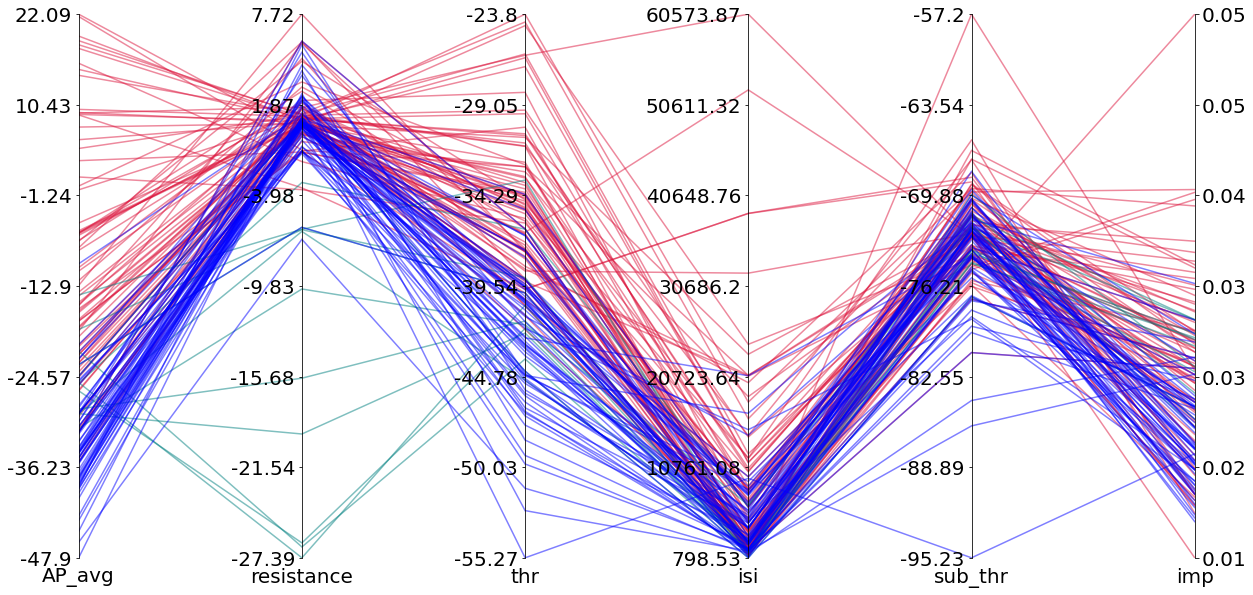

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import paxplot
from scipy import stats

# Import data
df = df_inh_for_sig[['AP_avg', 'resistance', 'thr', 'isi', 'sub_thr','imp','class','cond']]
df[['AP_avg', 'resistance', 'thr', 'isi', 'sub_thr','imp']] = df[['AP_avg', 'resistance', 'thr', 'isi', 'sub_thr','imp']]
df = df[df.cond=='acsf']
df_acsf_1= df[df['class']==0][['AP_avg', 'resistance', 'thr', 'isi', 'sub_thr','imp']]
df_acsf_2= df[df['class']==1][['AP_avg', 'resistance', 'thr', 'isi', 'sub_thr','imp']]
df_acsf_3= df[df['class']==2][['AP_avg', 'resistance', 'thr', 'isi', 'sub_thr','imp']]
cols = df.columns[:-2]
# Create figure
paxfig = paxplot.pax_parallel(n_axes=len(cols))
paxfig.set_figheight(10)
paxfig.set_figwidth(20)

paxfig.plot(
    df_acsf_1.to_numpy(), #stats.zscore(df_acsf_1.to_numpy())
    line_kwargs={'alpha': 0.5, 'color': 'blue', 'zorder': 1}
)

# Add grey data
paxfig.plot(
    df_acsf_2.to_numpy(), #stats.zscore(df_acsf_2.to_numpy())    
    line_kwargs={'alpha': 0.5, 'color': 'crimson', 'zorder': 0}
)

paxfig.plot(
    df_acsf_3.to_numpy(), #stats.zscore(df_acsf_3.to_numpy())    
    line_kwargs={'alpha': 0.5, 'color': 'teal', 'zorder': 0}
)
for  ax in paxfig.axes:   
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)
# Add labels
paxfig.set_labels(cols)
plt.savefig('C:/Users/Nishant Joshi/Documents/DNM/paralell_plot_all_acsf.png',dpi=200)

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\paxplot\core.py:842: Warning: The function you have called (set_figheight) is not officially supported by Paxplot, but it may still work. Report issues to https://github.com/kravitsjacob/paxplot/issues
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\paxplot\core.py:842: Warning: The function you have called (set_figwidth) is not officially supported by Paxplot, but it may still work. Report issues to https://github.com/kravitsjacob/paxplot/issues


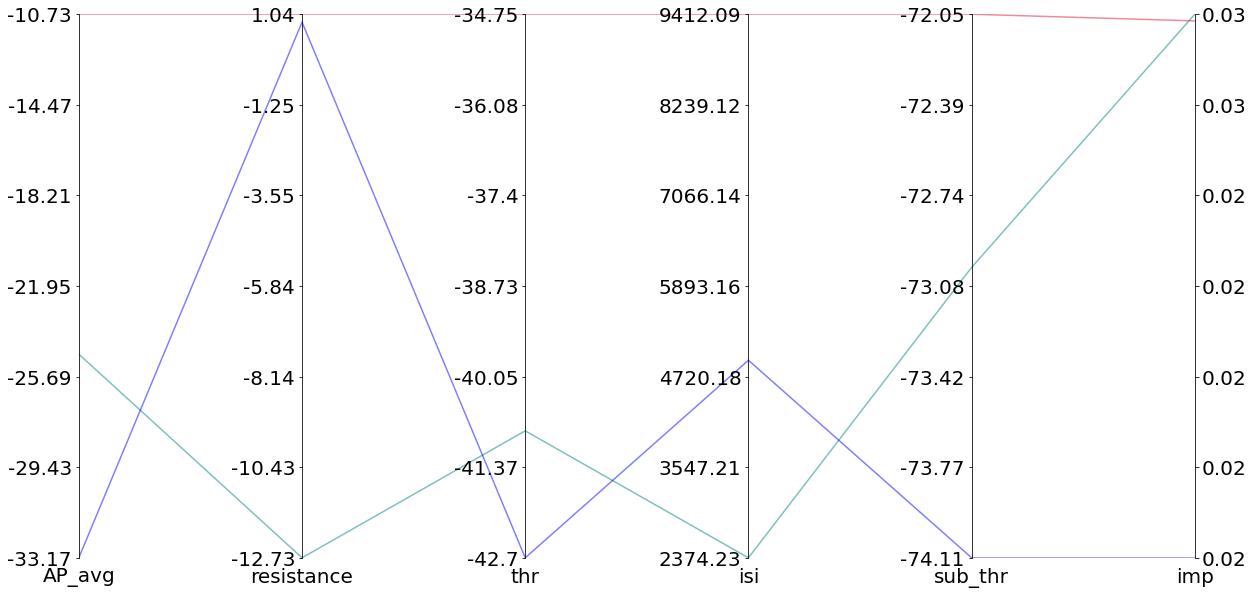

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import paxplot
from scipy import stats

# Import data
df = df_inh_for_sig[['AP_avg', 'resistance', 'thr', 'isi', 'sub_thr','imp','class','cond']]
df[['AP_avg', 'resistance', 'thr', 'isi', 'sub_thr','imp']] = df[['AP_avg', 'resistance', 'thr', 'isi', 'sub_thr','imp']]
df = df[df.cond=='acsf']
df_acsf_1= df[df['class']==0][['AP_avg', 'resistance', 'thr', 'isi', 'sub_thr','imp']]
df_acsf_2= df[df['class']==1][['AP_avg', 'resistance', 'thr', 'isi', 'sub_thr','imp']]
df_acsf_3= df[df['class']==2][['AP_avg', 'resistance', 'thr', 'isi', 'sub_thr','imp']]
cols = df.columns[:-2]
# Create figure
paxfig = paxplot.pax_parallel(n_axes=len(cols))
paxfig.set_figheight(10)
paxfig.set_figwidth(20)

paxfig.plot(
    [np.mean(df_acsf_1.to_numpy(),axis=0)], #stats.zscore(df_acsf_1.to_numpy())
    line_kwargs={'alpha': 0.5, 'color': 'blue', 'zorder': 1}
)

# Add grey data
paxfig.plot(
    [np.mean(df_acsf_2.to_numpy(),axis=0)], #stats.zscore(df_acsf_2.to_numpy())    
    line_kwargs={'alpha': 0.5, 'color': 'crimson', 'zorder': 0}
)

paxfig.plot(
    [np.mean(df_acsf_3.to_numpy(),axis=0)], #stats.zscore(df_acsf_3.to_numpy())    
    line_kwargs={'alpha': 0.5, 'color': 'teal', 'zorder': 0}
)
for  ax in paxfig.axes:   
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)
# Add labels
paxfig.set_labels(cols)
plt.savefig('C:/Users/Nishant Joshi/Documents/DNM/paralell_plot_mean.png',dpi=200)

In [177]:
np.unique(df_inh_for_sig.cond)

array(['acsf', 'agoanta', 'cirazoline', 'd1ago', 'd2', 'dopamine', 'm1',
       'sag'], dtype=object)

<ipython-input-178-1eaa020b893e>:72: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
<ipython-input-178-1eaa020b893e>:75: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1.0_acsf vs. 1.0_dopamine: t-test independent samples, P_val:5.823e-01 t=5.523e-01
0.0_acsf vs. 0.0_dopamine: t-test independent samples, P_val:4.849e-01 t=7.019e-01
2.0_acsf vs. 2.0_dopamine: t-test independent samples, P_val:nan t=nan


<ipython-input-178-1eaa020b893e>:72: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
<ipython-input-178-1eaa020b893e>:75: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1.0_acsf vs. 1.0_dopamine: t-test independent samples, P_val:8.563e-01 t=1.817e-01
0.0_acsf vs. 0.0_dopamine: t-test independent samples, P_val:4.758e-01 t=7.166e-01
2.0_acsf vs. 2.0_dopamine: t-test independent samples, P_val:nan t=nan


<ipython-input-178-1eaa020b893e>:72: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
<ipython-input-178-1eaa020b893e>:75: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1.0_acsf vs. 1.0_dopamine: t-test independent samples, P_val:9.703e-01 t=-3.740e-02
0.0_acsf vs. 0.0_dopamine: t-test independent samples, P_val:5.415e-01 t=6.133e-01
2.0_acsf vs. 2.0_dopamine: t-test independent samples, P_val:nan t=nan


<ipython-input-178-1eaa020b893e>:72: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
<ipython-input-178-1eaa020b893e>:75: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1.0_acsf vs. 1.0_dopamine: t-test independent samples, P_val:5.322e-01 t=6.275e-01
0.0_acsf vs. 0.0_dopamine: t-test independent samples, P_val:4.253e-01 t=8.015e-01
2.0_acsf vs. 2.0_dopamine: t-test independent samples, P_val:nan t=nan


<ipython-input-178-1eaa020b893e>:72: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
<ipython-input-178-1eaa020b893e>:75: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1.0_acsf vs. 1.0_dopamine: t-test independent samples, P_val:9.933e-01 t=8.392e-03
0.0_acsf vs. 0.0_dopamine: t-test independent samples, P_val:8.049e-01 t=2.479e-01
2.0_acsf vs. 2.0_dopamine: t-test independent samples, P_val:nan t=nan


<ipython-input-178-1eaa020b893e>:72: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
<ipython-input-178-1eaa020b893e>:75: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1.0_acsf vs. 1.0_dopamine: t-test independent samples, P_val:8.687e-01 t=1.658e-01
0.0_acsf vs. 0.0_dopamine: t-test independent samples, P_val:1.053e-01 t=-1.639e+00
2.0_acsf vs. 2.0_dopamine: t-test independent samples, P_val:nan t=nan


<ipython-input-178-1eaa020b893e>:72: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
<ipython-input-178-1eaa020b893e>:75: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1.0_acsf vs. 1.0_dopamine: t-test independent samples, P_val:1.851e-02 t=-2.406e+00
0.0_acsf vs. 0.0_dopamine: t-test independent samples, P_val:9.683e-01 t=3.991e-02
2.0_acsf vs. 2.0_dopamine: t-test independent samples, P_val:nan t=nan


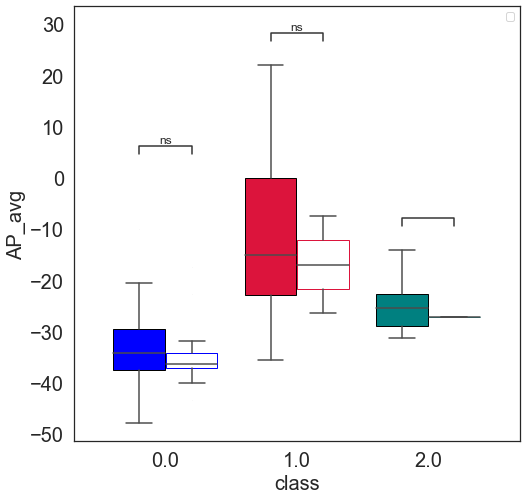

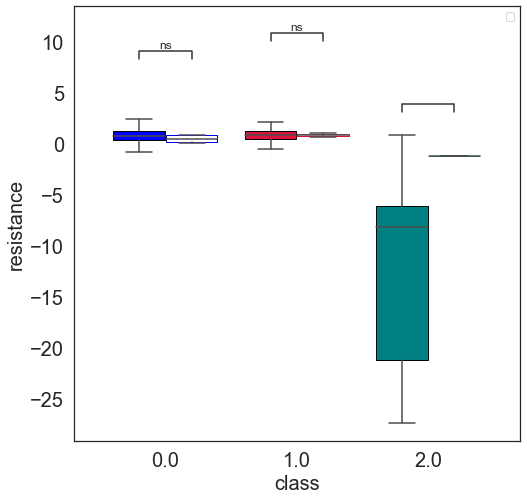

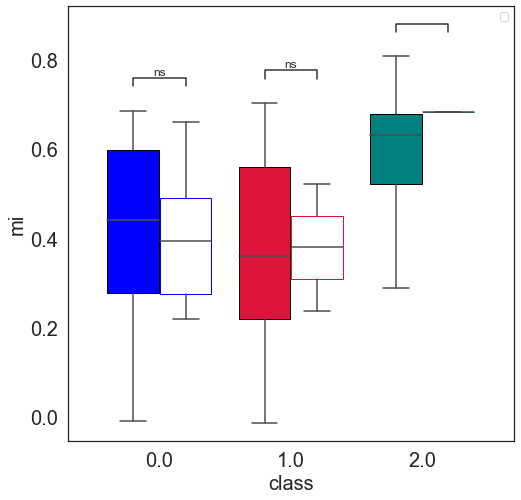

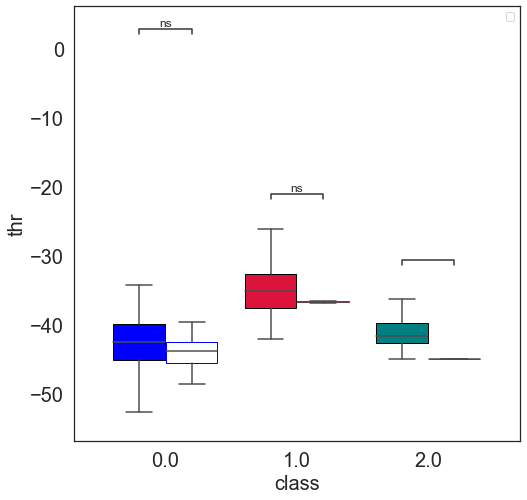

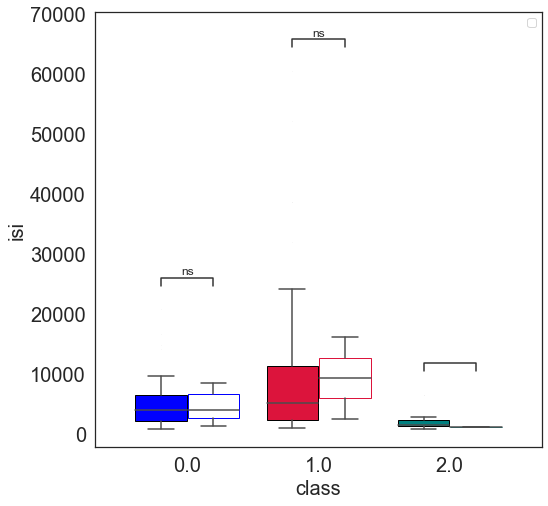

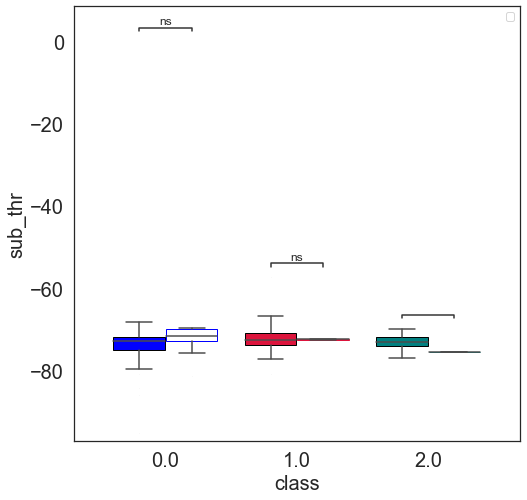

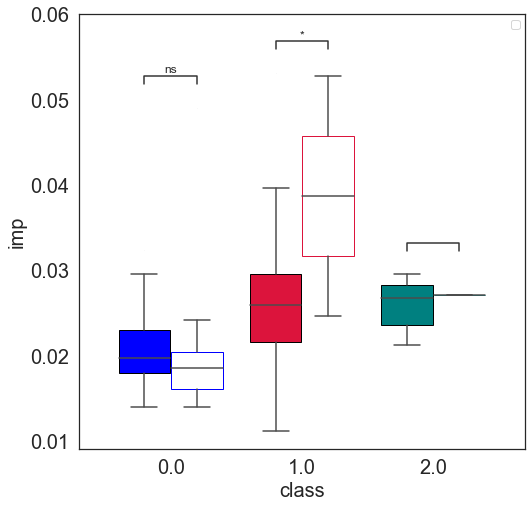

In [178]:
test_type = 't-test_ind'
# for cond in np.unique(df_inh_for_sig.cond):
cond = 'dopamine'
for i, var  in enumerate(['AP_avg', 'resistance','mi', 'thr', 'isi', 'sub_thr','imp']):
        fig,ax = plt.subplots(1,1,figsize= [8,8])
        
        data_temp = df_inh_for_sig[df_inh_for_sig.cond.isin(['acsf',cond])]
        # data_temp = df_inh_for_sig[df_inh_for_sig.cond =='m1']
        flierprops = dict(markerfacecolor='0.75', markersize=0.01,
                linestyle='none')
        # ax = sns.boxplot(data=phenotype_info_merge, orient="h", y="primary disease or tissue", x='value', hue='SampleType',
        #          order=sorted_pairs,palette=choosed_color,flierprops=flierprops,hue_order=choosed_sample_sites) # 
        # my_pal = {"versicolor": "g", "setosa": "b", "virginica":"m"}
        boxes = sns.boxplot(data=data_temp,
                        x='class',
                        y= var,
                        hue ='cond',
                        # palette = ['purple','crimson','teal','teal'],
                        ax=ax,
                        # palette=choosed_color,
                        flierprops=flierprops,)
                        # hue_order=choosed_sample_sites)
        ax.set_xlabel('class',fontdict={'fontsize':20})
        ax.set_ylabel(var,fontdict={'fontsize':20})


        mybox1 = boxes.patches[1]

        # Change the appearance of that box
        mybox1.set_facecolor('blue')
        mybox1.set_edgecolor('black')
        mybox1.set_linewidth(1)

        mybox1_m1 = boxes.patches[3]

        # Change the appearance of that box
        mybox1_m1.set_facecolor('white')
        mybox1_m1.set_edgecolor('blue')
        mybox1_m1.set_linewidth(1)

        mybox2 = boxes.patches[4]

        # Change the appearance of that box
        mybox2.set_facecolor('crimson')
        mybox2.set_edgecolor('black')
        mybox2.set_linewidth(1)

        mybox2_m1 = boxes.patches[5]

        # Change the appearance of that box
        mybox2_m1.set_facecolor('white')
        mybox2_m1.set_edgecolor('crimson')
        mybox2_m1.set_linewidth(1)

        mybox3 = boxes.patches[6]

        # Change the appearance of that box
        mybox3.set_facecolor('teal')
        mybox3.set_edgecolor('black')
        mybox3.set_linewidth(1)

        mybox3_m1 = boxes.patches[7]

        # Change the appearance of that box
        mybox3_m1.set_facecolor('white')
        mybox3_m1.set_edgecolor('teal')
        mybox3_m1.set_linewidth(1)    

        # Change the appearance of that box

        for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(20)

        for tick in ax.yaxis.get_major_ticks():
                tick.label.set_fontsize(20)
                
        sns.set(style="white", palette=None)
        pairs = np.unique(data_temp['class'])
        pairs = [((0.0,"acsf"),(0.0,cond)),
                ((1.0, "acsf" ),(1.0,cond)),
                ((2.0, "acsf" ),(2.0,cond))]

        plt.legend([])

        annotator = Annotator(ax,pairs, data=data_temp, x='class', y=var
        ,hue='cond'
        )
        annotator.configure(test=test_type, text_format='star', loc='inside')
        annotator.apply_and_annotate()  

        plt.savefig('C:/Users/Nishant Joshi/Documents/DNM/'+cond+'_'+var+'_'+'_dist.png',dpi=200)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.0 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:1.053e-06 U_stat=2.800e+02
1.0 vs. 2.0: Mann-Whitney-Wilcoxon test two-sided, P_val:3.207e-02 U_stat=0.000e+00
0.0 vs. 2.0: Mann-Whitney-Wilcoxon test two-sided, P_val:2.594e-02 U_stat=4.000e+01


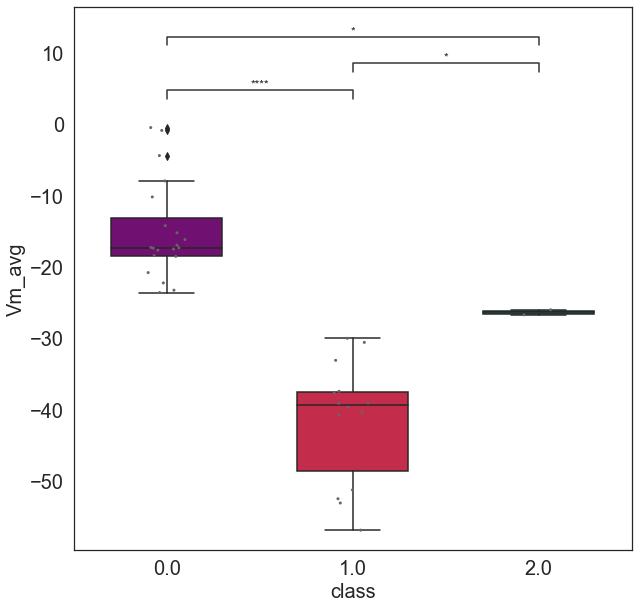

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.0 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:7.661e-01 U_stat=1.490e+02
1.0 vs. 2.0: Mann-Whitney-Wilcoxon test two-sided, P_val:1.315e-01 U_stat=4.000e+00
0.0 vs. 2.0: Mann-Whitney-Wilcoxon test two-sided, P_val:7.669e-02 U_stat=4.000e+00


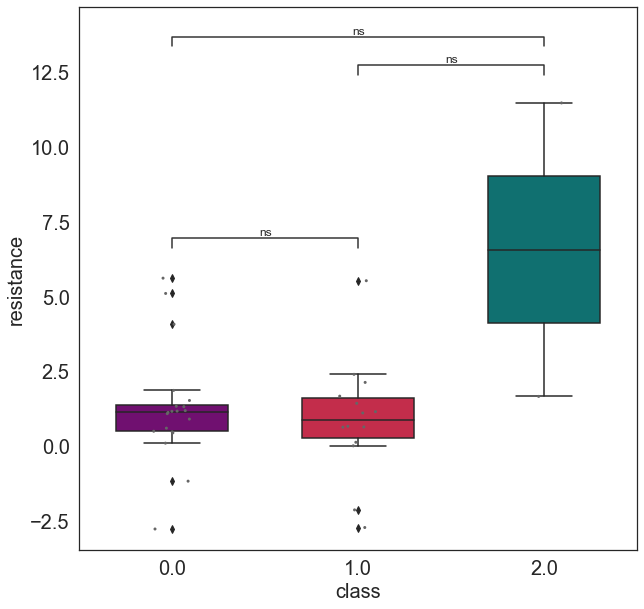

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.0 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:1.363e-02 U_stat=6.900e+01
1.0 vs. 2.0: Mann-Whitney-Wilcoxon test two-sided, P_val:3.207e-02 U_stat=2.800e+01
0.0 vs. 2.0: Mann-Whitney-Wilcoxon test two-sided, P_val:1.231e-01 U_stat=3.400e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.0 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:1.498e-06 U_stat=2.780e+02
1.0 vs. 2.0: Mann-Whitney-Wilcoxon test two-sided, P_val:3.207e-02 U_stat=0.000e+00
0.0 vs. 2.0: Mann-Whitney-Wilcoxon test two-sided, P_val:3.917e-01 U_stat=1.200e+01


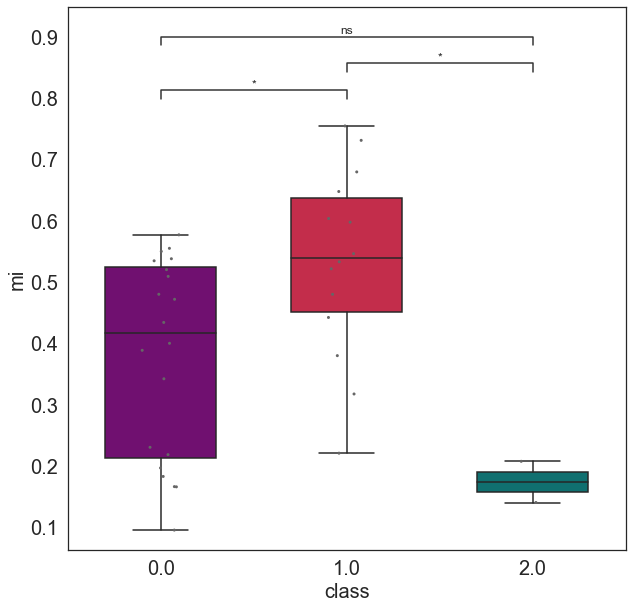

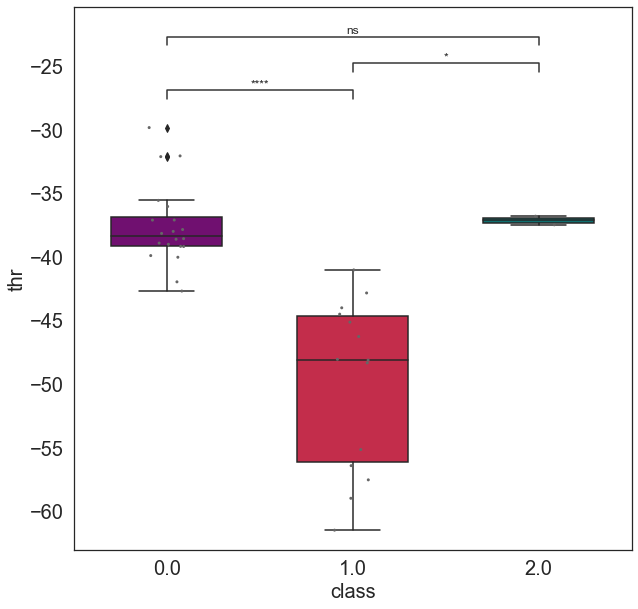

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\statannotations\_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.0 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:2.471e-03 U_stat=2.270e+02
1.0 vs. 2.0: Mann-Whitney-Wilcoxon test two-sided, P_val:3.207e-02 U_stat=0.000e+00
0.0 vs. 2.0: Mann-Whitney-Wilcoxon test two-sided, P_val:1.231e-01 U_stat=6.000e+00


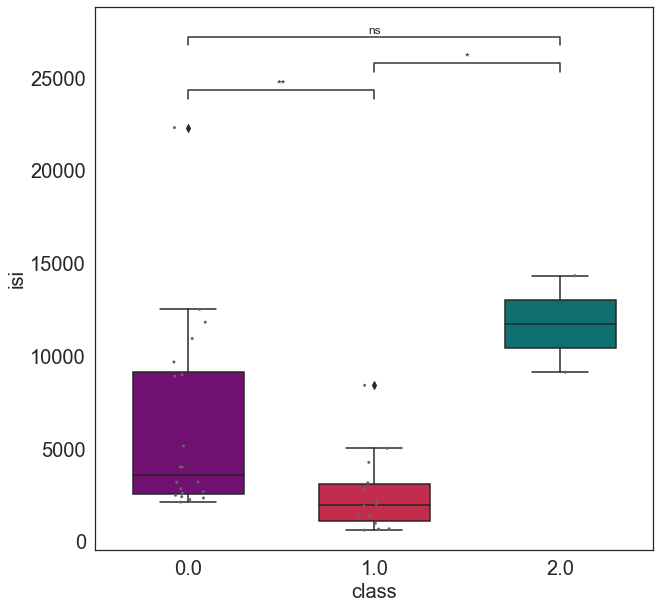

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\statannotations\_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.0 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:8.201e-01 U_stat=1.330e+02
1.0 vs. 2.0: Mann-Whitney-Wilcoxon test two-sided, P_val:8.118e-01 U_stat=1.200e+01
0.0 vs. 2.0: Mann-Whitney-Wilcoxon test two-sided, P_val:4.579e-01 U_stat=1.300e+01


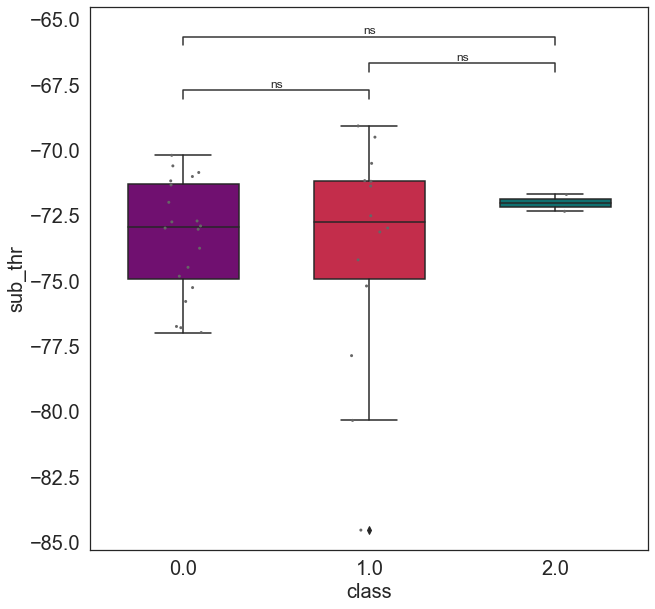

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.0 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:4.346e-03 U_stat=2.220e+02
1.0 vs. 2.0: Mann-Whitney-Wilcoxon test two-sided, P_val:6.914e-01 U_stat=1.100e+01
0.0 vs. 2.0: Mann-Whitney-Wilcoxon test two-sided, P_val:3.317e-01 U_stat=2.900e+01


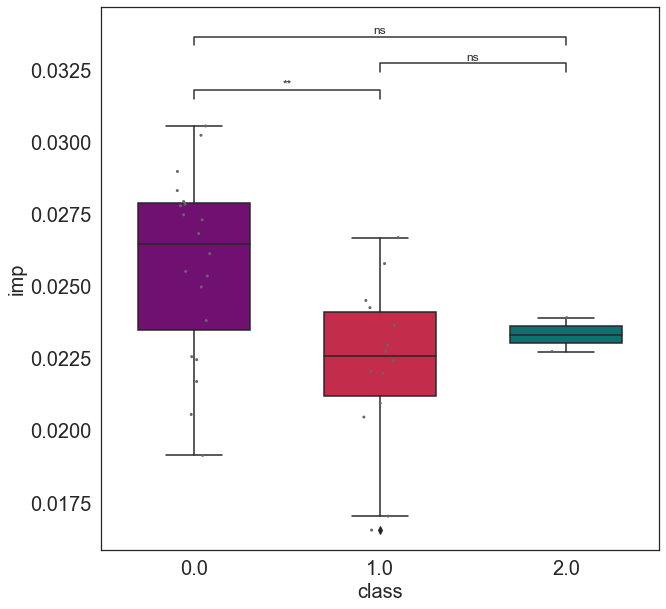

In [379]:
for val in ['Vm_avg', 'resistance','mi', 'thr', 'isi', 'sub_thr','imp']:

    fig,ax = plt.subplots(1,1,figsize=[10,10])

    plot_significance_new(data = df_inh_for_sig[df_inh_for_sig.cond=='m1'],var = val,hue = 'class',ax=ax,palette=['purple','crimson','teal'])
    if val =='mi':
        plt.savefig('C:/Users/Nishant Joshi/Documents/DNM/MI_acsf_dist.png',dpi=200)
    else:
        plt.show()

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\paxplot\core.py:842: Warning: The function you have called (set_figheight) is not officially supported by Paxplot, but it may still work. Report issues to https://github.com/kravitsjacob/paxplot/issues
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\paxplot\core.py:842: Warning: The function you have called (set_figwidth) is not officially supported by Paxplot, but it may still work. Report issues to https://github.com/kravitsjacob/paxplot/issues
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\paxplot\core.py:842: Warning: The function you have called (legend) is not officially supported by Paxplot, but it may still work. Report issues to https://github.com/kravitsjacob/paxplot/issues
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


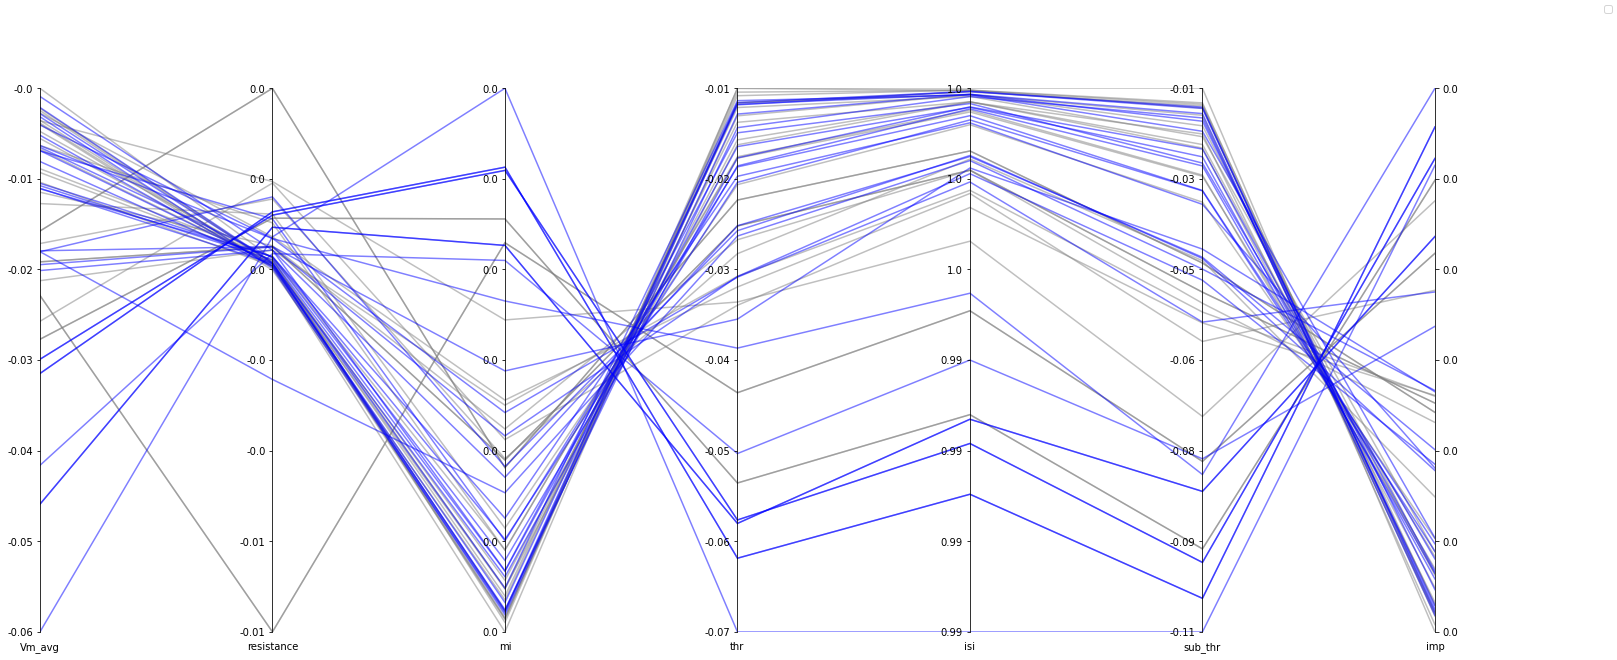

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import paxplot
# Import data
df = df_inh_for_sig[['Vm_avg', 'resistance','mi', 'thr', 'isi', 'sub_thr','imp','class','cond']]
cols = df.columns[:-2]

# Split data
df_d1 = df_inh_for_sig[df_inh_for_sig.cond=='d1ago']
exps_d1 = df_d1[df_d1.cond=='d1ago']['exp_name'].to_numpy()
df_acsf_temp = df_inh_for_sig[df_inh_for_sig.cond=='acsf']
df_acsf_d1s = df_acsf_temp[df_acsf_temp.exp_name.isin(exps_d1)]

# Create figure
paxfig = paxplot.pax_parallel(n_axes=len(cols))
paxfig.set_figheight(10)
paxfig.set_figwidth(25)

paxfig.plot(
    normalize(df_d1[['Vm_avg', 'resistance','mi', 'thr', 'isi', 'sub_thr','imp']].to_numpy()), #stats.zscore(df_d1[['Vm_avg', 'resistance','mi', 'thr', 'isi', 'sub_thr','imp']].to_numpy())
    line_kwargs={'alpha': 0.5, 'color': 'blue', 'zorder': 1}
)

# Add grey data
paxfig.plot(
    normalize(df_acsf_d1s[['Vm_avg', 'resistance','mi', 'thr', 'isi', 'sub_thr','imp']].to_numpy()),
    line_kwargs={'alpha': 0.5, 'color': 'grey', 'zorder': 0}
)

# Add labels
paxfig.set_labels(cols)
paxfig.legend()
plt.show()

In [193]:
len(np.unique(df_exc_for_sig.exp_name))

188

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\paxplot\core.py:842: Warning: The function you have called (set_figheight) is not officially supported by Paxplot, but it may still work. Report issues to https://github.com/kravitsjacob/paxplot/issues
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\paxplot\core.py:842: Warning: The function you have called (set_figwidth) is not officially supported by Paxplot, but it may still work. Report issues to https://github.com/kravitsjacob/paxplot/issues


ValueError: Found array with 0 sample(s) (shape=(0, 2)) while a minimum of 1 is required by the normalize function.

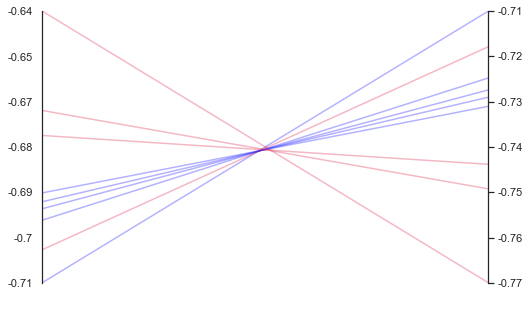

In [186]:
df = df_inh_for_sig[['AP_avg', 'resistance','mi', 'thr', 'isi', 'sub_thr','imp','class','cond']]
cols = df.columns[:-2]
from sklearn.preprocessing import StandardScaler, normalize

# Split data
cond_ = 'sag'
# for cond_ in np.unique(df_inh_for_sig.cond[1:]):
df_d1 = df_inh_for_sig[df_inh_for_sig.cond==cond_].drop_duplicates(subset='exp_name')
exps_d1 = df_d1[df_d1.cond==cond_]['exp_name'].to_numpy()
df_acsf_temp = df_inh_for_sig[df_inh_for_sig.cond=='acsf']
df_acsf_d1s = df_acsf_temp[df_acsf_temp.exp_name.isin(exps_d1)].drop_duplicates(subset='exp_name')


for i in ['AP_avg', 'resistance','mi', 'thr', 'isi', 'sub_thr','imp']:
# i = 'AP_avg'
    v_d1 = df_d1[[i,'class']]
    v_d1_acsf = df_acsf_d1s[[i,'class']]


    df_all = normalize(pd.DataFrame({i+'_acsf':v_d1_acsf[i].to_numpy(),i+'_'+cond_:v_d1[i].to_numpy()}).to_numpy()) 
    # df_all = pd.DataFrame({i+'_acsf':v_d1_acsf[i].to_numpy(),i+'_'+cond_:v_d1[i].to_numpy()}).to_numpy()

    df_1 = pd.DataFrame({i+'_acsf':v_d1_acsf[v_d1_acsf['class']==0][i].to_numpy(),i+'_'+cond_:v_d1[v_d1['class']==0][i].to_numpy()})
    df_2 = pd.DataFrame({i+'_acsf':v_d1_acsf[v_d1_acsf['class']==1][i].to_numpy(),i+'_'+cond_:v_d1[v_d1['class']==1][i].to_numpy()})
    df_3 = pd.DataFrame({i+'_acsf':v_d1_acsf[v_d1_acsf['class']==2][i].to_numpy(),i+'_'+cond_:v_d1[v_d1['class']==2][i].to_numpy()})

    cols = df_1.columns
    # ['purple','crimson','teal','teal']
    # Create figure
    paxfig = paxplot.pax_parallel(n_axes=len(cols))
    paxfig.set_figheight(5)
    paxfig.set_figwidth(8)

    # Add grey data
    paxfig.plot(normalize(df_1.to_numpy()), #stats.zscore(df_1.to_numpy())
        line_kwargs={'alpha': 0.3, 'color': 'blue', 'zorder': 0})
        

    # Add grey data
    paxfig.plot(normalize(df_2.to_numpy()), #stats.zscore(df_1.to_numpy())
        line_kwargs={'alpha': 0.3, 'color': 'crimson', 'zorder': 0})
                

    # Add grey data
    paxfig.plot(normalize(df_3.to_numpy()), #stats.zscore(df_1.to_numpy())
        line_kwargs={'alpha': 0.5, 'color': 'teal', 'zorder': 0})

    max_i  = np.max(df_all.max())
    min_i  = np.min(df_all.min())
    paxfig.set_lim(ax_idx=0, bottom=min_i, top=max_i)
    paxfig.set_lim(ax_idx=1, bottom=min_i, top=max_i)

    # paxfig.set_lim(ax_idx=0, bottom=-0.6, top=-0.8)
    # paxfig.set_lim(ax_idx=1, bottom=-0.6, top=-0.8)

    # Add labels
    paxfig.set_labels(cols)
    for  ax in paxfig.axes:   
        ax.tick_params(axis='x', labelsize=20)
        ax.tick_params(axis='y', labelsize=20)

                                        
    # plt.show()
    plt.savefig('C:/Users/Nishant Joshi/Documents/DNM/'+i+'_'+cond+'_paxplot.png',dpi=200)

In [235]:

df = df_inh_for_sig[['Vm_avg', 'resistance','mi', 'thr', 'isi', 'sub_thr','imp','class','cond']]
cols = df.columns[:-2]

# Split data
df_m1 = df_inh_for_sig[df_inh_for_sig.cond=='m1']
exps_m1 = df_m1[df_m1.cond=='m1']['exp_name'].to_numpy()
df_acsf_temp = df_inh_for_sig[df_inh_for_sig.cond=='acsf']
df_acsf_m1s = df_acsf_temp[df_acsf_temp.exp_name.isin(exps_m1)]

from sklearn.preprocessing import StandardScaler, normalize

for i in ['Vm_avg', 'resistance','mi', 'thr', 'isi', 'sub_thr','imp']:
    
        v_m1 = df_m1[i].to_numpy()
        v_m1_acsf = df_acsf_m1s[i].to_numpy()

        df_1 = pd.DataFrame({i+'_acsf':pd.Series(v_m1_acsf),i+'_m1':pd.Series(v_m1)})
        cols = df_1.columns

        # Create figure
        paxfig = paxplot.pax_parallel(n_axes=len(cols))
        paxfig.set_figheight(3)
        paxfig.set_figwidth(5)

        cols = df_1.columns

        # Add grey data
        paxfig.plot(
            normalize(df_1.to_numpy()), #stats.zscore(df_1.to_numpy())
            line_kwargs={'alpha': 0.5, 'color': 'grey', 'zorder': 0}
        )
        # Add labels
        paxfig.set_labels(cols)
        plt.show()
        

NameError: name 'paxplot' is not defined

In [172]:
def add_trials(data):
    exps = data.exp_name.to_numpy()
    trials = []
    last_exp = ''
    count=1

    for exp in exps:
        if exp != last_exp:
            count=1
            trials.append(count) 
            last_exp = exp
        else:
            count+=1
            trials.append(count) 
        last_exp = exp

    data['trial'] = trials
    return data
add_trials(df_acsf_d1s)


<ipython-input-172-7b31989eef39>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Vm_avg     dvdt_p    dvdt_n      avg_V  resistance        thr  \
8    13.974870   6.995019 -1.779385 -66.343561   -1.008059 -33.328159   
11   16.398572   6.905606 -1.747365 -71.654521    3.413336 -35.543406   
24   22.246265   6.035204 -1.417083 -71.515441    4.770026 -29.677283   
29   13.304924   6.222883 -1.655890 -70.356546   -6.548021 -35.107682   
33   16.697881   7.182001 -1.678495 -71.253124    3.545891 -34.589154   
47   12.885260   8.512073 -2.069221 -71.299143    9.883182 -37.207780   
56   24.229621   7.711830 -2.109016 -72.639684   -0.848413 -30.329392   
57   26.090232   7.827818 -1.975980 -66.737662    0.653336 -26.638021   
60    4.763624   4.169893 -2.647946 -73.088798    1.421700 -50.668883   
65    1.408699   7.824863 -1.965491 -74.658042   -1.777763 -38.808574   
66    1.785340   8.813808 -2.255571 -72.867191    0.158294 -40.610549   
93   18.326121   3.638008 -1.403824 -56.842210    1.678314 -26.212597   
94   19.796299   4.288160 -1.652975 -63.567616    0.994613 -27.596571   
95   20.028281   5.041309 -1.792544 -71.555095   -6.511981 -27.753696   
96   19.915710   4.933565 -1.782274 -72.585975   -2.233746 -26.161458   
104  11.732069   6.385547 -1.818149 -74.332771   -1.555163 -31.774020   
105  12.156709   7.302002 -1.863008 -74.631465   -1.660087 -32.928618   
106  17.585220   7.576056 -2.142917 -72.935826   -0.782863 -27.641927   
107  14.868308   7.646932 -2.041343 -73.608132   -0.778521 -30.233750   
113  21.816839   7.664896 -1.766859 -72.621026   -4.717918 -32.295343   
114  20.638614   7.105432 -1.712782 -71.785357   -4.618247 -32.889525   
115  23.677399   8.094794 -1.965968 -73.018948   -9.059471 -28.969548   
116  22.503202   7.706464 -1.917752 -73.364243   -9.158367 -29.562178   
126   6.419134   8.138964 -2.008140 -72.772891   -3.129549 -35.417444   
127   4.433123   8.385283 -1.972621 -72.631427   -4.462853 -38.603180   
147  14.852831   9.605606 -2.426257 -71.013770   -2.728904 -32.606452   
148  17.072039   8.453741 -2.280349 -71.242441   57.374470 -28.789173   
161  11.449047   9.729209 -2.250594 -70.402128   -2.777263 -39.506597   
162  11.284677   9.893552 -2.228782 -70.682254   -2.761174 -38.775000   
163  10.182398  10.326256 -2.205043 -71.710294   -2.714767 -40.008366   
229  22.744689   7.389425 -2.399182 -70.297976    3.517453 -24.900635   
231  18.409051   5.775591 -2.034877 -69.761565    2.551259 -26.380841   
233  18.066801   7.259396 -1.716721 -70.013869   -4.069244 -31.648655   
235  15.085403   8.639374 -2.296306 -70.833475   -4.754573 -30.120370   
236  17.701057   7.671765 -2.292330 -70.319288   -4.655733 -26.348389   
238  17.488219   3.798869 -1.017267 -65.146276    1.149043 -28.434177   
239  20.261466   5.228574 -1.526699 -69.196503    1.096137 -27.053879   
4    20.177337   4.413538 -1.718369 -75.723965    2.903311 -27.023575   
40   -9.265203   7.310535 -2.363548 -76.944684    1.642489 -34.261047   
62  -34.381455   3.810139 -2.910631 -71.813373    0.996142 -39.125866   
63  -36.188967   3.640791 -2.926581 -72.699855    1.002726 -38.919740   
71   -5.775063   7.172380 -2.358833 -70.628695    1.775405 -31.285505   
72   -7.559367   6.749813 -2.293834 -72.577578    1.157637 -32.380892   
77    2.080905   6.487649 -2.265337 -76.332636    0.997413 -31.544488   
78   -2.523815   7.005741 -2.162362 -72.571345    1.456984 -37.750228   
113  21.816839   7.664896 -1.766859 -72.621026   -4.717918 -32.295343   
114  20.638614   7.105432 -1.712782 -71.785357   -4.618247 -32.889525   
115  23.677399   8.094794 -1.965968 -73.018948   -9.059471 -28.969548   
116  22.503202   7.706464 -1.917752 -73.364243   -9.158367 -29.562178   
136  15.217375   7.178667 -1.875317 -71.758549   -3.153208 -40.791262   
137  15.604379   7.388181 -1.922892 -71.880610   -0.468336 -39.905968   
138  19.028298   8.117718 -1.846773 -72.504595   -3.159606 -37.058928   
139  17.293252   8.993135 -1.957381 -72.264841   -3.205973 -35.224407   
147  14.852831   9.605606 -2.426257 -71.013770   -2.728904 -32.606

In [320]:
temp = df_exc_for_sig[df_exc_for_sig.exp_name.isin(exps_d1)]
len(temp[temp.cond=='acsf'])
len(df_d1)


59

In [173]:

# df = df_exc_for_sig[['Vm_avg', 'resistance','mi', 'thr', 'isi', 'sub_thr','imp','class','cond']]
# cols = df.columns[:-2]
  
# Split data
df_d1 = df_exc_for_sig[df_exc_for_sig.cond=='d1ago']
exps_d1 = df_d1[df_d1.cond=='d1ago']['exp_name'].to_numpy()
df_acsf_temp = df_exc_for_sig[df_exc_for_sig.cond=='acsf']
df_acsf_d1s = df_acsf_temp[df_acsf_temp.exp_name.isin(exps_d1)]
df_acsf_d1s = add_trials(df_acsf_d1s)
df_acsf_d1s_trial1 = df_acsf_d1s[df_acsf_d1s.trial==1]

from sklearn.preprocessing import StandardScaler, normalize

for i in ['Vm_avg', 'resistance','mi', 'thr', 'isi', 'sub_thr','imp']:
    
        v_d1 = df_d1[i].to_numpy()
        v_d1_acsf = df_acsf_d1s_trial1[i].to_numpy()

        df_1 = pd.DataFrame({i+'_acsf':v_d1_acsf,i+'_d1':v_d1})
        cols = df_1.columns

        # Create figure
        paxfig = paxplot.pax_parallel(n_axes=len(cols))
        paxfig.set_figheight(3)
        paxfig.set_figwidth(5)

        cols = df_1.columns

        # Add grey data
        paxfig.plot(
            normalize(df_1.to_numpy()), #stats.zscore(df_1.to_numpy())
            line_kwargs={'alpha': 0.5, 'color': 'grey', 'zorder': 0}
        )
        # Add labels
        paxfig.set_labels(cols)
        plt.show()

<ipython-input-172-7b31989eef39>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


ValueError: arrays must all be same length

In [327]:
np.unique(df_d1.exp_name,return_counts=True)
df_d1[df_d1.exp_name == 'NC_171017_aCSF_D1ago_E2']

Vm_avg    dvdt_p    dvdt_n      avg_V  resistance        thr  \
149  19.321738  9.304025 -2.407607 -71.752231   -9.636693 -27.632576   
150  19.715641  9.384179 -2.465899 -70.261331    0.851617 -26.996094   
151  19.746652  8.555145 -2.402569 -70.952803   -1.658940 -26.070312   
152  19.766764  7.990508 -2.306690 -70.899499   -1.648729 -27.263393   
153  18.267134  7.081217 -2.148706 -70.214420   -1.665138 -27.908334   
149  19.321738  9.304025 -2.407607 -71.752231   -9.636693 -27.632576   
150  19.715641  9.384179 -2.465899 -70.261331    0.851617 -26.996094   
151  19.746652  8.555145 -2.402569 -70.952803   -1.658940 -26.070312   
152  19.766764  7.990508 -2.306690 -70.899499   -1.648729 -27.263393   
153  18.267134  7.081217 -2.148706 -70.214420   -1.665138 -27.908334   

     adaptation            isi       peak  peak_adaptation  ...      psth  \
149    0.142578  106825.125000  66.912879         0.249023  ...  0.616438   
150    0.406250  133056.565217  68.606771        -0.040761  ...  0.780822   
151    0.724432  283247.636364  66.052083         0.005682  ...  0.616438   
152    0.332812  172059.850000  66.989583         0.362500  ...  0.863014   
153    0.412946  245801.214286  58.135417        -0.062500  ...  0.739726   
149    0.142578  106825.125000  66.912879         0.249023  ...  0.616438   
150    0.406250  133056.565217  68.606771        -0.040761  ...  0.780822   
151    0.724432  283247.636364  66.052083         0.005682  ...  0.616438   
152    0.332812  172059.850000  66.989583         0.362500  ...  0.863014   
153    0.412946  245801.214286  58.135417        -0.062500  ...  0.739726   

       int_fr    fr    sub_thr        mi  spk_fr_adp       imp  \
149  0.000695  0.24 -71.775797 -0.035184    0.000000  0.020842   
150  0.000818  0.32 -70.291678  0.057236    0.000000  0.022848   
151  0.000766  0.26 -70.976269 -0.005629   -0.013889  0.023499   
152  0.000705  0.33 -70.931650  0.078499   -0.013889  0.024062   
153  0.000601  0.32 -70.241450  0.044614   -0.013889  0.023715   
149  0.000695  0.24 -71.775797 -0.035184    0.000000  0.020842   
150  0.000818  0.32 -70.291678  0.057236    0.000000  0.022848   
151  0.000766  0.26 -70.976269 -0.005629   -0.013889  0.023499   
152  0.000705  0.33 -70.931650  0.078499   -0.013889  0.024062   
153  0.000601  0.32 -70.241450  0.044614   -0.013889  0.023715   

                    exp_name   cond  class  
149  NC_171017_aCSF_D1ago_E2  d1ago    0.0  
150  NC_171017_aCSF_D1ago_E2  d1ago    0.0  
151  NC_171017_aCSF_D1ago_E2  d1ago    0.0  
152  NC_171017_aCSF_D1ago_E2  d1ago    0.0  
153  NC_171017_aCSF_D1ago_E2  d1ago    0.0  
149  NC_171017_aCSF_D1ago_E2  d1ago    1.0  
150  NC_171017_aCSF_D1ago_E2  d1ago    1.0  
151  NC_171017_aCSF_D1ago_E2  d1ago    1.0  
152  NC_171017_aCSF_D1ago_E2  d1ago    1.0  
153  NC_171017_aCSF_D1ago_E2  d1ago    1.0  

[10 rows x 26 columns]

In [174]:

# df = df_exc_for_sig[['Vm_avg', 'resistance','mi', 'thr', 'isi', 'sub_thr','imp','class','cond']]
# cols = df.columns[:-2]
def add_trial(data):
    files,nums = np.unique(data.exp_name.to_numpy(),return_counts=True)
    trial_inds = []
    for i in nums:
        if i>1:
            trial_inds.append(np.arange(1,i+1))
        else:
            trial_inds.append(i)
    data['trials'] = np.hstack(trial_inds)
    print()
    return data       
# Split data
df_d1 = df_exc_for_sig[df_exc_for_sig.cond=='d1ago']
exps_d1 = df_d1[df_d1.cond=='d1ago']['exp_name'].to_numpy()
df_acsf_temp = df_exc_for_sig[df_exc_for_sig.cond=='acsf']
df_acsf_d1s = df_acsf_temp[df_acsf_temp.exp_name.isin(exps_d1)]

# from sklearn.preprocessing import StandardScaler, normalize

# for i in ['Vm_avg', 'resistance','mi', 'thr', 'isi', 'sub_thr','imp']:
    
#         v_d1 = df_d1[i].to_numpy()
#         v_d1_acsf = df_acsf_d1s[i].to_numpy()

#         df_1 = pd.DataFrame({i+'_acsf':v_d1_acsf,i+'_d1':v_d1})
#         cols = df_1.columns

#         # Create figure
#         paxfig = paxplot.pax_parallel(n_axes=len(cols))
#         paxfig.set_figheight(3)
#         paxfig.set_figwidth(5)

#         cols = df_1.columns

#         # Add grey data
#         paxfig.plot(
#             normalize(df_1.to_numpy()), #stats.zscore(df_1.to_numpy())
#             line_kwargs={'alpha': 0.5, 'color': 'grey', 'zorder': 0}
#         )
#         # Add labels
#         paxfig.set_labels(cols)
#         plt.show()